<a href="https://colab.research.google.com/github/knkarthik01/reinforcement-learning/blob/master/c5_monte_carlo_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
  # ================================
  # 🔧 Setup and Enhanced Imports for Google Colab
  # ================================

  # Google Colab compatibility
  try:
      import google.colab
      IN_COLAB = True
      print("🌐 Running in Google Colab")
  except ImportError:
      IN_COLAB = False
      print("💻 Running in local environment")

  # Essential imports
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  from matplotlib.patches import Rectangle, Circle, FancyBboxPatch, ConnectionPatch
  from matplotlib.colors import ListedColormap
  import matplotlib.patches as mpatches
  import pandas as pd
  from collections import defaultdict, deque
  import random
  import time
  from itertools import product
  import warnings
  warnings.filterwarnings('ignore')

  # Colab-compatible progress bars
  if IN_COLAB:
      try:
          from tqdm.notebook import tqdm
          print("📊 Using notebook-compatible progress bars")
      except ImportError:
          from tqdm import tqdm
          print("📊 Using standard progress bars")
  else:
      from tqdm import tqdm

  # Colab-compatible display
  if IN_COLAB:
      from IPython.display import clear_output, HTML, display
      # Enable inline plotting
      get_ipython().run_line_magic('matplotlib', 'inline')
      print("🖼️ Inline plotting enabled for Colab")
  else:
      from IPython.display import clear_output, HTML, display

  # Enhanced plotting and timing
  plt.style.use('default')
  sns.set_palette("husl")
  plt.rcParams['figure.figsize'] = (14, 8)
  plt.rcParams['font.size'] = 11

  # Set seeds for reproducibility
  np.random.seed(42)
  random.seed(42)

  print("🎲 CHAPTER 5: MONTE CARLO METHODS MASTERY")
  print("=" * 55)
  print("📚 WHAT YOU'LL MASTER:")
  print("   🎯 Monte Carlo Prediction: Learning values from episodes")
  print("   📈 Action Value Estimation: Q-learning foundations")
  print("   🔄 Monte Carlo Control: Complete learning algorithms")
  print("   🎲 Exploring Starts: Ensuring adequate exploration")
  print("   ⚖️ Importance Sampling: Off-policy learning magic")
  print("   🔢 Incremental Methods: Online learning algorithms")
  print("   🎯 Off-policy Control: Learn optimal from any behavior")
  print("   📊 Advanced Techniques: Cutting-edge MC methods")
  print()
  print("🔧 Loading Monte Carlo engines...")
  print("✅ Environment setup complete - ready for Google Colab!")

🌐 Running in Google Colab
📊 Using notebook-compatible progress bars
🖼️ Inline plotting enabled for Colab
🎲 CHAPTER 5: MONTE CARLO METHODS MASTERY
📚 WHAT YOU'LL MASTER:
   🎯 Monte Carlo Prediction: Learning values from episodes
   📈 Action Value Estimation: Q-learning foundations
   🔄 Monte Carlo Control: Complete learning algorithms
   🎲 Exploring Starts: Ensuring adequate exploration
   ⚖️ Importance Sampling: Off-policy learning magic
   🔢 Incremental Methods: Online learning algorithms
   🎯 Off-policy Control: Learn optimal from any behavior
   📊 Advanced Techniques: Cutting-edge MC methods

🔧 Loading Monte Carlo engines...
✅ Environment setup complete - ready for Google Colab!



  # ⚡ Chapter 5: Monte Carlo Methods
  ## Mastering Model-Free Reinforcement Learning

  **Welcome to the world of learning from experience! 🎲**

  By the end of this notebook, you'll have:

  ✅ Mastered Monte Carlo Prediction (first-visit & every-visit)
  ✅ Implemented MC Estimation of Action Values
  ✅ Built complete Monte Carlo Control algorithms
  ✅ Conquered Exploring Starts and ε-greedy methods
  ✅ Understood Off-policy learning via Importance Sampling
  ✅ Implemented Incremental MC algorithms
  ✅ Created Off-policy Monte Carlo Control
  ✅ Explored advanced Importance Sampling techniques
  ✅ Analyzed the model-free revolution in RL!

  ## 🌟 Introduction: From Model-Based to Model-Free

  In Chapter 4, we mastered **Dynamic Programming** - powerful but requiring complete knowledge of the environment model P(s',r|s,a). Now we break free from this constraint!

  **Monte Carlo Methods** learn directly from **experience** - complete episodes of interaction with the environment. No model required, just **raw experience**!

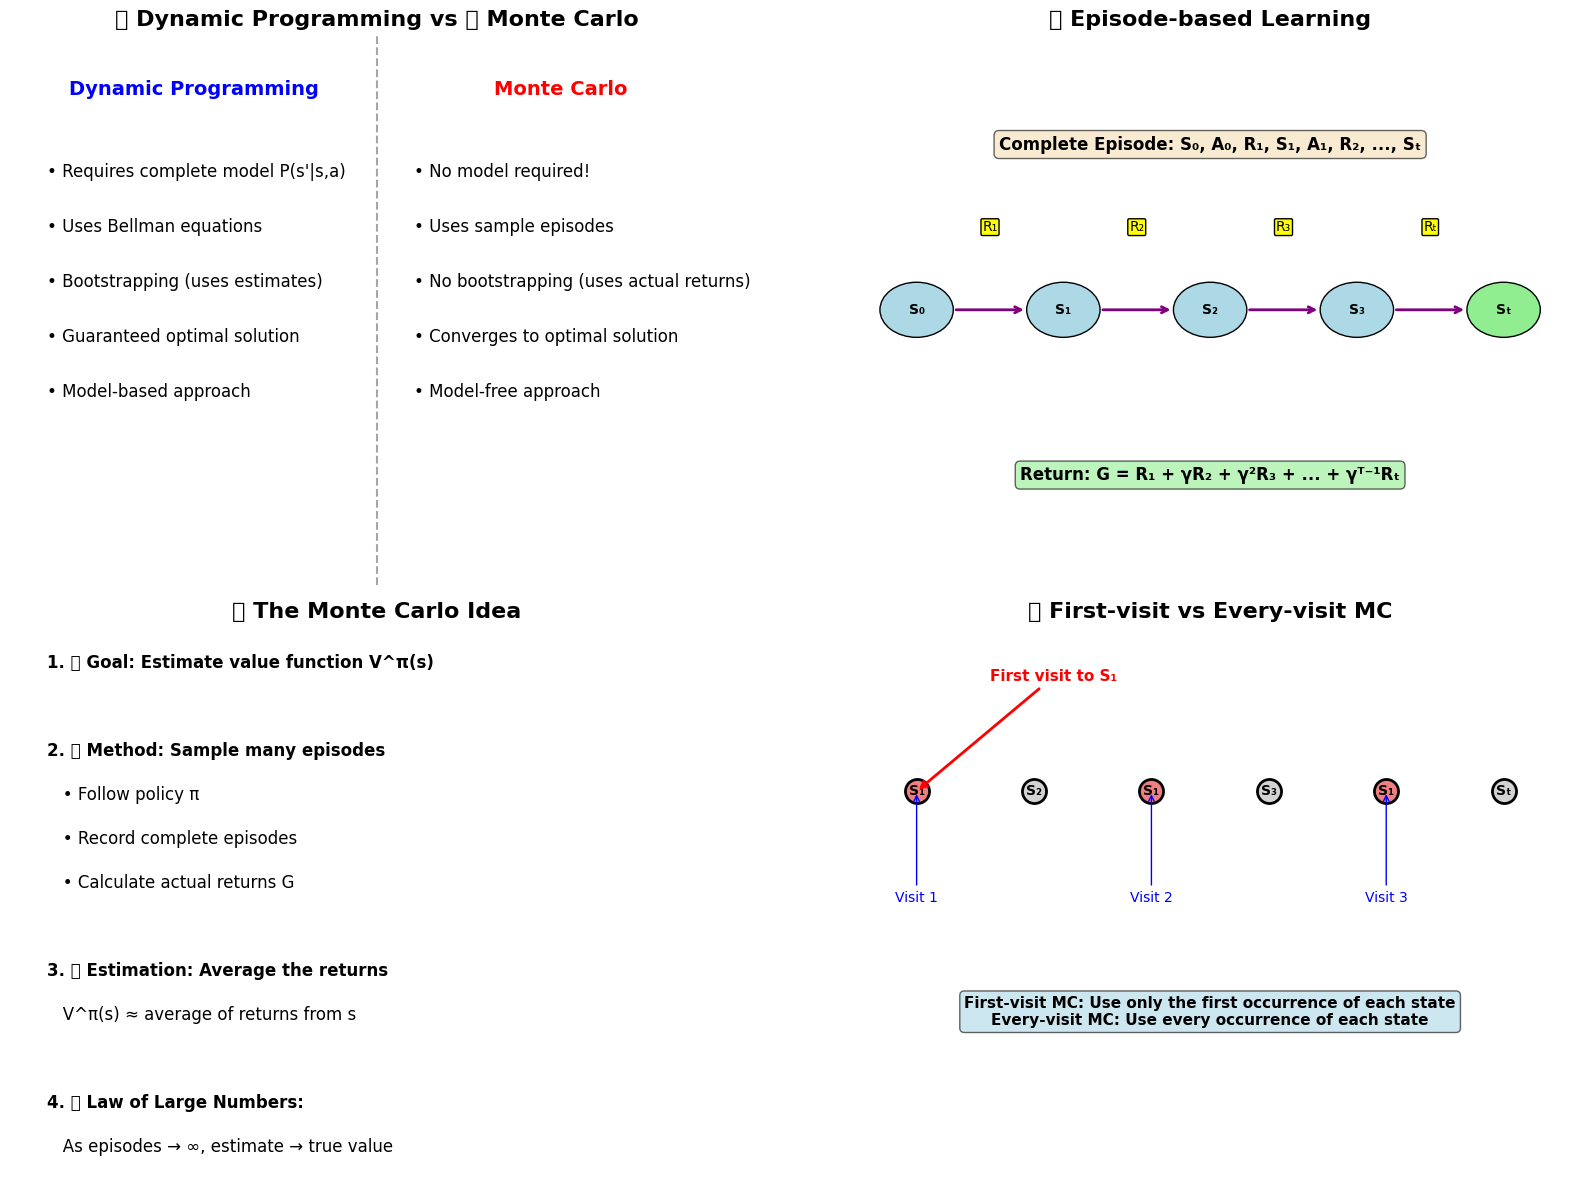

In [3]:
  def create_mc_introduction():
      """Visual introduction to Monte Carlo methods"""

      fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

      # Diagram 1: DP vs MC Comparison
      ax1.set_title('🔄 Dynamic Programming vs 🎲 Monte Carlo', fontsize=16, fontweight='bold')

      # DP side
      ax1.text(0.25, 0.9, 'Dynamic Programming', ha='center', va='center',
               fontsize=14, fontweight='bold', color='blue')

      dp_features = [
          '• Requires complete model P(s\'|s,a)',
          '• Uses Bellman equations',
          '• Bootstrapping (uses estimates)',
          '• Guaranteed optimal solution',
          '• Model-based approach'
      ]

      y_pos = 0.75
      for feature in dp_features:
          ax1.text(0.05, y_pos, feature, ha='left', va='center', fontsize=12)
          y_pos -= 0.1

      # MC side
      ax1.text(0.75, 0.9, 'Monte Carlo', ha='center', va='center',
               fontsize=14, fontweight='bold', color='red')

      mc_features = [
          '• No model required!',
          '• Uses sample episodes',
          '• No bootstrapping (uses actual returns)',
          '• Converges to optimal solution',
          '• Model-free approach'
      ]

      y_pos = 0.75
      for feature in mc_features:
          ax1.text(0.55, y_pos, feature, ha='left', va='center', fontsize=12)
          y_pos -= 0.1

      # Separator line
      ax1.axvline(x=0.5, color='gray', linestyle='--', alpha=0.7)

      ax1.set_xlim(0, 1)
      ax1.set_ylim(0, 1)
      ax1.axis('off')

      # Diagram 2: Episode-based Learning
      ax2.set_title('📺 Episode-based Learning', fontsize=16, fontweight='bold')

      # Show an episode trajectory
      states = ['S₀', 'S₁', 'S₂', 'S₃', 'Sₜ']
      rewards = ['R₁', 'R₂', 'R₃', 'Rₜ']

      # Draw episode
      y_center = 0.5
      x_positions = np.linspace(0.1, 0.9, len(states))

      for i, (state, x) in enumerate(zip(states, x_positions)):
          # State circle
          color = 'lightgreen' if state == 'Sₜ' else 'lightblue'
          circle = Circle((x, y_center), 0.05, facecolor=color, edgecolor='black')
          ax2.add_patch(circle)
          ax2.text(x, y_center, state, ha='center', va='center', fontsize=10, fontweight='bold')

          # Transition arrow and reward
          if i < len(states) - 1:
              next_x = x_positions[i + 1]
              ax2.annotate('', xy=(next_x - 0.05, y_center), xytext=(x + 0.05, y_center),
                          arrowprops=dict(arrowstyle='->', lw=2, color='purple'))

              # Reward label
              mid_x = (x + next_x) / 2
              ax2.text(mid_x, y_center + 0.15, rewards[i], ha='center', va='center',
                      fontsize=10, bbox=dict(boxstyle="round,pad=0.1", facecolor='yellow'))

      ax2.text(0.5, 0.8, 'Complete Episode: S₀, A₀, R₁, S₁, A₁, R₂, ..., Sₜ',
               ha='center', va='center', fontsize=12, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='wheat', alpha=0.6))

      ax2.text(0.5, 0.2, 'Return: G = R₁ + γR₂ + γ²R₃ + ... + γᵀ⁻¹Rₜ',
               ha='center', va='center', fontsize=12, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen', alpha=0.6))

      ax2.set_xlim(0, 1)
      ax2.set_ylim(0, 1)
      ax2.axis('off')

      # Diagram 3: The Monte Carlo Idea
      ax3.set_title('💡 The Monte Carlo Idea', fontsize=16, fontweight='bold')

      mc_idea = [
          '1. 🎯 Goal: Estimate value function V^π(s)',
          '',
          '2. 🎲 Method: Sample many episodes',
          '   • Follow policy π',
          '   • Record complete episodes',
          '   • Calculate actual returns G',
          '',
          '3. 📊 Estimation: Average the returns',
          '   V^π(s) ≈ average of returns from s',
          '',
          '4. ✅ Law of Large Numbers:',
          '   As episodes → ∞, estimate → true value'
      ]

      y_pos = 0.95
      for line in mc_idea:
          if line:
              fontweight = 'bold' if any(c in line for c in ['🎯', '🎲', '📊', '✅']) else 'normal'
              ax3.text(0.05, y_pos, line, ha='left', va='top', fontsize=12, fontweight=fontweight)
          y_pos -= 0.08

      ax3.set_xlim(0, 1)
      ax3.set_ylim(0, 1)
      ax3.axis('off')

      # Diagram 4: First-visit vs Every-visit
      ax4.set_title('🔍 First-visit vs Every-visit MC', fontsize=16, fontweight='bold')

      # Example episode with repeated state
      episode_states = ['S₁', 'S₂', 'S₁', 'S₃', 'S₁', 'Sₜ']
      episode_x = np.linspace(0.1, 0.9, len(episode_states))

      for i, (state, x) in enumerate(zip(episode_states, episode_x)):
          # Highlight S₁ visits
          color = 'lightcoral' if state == 'S₁' else 'lightgray'
          ax4.scatter(x, 0.7, s=300, c=color, edgecolor='black', linewidth=2)
          ax4.text(x, 0.7, state, ha='center', va='center', fontsize=10, fontweight='bold')

      # First-visit annotation
      ax4.annotate('First visit to S₁', xy=(episode_x[0], 0.7), xytext=(0.2, 0.9),
                  arrowprops=dict(arrowstyle='->', color='red', lw=2),
                  fontsize=11, fontweight='bold', color='red')

      # Every-visit annotations
      for i, x in enumerate([episode_x[0], episode_x[2], episode_x[4]]):
          ax4.annotate(f'Visit {i+1}', xy=(x, 0.7), xytext=(x, 0.5),
                      arrowprops=dict(arrowstyle='->', color='blue', lw=1),
                      fontsize=10, color='blue', ha='center')

      ax4.text(0.5, 0.3, 'First-visit MC: Use only the first occurrence of each state\n'
                        'Every-visit MC: Use every occurrence of each state',
               ha='center', va='center', fontsize=11, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue', alpha=0.6))

      ax4.set_xlim(0, 1)
      ax4.set_ylim(0, 1)
      ax4.axis('off')

      plt.tight_layout()
      return fig

  intro_fig = create_mc_introduction()
  plt.show()

  ## 🏗️ Enhanced Environment for Monte Carlo Learning

🏗️ SETTING UP MONTE CARLO ENVIRONMENT


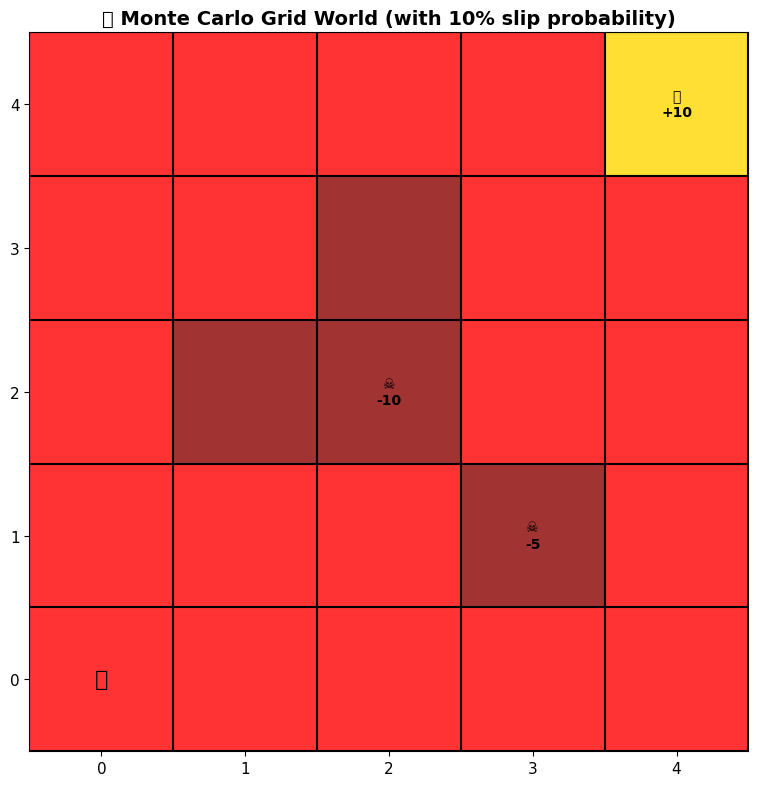

📊 Environment Details:
   Environment type: grid
   States: 23
   Actions: ['up', 'down', 'left', 'right']
   Start state: (0, 0)
   Goal states: {(4, 4): 10}
   Trap states: {(2, 2): -10, (1, 3): -5}
   Slip probability: 0.1


In [21]:
  # ================================
  # 🏗️ Enhanced Environment for Monte Carlo Learning
  # ================================

  class MCEnvironment:
      """
      Enhanced environment specifically designed for Monte Carlo learning

      Features:
      - Episode generation with different policies
      - Stochastic transitions and rewards
      - Multiple environment types (grid, blackjack, etc.)
      - Comprehensive episode tracking
      """

      def __init__(self, env_type='grid', **kwargs):
          self.env_type = env_type
          self.episode_count = 0
          self.episode_history = []

          if env_type == 'grid':
              self._setup_grid_world(**kwargs)
          elif env_type == 'blackjack':
              self._setup_blackjack(**kwargs)
          else:
              raise ValueError(f"Unknown environment type: {env_type}")

      def _setup_grid_world(self, height=5, width=5, slip_prob=0.1):
          """Setup grid world with stochastic transitions"""
          self.height = height
          self.width = width
          self.slip_prob = slip_prob  # Probability of random action

          # Define special states
          self.goal_states = {(height-1, width-1): 10}  # Goal with reward
          self.trap_states = {(2, 2): -10, (1, 3): -5}  # Traps
          self.obstacles = {(2, 1), (3, 2)}  # Walls

          self.start_state = (0, 0)
          self.terminal_states = set(self.goal_states.keys()) | set(self.trap_states.keys())

          # All valid states
          self.states = []
          for r in range(height):
              for c in range(width):
                  if (r, c) not in self.obstacles:
                      self.states.append((r, c))

          self.actions = ['up', 'down', 'left', 'right']

      def _setup_blackjack(self, deck_size=1):
          """Setup simplified blackjack environment"""
          self.deck_size = deck_size
          # States: (player_sum, dealer_showing, usable_ace)
          # Actions: ['hit', 'stick']
          self.actions = ['hit', 'stick']

          # Generate all possible states
          self.states = []
          for player_sum in range(12, 22):  # 12-21
              for dealer_card in range(1, 11):  # A, 2-10
                  for usable_ace in [True, False]:
                      self.states.append((player_sum, dealer_card, usable_ace))

      def reset(self):
          """Reset environment to start state"""
          if self.env_type == 'grid':
              self.current_state = self.start_state
          elif self.env_type == 'blackjack':
              # Deal initial cards
              player_cards = [self._draw_card(), self._draw_card()]
              dealer_card = self._draw_card()

              player_sum, usable_ace = self._hand_value(player_cards)
              self.current_state = (player_sum, dealer_card, usable_ace)
              self.dealer_cards = [dealer_card, self._draw_card()]

          return self.current_state

      def step(self, action):
          """Take action and return (next_state, reward, done, info)"""
          if self.env_type == 'grid':
              return self._step_grid(action)
          elif self.env_type == 'blackjack':
              return self._step_blackjack(action)

      def _step_grid(self, action):
          """Grid world step with stochastic transitions"""
          if self.current_state in self.terminal_states:
              return self.current_state, 0, True, {}

          # Add stochasticity: slip to random action with probability slip_prob
          chosen_action = action
          if np.random.random() < self.slip_prob:
              chosen_action = np.random.choice(self.actions)

          # Calculate next state - Initialize new_state
          row, col = self.current_state
          new_state = self.current_state # Initialize new_state

          if chosen_action == 'up':
              new_state = (max(0, row - 1), col)
          elif chosen_action == 'down':
              new_state = (min(self.height - 1, row + 1), col)
          elif chosen_action == 'left':
              new_state = (row, max(0, col - 1))
          elif chosen_action == 'right':
              new_state = (row, min(self.width - 1, col + 1))

          # Check for obstacles
          if new_state in self.obstacles:
              new_state = self.current_state

          # Calculate reward
          if new_state in self.goal_states:
              reward = self.goal_states[new_state]
              done = True
          elif new_state in self.trap_states:
              reward = self.trap_states[new_state]
              done = True
          else:
              reward = -0.1  # Step cost
              done = False

          self.current_state = new_state
          return new_state, reward, done, {}

      def _step_blackjack(self, action):
          """Blackjack step"""
          player_sum, dealer_card, usable_ace = self.current_state

          if action == 'hit':
              # Player draws a card
              new_card = self._draw_card()
              player_sum += new_card

              # Handle ace
              if player_sum > 21 and usable_ace:
                  player_sum -= 10
                  usable_ace = False

              if player_sum > 21:
                  # Bust
                  return (player_sum, dealer_card, usable_ace), -1, True, {}
              else:
                  self.current_state = (player_sum, dealer_card, usable_ace)
                  return self.current_state, 0, False, {}

          else:  # stick
              # Dealer plays
              dealer_sum, _ = self._hand_value(self.dealer_cards)

              while dealer_sum < 17:
                  self.dealer_cards.append(self._draw_card())
                  dealer_sum, _ = self._hand_value(self.dealer_cards)

              # Determine winner
              if dealer_sum > 21:
                  reward = 1  # Dealer busts, player wins
              elif dealer_sum > player_sum:
                  reward = -1  # Dealer wins
              elif dealer_sum < player_sum:
                  reward = 1   # Player wins
              else:
                  reward = 0   # Tie

              return self.current_state, reward, True, {'dealer_sum': dealer_sum}

      def _draw_card(self):
          """Draw a random card (1-10, face cards = 10)"""
          card = np.random.randint(1, 14)
          return min(card, 10)

      def _hand_value(self, cards):
          """Calculate hand value and usable ace status"""
          total = sum(cards)
          usable_ace = 1 in cards and total + 10 <= 21
          if usable_ace:
              total += 10
          return total, usable_ace

      def get_valid_actions(self, state=None):
          """Get valid actions for current or given state"""
          if state is None:
              state = self.current_state

          if self.env_type == 'grid':
              if state in self.terminal_states:
                  return []
              return self.actions.copy()
          elif self.env_type == 'blackjack':
              return self.actions.copy()

      def generate_episode(self, policy, max_steps=1000):
          """
          Generate a complete episode following the given policy

          Returns:
              episode: List of (state, action, reward) tuples
          """
          episode = []
          state = self.reset()

          for step in range(max_steps):
              # Get action from policy
              if callable(policy):
                  action = policy(state)
              else:
                  # Handle dictionary policies (can be state -> action or state -> {action: prob})
                  if state in policy:
                      if isinstance(policy[state], dict):
                          # Stochastic policy
                          actions, probs = zip(*policy[state].items())
                          action = np.random.choice(actions, p=probs)
                      else:
                          # Deterministic policy
                          action = policy[state]
                  else:
                       # If state not in policy, choose randomly from valid actions
                       valid_actions = self.get_valid_actions(state)
                       action = np.random.choice(valid_actions) if valid_actions else None


              if action is None:
                  break

              # Take step
              next_state, reward, done, info = self.step(action)

              # Record transition
              episode.append((state, action, reward))

              if done:
                  break

              state = next_state

          self.episode_count += 1
          self.episode_history.append(episode)

          return episode

      def visualize(self, values=None, policy=None, title="Environment"):
          """Visualize the environment"""
          if self.env_type == 'grid':
              return self._visualize_grid(values, policy, title)
          elif self.env_type == 'blackjack':
              return self._visualize_blackjack(values, policy, title)

      def _visualize_grid(self, values=None, policy=None, title="Grid World"):
          """Visualize grid world"""
          fig, ax = plt.subplots(1, 1, figsize=(10, 8))

          # Create color grid
          grid = np.zeros((self.height, self.width))

          for row in range(self.height):
              for col in range(self.width):
                  state = (row, col)
                  if state in self.obstacles:
                      grid[row, col] = -2
                  elif state in self.goal_states:
                      grid[row, col] = 3
                  elif state in self.trap_states:
                      grid[row, col] = -1
                  else:
                      grid[row, col] = 0

          # Colors: obstacle, trap, normal, goal
          colors = ['darkred', 'red', 'lightgray', 'gold']
          cmap = ListedColormap(colors)

          im = ax.imshow(grid, cmap=cmap, vmin=-2, vmax=3, alpha=0.8)

          # Grid lines
          for i in range(self.height + 1):
              ax.axhline(i - 0.5, color='black', linewidth=1.5)
          for j in range(self.width + 1):
              ax.axvline(j - 0.5, color='black', linewidth=1.5)

          # Add annotations
          for row in range(self.height):
              for col in range(self.width):
                  state = (row, col)

                  # State values
                  if values and state in values:
                      value = values[state]
                      color = 'white' if value < 0 else 'black'
                      ax.text(col - 0.35, row + 0.35, f'V={value:.2f}',
                             ha='center', va='center', fontsize=8,
                             fontweight='bold', color=color,
                             bbox=dict(boxstyle="round,pad=0.1",
                                     facecolor='yellow', alpha=0.8))

                  # Policy arrows
                  if policy and state in policy:
                      action = policy[state]
                      if action:
                          arrows = {'up': '⬆️', 'down': '⬇️', 'left': '⬅️', 'right': '➡️'}
                          # Handle stochastic policies (draw arrow for highest prob action)
                          if isinstance(policy[state], dict):
                             if policy[state]:
                                 best_action = max(policy[state].keys(), key=lambda a: policy[state][a])
                                 ax.text(col + 0.25, row - 0.25, arrows.get(best_action, '❓'),
                                         ha='center', va='center', fontsize=14)
                          else: # Deterministic policy
                              ax.text(col + 0.25, row - 0.25, arrows.get(action, '❓'),
                                     ha='center', va='center', fontsize=14)


                  # Special state labels
                  if state in self.goal_states:
                      ax.text(col, row, f'🏆\n+{self.goal_states[state]}',
                             ha='center', va='center', fontsize=10, fontweight='bold')
                  elif state in self.trap_states:
                      ax.text(col, row, f'☠️\n{self.trap_states[state]}',
                             ha='center', va='center', fontsize=10, fontweight='bold')
                  elif state == self.start_state:
                      ax.text(col, row, '🚀', ha='center', va='center', fontsize=16)

          ax.set_title(f'🗺️ {title}', fontsize=14, fontweight='bold')
          ax.set_xlim(-0.5, self.width - 0.5)
          ax.set_ylim(-0.5, self.height - 0.5)
          ax.set_xticks(range(self.width))
          ax.set_yticks(range(self.height))

          plt.tight_layout()
          return fig

  # Create test environment
  print("🏗️ SETTING UP MONTE CARLO ENVIRONMENT")
  print("=" * 40)

  # Grid world environment
  env = MCEnvironment(env_type='grid', height=5, width=5, slip_prob=0.1)
  fig = env.visualize(title="Monte Carlo Grid World (with 10% slip probability)")
  plt.show()

  print(f"📊 Environment Details:")
  print(f"   Environment type: {env.env_type}")
  print(f"   States: {len(env.states)}")
  print(f"   Actions: {env.actions}")
  print(f"   Start state: {env.start_state}")
  print(f"   Goal states: {env.goal_states}")
  print(f"   Trap states: {env.trap_states}")
  print(f"   Slip probability: {env.slip_prob}")

  # 📊 Part 1: Monte Carlo Prediction

  **Goal**: Estimate the state-value function V^π(s) for a given policy π using sample episodes.

  **Key Idea**: The value of a state is the expected return starting from that state. We can estimate this by averaging actual returns from episodes.

  Should I continue with the next cells?


📊 PART 1: MONTE CARLO PREDICTION


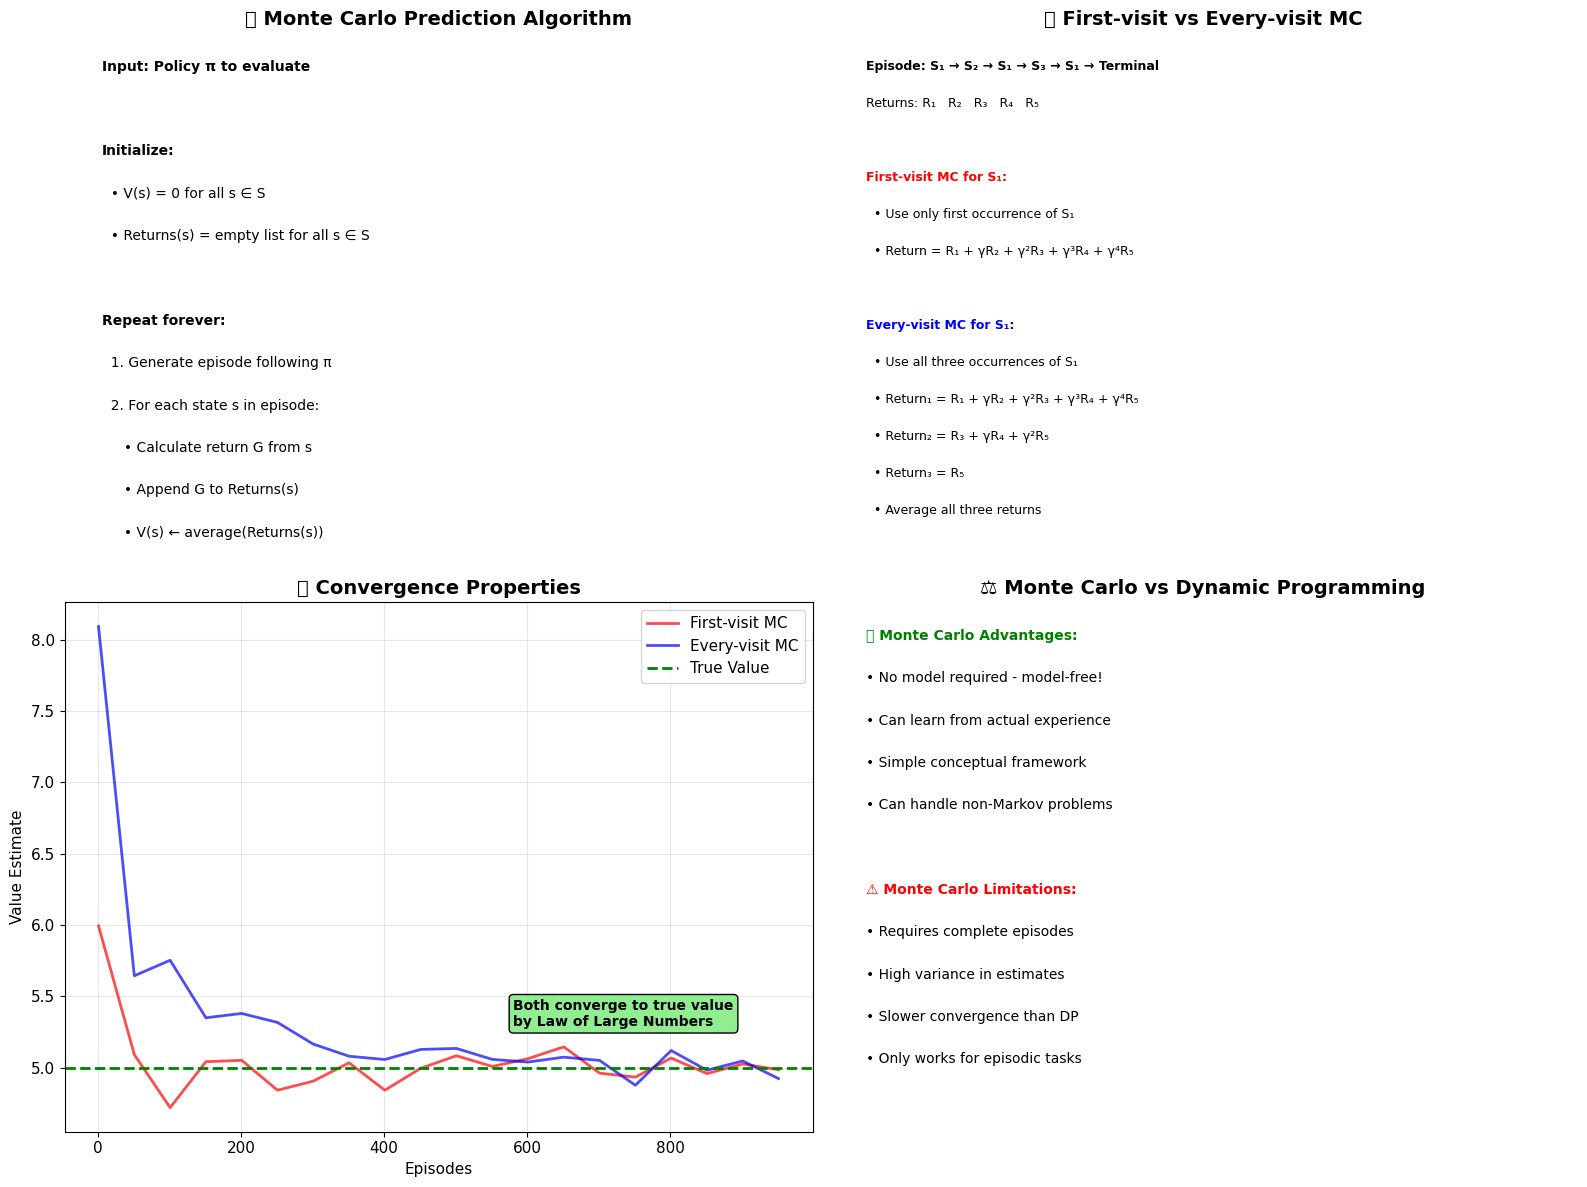

In [5]:

  # ================================
  # 📊 Part 1: Monte Carlo Prediction
  # ================================

  print("\n📊 PART 1: MONTE CARLO PREDICTION")
  print("=" * 45)

  def create_mc_prediction_theory():
      """Visual explanation of Monte Carlo prediction"""

      fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

      # Diagram 1: MC Prediction Algorithm
      ax1.set_title('🎯 Monte Carlo Prediction Algorithm', fontsize=14, fontweight='bold')

      algorithm_steps = [
          'Input: Policy π to evaluate',
          '',
          'Initialize:',
          '  • V(s) = 0 for all s ∈ S',
          '  • Returns(s) = empty list for all s ∈ S',
          '',
          'Repeat forever:',
          '  1. Generate episode following π',
          '  2. For each state s in episode:',
          '     • Calculate return G from s',
          '     • Append G to Returns(s)',
          '     • V(s) ← average(Returns(s))',
      ]

      y_pos = 0.95
      for step in algorithm_steps:
          if step:
              fontweight = 'bold' if any(c in step for c in ['Input:', 'Initialize:', 'Repeat']) else 'normal'
              ax1.text(0.05, y_pos, step, ha='left', va='top', fontsize=10, fontweight=fontweight)
          y_pos -= 0.08

      ax1.set_xlim(0, 1)
      ax1.set_ylim(0, 1)
      ax1.axis('off')

      # Diagram 2: First-visit vs Every-visit
      ax2.set_title('🔍 First-visit vs Every-visit MC', fontsize=14, fontweight='bold')

      # Show example with returns
      episode_example = [
          'Episode: S₁ → S₂ → S₁ → S₃ → S₁ → Terminal',
          'Returns: R₁   R₂   R₃   R₄   R₅',
          '',
          'First-visit MC for S₁:',
          '  • Use only first occurrence of S₁',
          '  • Return = R₁ + γR₂ + γ²R₃ + γ³R₄ + γ⁴R₅',
          '',
          'Every-visit MC for S₁:',
          '  • Use all three occurrences of S₁',
          '  • Return₁ = R₁ + γR₂ + γ²R₃ + γ³R₄ + γ⁴R₅',
          '  • Return₂ = R₃ + γR₄ + γ²R₅',
          '  • Return₃ = R₅',
          '  • Average all three returns'
      ]

      y_pos = 0.95
      for line in episode_example:
          if line:
              color = 'red' if 'First-visit' in line else 'blue' if 'Every-visit' in line else 'black'
              fontweight = 'bold' if any(phrase in line for phrase in ['First-visit', 'Every-visit', 'Episode:']) else 'normal'
              ax2.text(0.05, y_pos, line, ha='left', va='top', fontsize=9, fontweight=fontweight, color=color)
          y_pos -= 0.07

      ax2.set_xlim(0, 1)
      ax2.set_ylim(0, 1)
      ax2.axis('off')

      # Diagram 3: Convergence Properties
      ax3.set_title('📈 Convergence Properties', fontsize=14, fontweight='bold')

      # Simulate convergence
      episodes = np.arange(1, 1001)
      true_value = 5.0

      # First-visit MC (unbiased, slower convergence)
      fv_estimates = true_value + np.random.normal(0, 2/np.sqrt(episodes))

      # Every-visit MC (biased early, faster convergence)
      ev_estimates = true_value + 1.0 * np.exp(-episodes/200) + np.random.normal(0, 1.5/np.sqrt(episodes))

      ax3.plot(episodes[::50], fv_estimates[::50], 'r-', linewidth=2, alpha=0.7, label='First-visit MC')
      ax3.plot(episodes[::50], ev_estimates[::50], 'b-', linewidth=2, alpha=0.7, label='Every-visit MC')
      ax3.axhline(y=true_value, color='green', linestyle='--', linewidth=2, label='True Value')

      ax3.set_xlabel('Episodes')
      ax3.set_ylabel('Value Estimate')
      ax3.legend()
      ax3.grid(True, alpha=0.3)

      ax3.text(0.6, 0.2, 'Both converge to true value\nby Law of Large Numbers',
               transform=ax3.transAxes, fontsize=10, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))

      # Diagram 4: Advantages vs DP
      ax4.set_title('⚖️ Monte Carlo vs Dynamic Programming', fontsize=14, fontweight='bold')

      comparison = [
          ('🎯 Monte Carlo Advantages:', 'green'),
          ('• No model required - model-free!', 'black'),
          ('• Can learn from actual experience', 'black'),
          ('• Simple conceptual framework', 'black'),
          ('• Can handle non-Markov problems', 'black'),
          ('', 'white'),
          ('⚠️ Monte Carlo Limitations:', 'red'),
          ('• Requires complete episodes', 'black'),
          ('• High variance in estimates', 'black'),
          ('• Slower convergence than DP', 'black'),
          ('• Only works for episodic tasks', 'black'),
      ]

      y_pos = 0.95
      for text, color in comparison:
          if text:
              fontweight = 'bold' if any(c in text for c in ['🎯', '⚠️']) else 'normal'
              ax4.text(0.05, y_pos, text, ha='left', va='top', fontsize=10,
                      fontweight=fontweight, color=color)
          y_pos -= 0.08

      ax4.set_xlim(0, 1)
      ax4.set_ylim(0, 1)
      ax4.axis('off')

      plt.tight_layout()
      return fig

  mc_prediction_theory_fig = create_mc_prediction_theory()
  plt.show()

In [8]:

  class MonteCarloPrediction:
      """
      Monte Carlo Prediction implementation for state value estimation
      """

      def __init__(self, env, gamma=0.9):
          self.env = env
          self.gamma = gamma

          # Initialize value function and return tracking
          self.values = {state: 0.0 for state in env.states}
          self.returns = {state: [] for state in env.states}

          # Statistics tracking
          self.episode_count = 0
          self.value_history = []

      def first_visit_mc_prediction(self, policy, num_episodes=1000, verbose=True):
          """
          First-visit Monte Carlo prediction

          For each episode:
          1. Generate episode following policy
          2. For each state s appearing first time in episode:
             - Calculate return G from that point
             - Add G to Returns(s)
             - Update V(s) as average of Returns(s)
          """

          if verbose:
              print("🎯 FIRST-VISIT MONTE CARLO PREDICTION")
              print("=" * 45)
              print(f"   Episodes: {num_episodes}")
              print(f"   Discount factor: {self.gamma}")
              print()

          for episode_num in tqdm(range(num_episodes), disable=not verbose, desc="Episodes"):
              # Generate episode
              episode = self.env.generate_episode(policy)

              # Calculate returns for each state (first-visit only)
              visited_states = set()

              for t, (state, action, reward) in enumerate(episode):
                  if state not in visited_states:
                      visited_states.add(state)

                      # Calculate return from this point
                      G = 0
                      for k, (_, _, future_reward) in enumerate(episode[t:]):
                          G += (self.gamma ** k) * future_reward

                      # Update value estimate
                      self.returns[state].append(G)
                      self.values[state] = np.mean(self.returns[state])

              # Track progress
              if episode_num % 100 == 0:
                  self.value_history.append(self.values.copy())

          self.episode_count = num_episodes

          if verbose:
              print(f"\n✅ Completed {num_episodes} episodes!")
              print(f"   Sample estimates:")
              for i, state in enumerate(list(self.env.states)[:5]):
                  visits = len(self.returns[state])
                  value = self.values[state]
                  print(f"      V({state}) = {value:.4f} (from {visits} visits)")

          return self.values.copy()

      def every_visit_mc_prediction(self, policy, num_episodes=1000, verbose=True):
          """
          Every-visit Monte Carlo prediction

          For each episode:
          1. Generate episode following policy
          2. For each occurrence of state s in episode:
             - Calculate return G from that point
             - Add G to Returns(s)
             - Update V(s) as average of Returns(s)
          """

          if verbose:
              print("🔄 EVERY-VISIT MONTE CARLO PREDICTION")
              print("=" * 45)
              print(f"   Episodes: {num_episodes}")
              print(f"   Discount factor: {self.gamma}")
              print()

          # Reset for every-visit
          self.returns = {state: [] for state in self.env.states}

          for episode_num in tqdm(range(num_episodes), disable=not verbose, desc="Episodes"):
              # Generate episode
              episode = self.env.generate_episode(policy)

              # Calculate returns for each occurrence of each state
              for t, (state, action, reward) in enumerate(episode):
                  # Calculate return from this point
                  G = 0
                  for k, (_, _, future_reward) in enumerate(episode[t:]):
                      G += (self.gamma ** k) * future_reward

                  # Update value estimate
                  self.returns[state].append(G)
                  self.values[state] = np.mean(self.returns[state])

              # Track progress
              if episode_num % 100 == 0:
                  self.value_history.append(self.values.copy())

          if verbose:
              print(f"\n✅ Completed {num_episodes} episodes!")
              print(f"   Sample estimates:")
              for i, state in enumerate(list(self.env.states)[:5]):
                  visits = len(self.returns[state])
                  value = self.values[state]
                  print(f"      V({state}) = {value:.4f} (from {visits} visits)")

          return self.values.copy()

      def visualize_convergence(self, true_values=None):
          """Visualize the convergence of value estimates"""

          if not self.value_history:
              print("No convergence history to plot")
              return

          fig, axes = plt.subplots(2, 2, figsize=(16, 10))

          # Plot 1: Value evolution for sample states
          ax1 = axes[0, 0]
          sample_states = [self.env.start_state, (2, 2), (4, 4)]

          episodes = np.arange(0, len(self.value_history)) * 100

          for state in sample_states:
              if state in self.env.states:
                  values = [history[state] for history in self.value_history]
                  ax1.plot(episodes, values, marker='o', linewidth=2, label=f'State {state}')

                  # True value line if available
                  if true_values and state in true_values:
                      ax1.axhline(y=true_values[state], linestyle='--', alpha=0.7,
                                 label=f'True V{state}')

          ax1.set_title('📈 Value Function Convergence', fontweight='bold')
          ax1.set_xlabel('Episodes')
          ax1.set_ylabel('State Value')
          ax1.legend()
          ax1.grid(True, alpha=0.3)

          # Plot 2: Visit count distribution
          ax2 = axes[0, 1]
          visit_counts = [len(self.returns[state]) for state in self.env.states]

          ax2.hist(visit_counts, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
          ax2.set_title('📊 Visit Count Distribution', fontweight='bold')
          ax2.set_xlabel('Number of Visits')
          ax2.set_ylabel('Number of States')
          ax2.grid(True, alpha=0.3)

          # Plot 3: Final value function heatmap
          ax3 = axes[1, 0]
          if self.env.env_type == 'grid':
              value_grid = np.full((self.env.height, self.env.width), np.nan)

              for (r, c) in self.env.states:
                  value_grid[r, c] = self.values[(r, c)]

              im = ax3.imshow(value_grid, cmap='RdYlGn', interpolation='nearest')

              # Add value text
              for row in range(self.env.height):
                  for col in range(self.env.width):
                      if (row, col) in self.values:
                          value = self.values[(row, col)]
                          color = 'white' if value < 0 else 'black'
                          ax3.text(col, row, f'{value:.2f}', ha='center', va='center',
                                 fontweight='bold', color=color, fontsize=9)

              plt.colorbar(im, ax=ax3, shrink=0.8)
              ax3.set_title('🗺️ Final Value Function', fontweight='bold')

          # Plot 4: Estimation variance
          ax4 = axes[1, 1]
          if len(self.value_history) > 1:
              # Calculate variance over time
              variances = []
              for i in range(1, len(self.value_history)):
                  current_values = np.array(list(self.value_history[i].values()))
                  prev_values = np.array(list(self.value_history[i-1].values()))
                  variance = np.mean((current_values - prev_values) ** 2)
                  variances.append(variance)

              ax4.semilogy(episodes[1:], variances, 'r-', linewidth=2)
              ax4.set_title('📉 Estimation Variance', fontweight='bold')
              ax4.set_xlabel('Episodes')
              ax4.set_ylabel('Variance (log scale)')
              ax4.grid(True, alpha=0.3)

          plt.tight_layout()
          plt.show()


🧪 TESTING MONTE CARLO PREDICTION
📊 Testing First-Visit MC Prediction...
🎯 FIRST-VISIT MONTE CARLO PREDICTION
   Episodes: 2000
   Discount factor: 0.9



Episodes:   0%|          | 0/2000 [00:00<?, ?it/s]


✅ Completed 2000 episodes!
   Sample estimates:
      V((0, 0)) = 3.6148 (from 2000 visits)
      V((0, 1)) = -0.6223 (from 62 visits)
      V((0, 2)) = -9.1000 (from 5 visits)
      V((0, 3)) = 0.0000 (from 0 visits)
      V((0, 4)) = 0.0000 (from 0 visits)


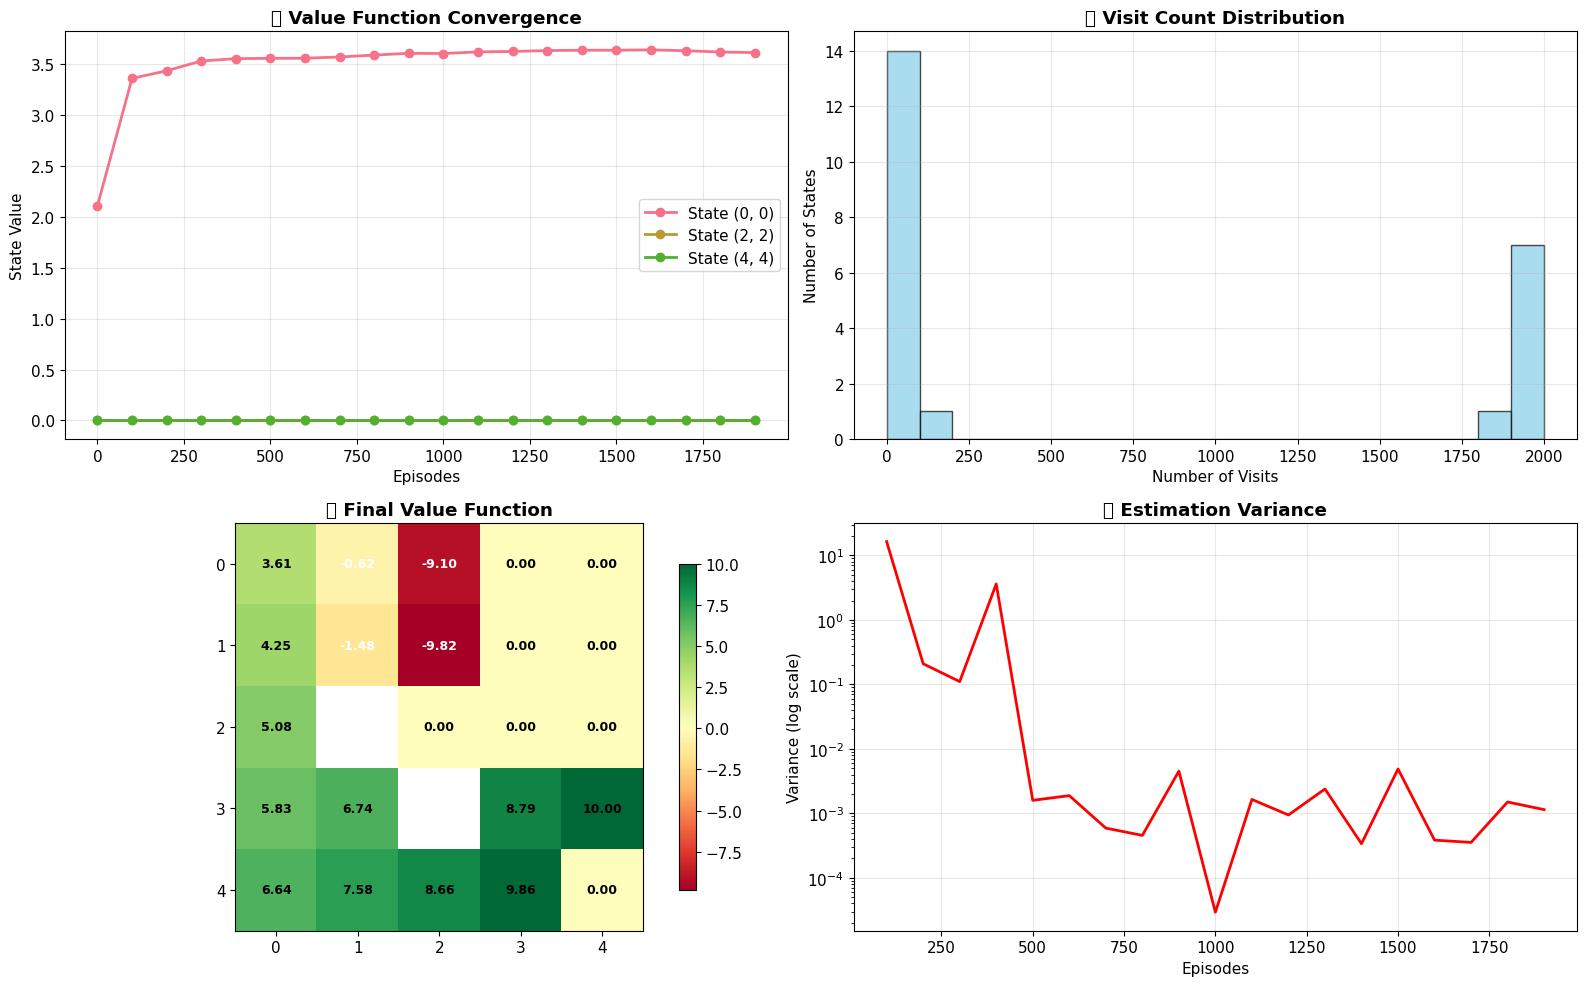


📊 Testing Every-Visit MC Prediction...
🔄 EVERY-VISIT MONTE CARLO PREDICTION
   Episodes: 2000
   Discount factor: 0.9



Episodes:   0%|          | 0/2000 [00:00<?, ?it/s]


✅ Completed 2000 episodes!
   Sample estimates:
      V((0, 0)) = 3.5337 (from 2180 visits)
      V((0, 1)) = -1.6909 (from 93 visits)
      V((0, 2)) = -9.1000 (from 2 visits)
      V((0, 3)) = 0.0000 (from 0 visits)
      V((0, 4)) = 0.0000 (from 0 visits)

⚖️ COMPARING FIRST-VISIT vs EVERY-VISIT MC
State        First-Visit  Every-Visit  Difference  
--------------------------------------------------
(0, 0)       3.6148       3.5337       0.0811      
(0, 1)       -0.6223      -1.6909      1.0687      
(0, 2)       -9.1000      -9.1000      0.0000      
(0, 3)       0.0000       0.0000       0.0000      
(0, 4)       0.0000       0.0000       0.0000      
(1, 0)       4.2496       4.2024       0.0472      
(1, 1)       -1.4781      -1.6255      0.1474      
(1, 2)       -9.8246      -9.3143      0.5103      
(1, 3)       0.0000       0.0000       0.0000      
(1, 4)       0.0000       0.0000       0.0000      


In [9]:

  # Define test policies
  def random_policy(state):
      """Random policy for testing"""
      actions = env.get_valid_actions(state)
      return np.random.choice(actions) if actions else None

  def greedy_policy(state):
      """Simple greedy policy toward goal"""
      if state in env.terminal_states:
          return None

      row, col = state
      goal_row, goal_col = 4, 4  # Bottom-right corner

      actions = env.get_valid_actions(state)
      if not actions:
          return None

      # Move toward goal
      if row < goal_row and 'down' in actions:
          return 'down'
      elif col < goal_col and 'right' in actions:
          return 'right'
      elif row > goal_row and 'up' in actions:
          return 'up'
      elif col > goal_col and 'left' in actions:
          return 'left'
      else:
          return np.random.choice(actions)

  # Test Monte Carlo Prediction
  print("\n🧪 TESTING MONTE CARLO PREDICTION")
  print("=" * 40)

  # Create predictor
  mc_predictor = MonteCarloPrediction(env, gamma=0.9)

  print("📊 Testing First-Visit MC Prediction...")
  fv_values = mc_predictor.first_visit_mc_prediction(greedy_policy, num_episodes=2000, verbose=True)

  # Visualize convergence
  mc_predictor.visualize_convergence()

  # Test Every-Visit MC
  print("\n📊 Testing Every-Visit MC Prediction...")
  mc_predictor_ev = MonteCarloPrediction(env, gamma=0.9)
  ev_values = mc_predictor_ev.every_visit_mc_prediction(greedy_policy, num_episodes=2000, verbose=True)

  # Compare the methods
  print("\n⚖️ COMPARING FIRST-VISIT vs EVERY-VISIT MC")
  print("=" * 50)
  print(f"{'State':<12} {'First-Visit':<12} {'Every-Visit':<12} {'Difference':<12}")
  print("-" * 50)

  for state in list(env.states)[:10]:  # Show first 10 states
      fv_val = fv_values[state]
      ev_val = ev_values[state]
      diff = abs(fv_val - ev_val)
      print(f"{str(state):<12} {fv_val:<12.4f} {ev_val:<12.4f} {diff:<12.4f}")

  # 🎯 Part 2: Monte Carlo Estimation of Action Values

  **Problem**: State values V^π(s) aren't enough for control - we need action values Q^π(s,a)!

  **Solution**: Estimate Q^π(s,a) by averaging returns following each state-action pair.


🎯 PART 2: MONTE CARLO ESTIMATION OF ACTION VALUES


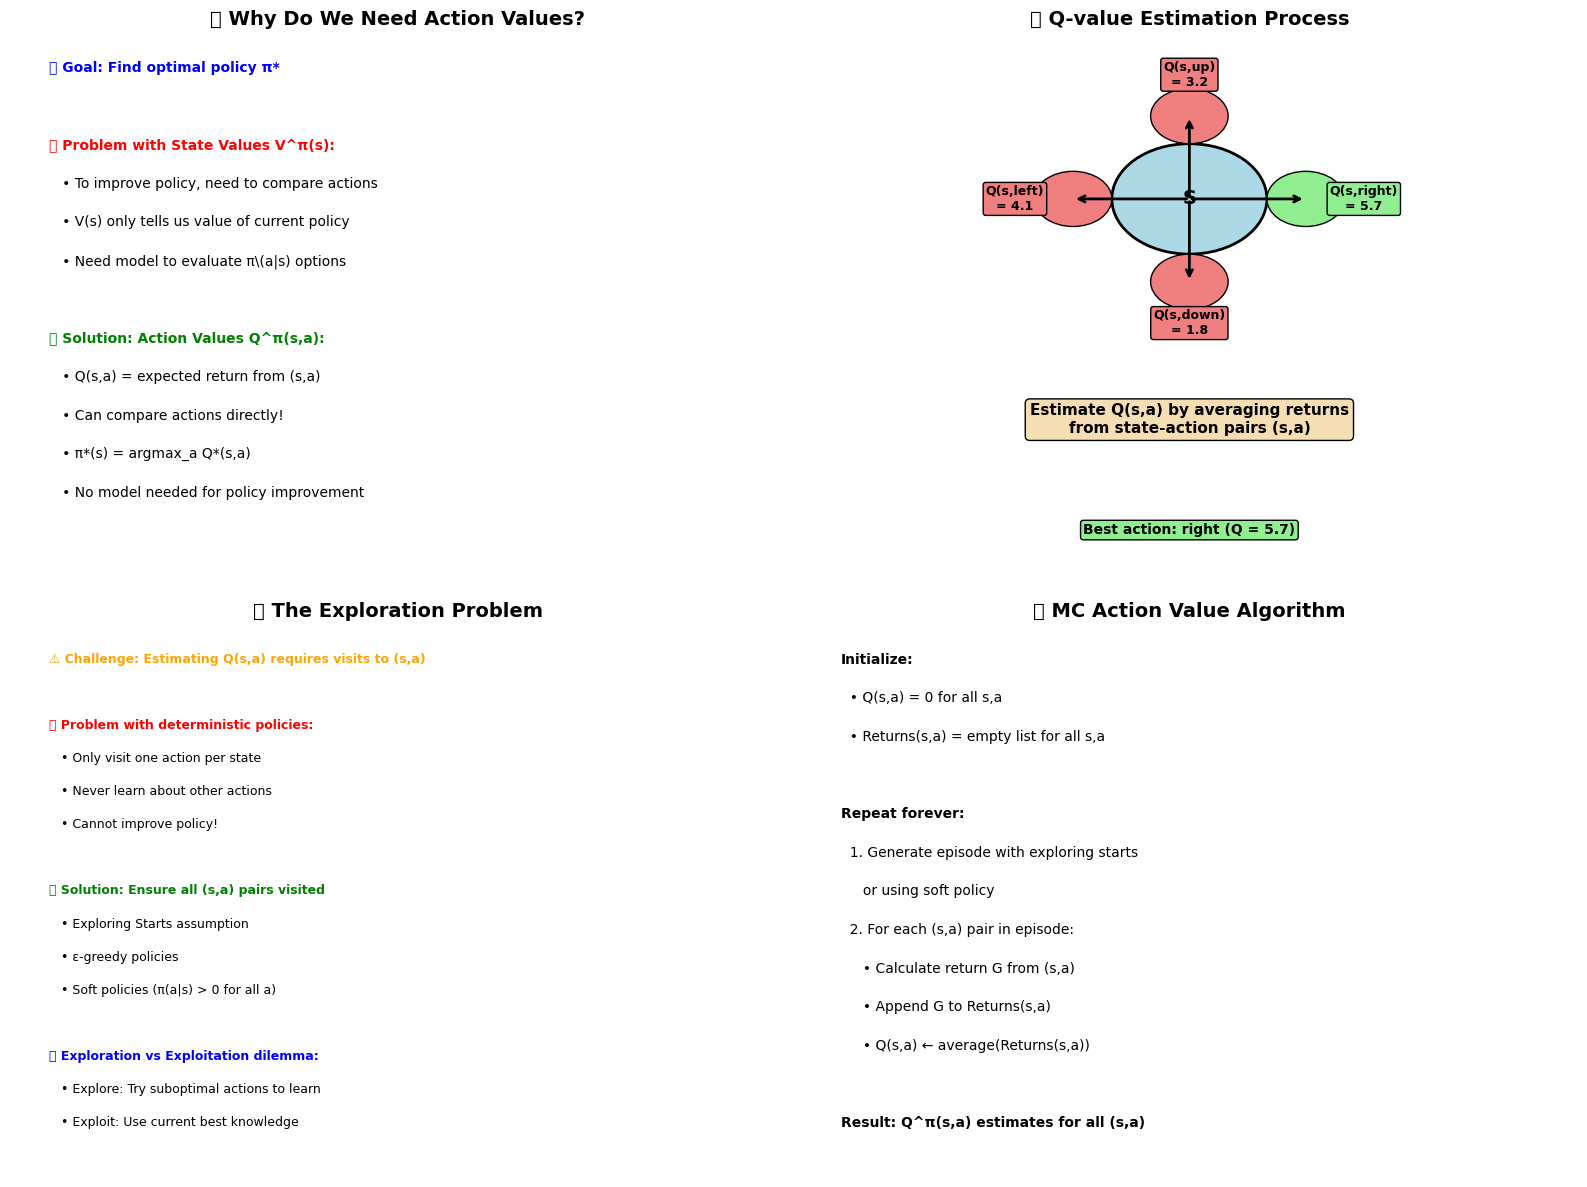

In [10]:
  # ================================
  # 🎯 Part 2: Monte Carlo Estimation of Action Values
  # ================================

  print("\n🎯 PART 2: MONTE CARLO ESTIMATION OF ACTION VALUES")
  print("=" * 60)

  def create_action_value_theory():
      """Visual explanation of action value estimation"""

      fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

      # Diagram 1: Why Action Values?
      ax1.set_title('🤔 Why Do We Need Action Values?', fontsize=14, fontweight='bold')

      explanation = [
          '🎯 Goal: Find optimal policy π*',
          '',
          '❌ Problem with State Values V^π(s):',
          '   • To improve policy, need to compare actions',
          '   • V(s) only tells us value of current policy',
          '   • Need model to evaluate π\\(a|s) options',
          '',
          '✅ Solution: Action Values Q^π(s,a):',
          '   • Q(s,a) = expected return from (s,a)',
          '   • Can compare actions directly!',
          '   • π*(s) = argmax_a Q*(s,a)',
          '   • No model needed for policy improvement'
      ]

      y_pos = 0.95
      for line in explanation:
          if line:
              color = 'red' if '❌' in line else 'green' if '✅' in line else 'blue' if '🎯' in line else 'black'
              fontweight = 'bold' if any(c in line for c in ['🎯', '❌', '✅']) else 'normal'
              ax1.text(0.05, y_pos, line, ha='left', va='top', fontsize=10,
                      fontweight=fontweight, color=color)
          y_pos -= 0.07

      ax1.set_xlim(0, 1)
      ax1.set_ylim(0, 1)
      ax1.axis('off')

      # Diagram 2: Q-value Estimation Process
      ax2.set_title('📊 Q-value Estimation Process', fontsize=14, fontweight='bold')

      # Show state-action pairs
      center_x, center_y = 0.5, 0.7
      state_circle = Circle((center_x, center_y), 0.1, facecolor='lightblue',
                           edgecolor='black', linewidth=2)
      ax2.add_patch(state_circle)
      ax2.text(center_x, center_y, 'S', ha='center', va='center',
               fontsize=14, fontweight='bold')

      # Actions around the state
      actions = [('up', 0, 0.15), ('right', 0.15, 0), ('down', 0, -0.15), ('left', -0.15, 0)]
      q_values = [3.2, 5.7, 1.8, 4.1]

      for (action, dx, dy), q_val in zip(actions, q_values):
          action_x, action_y = center_x + dx, center_y + dy

          # Action circle
          color = 'lightgreen' if q_val == max(q_values) else 'lightcoral'
          action_circle = Circle((action_x, action_y), 0.05, facecolor=color,
                                edgecolor='black')
          ax2.add_patch(action_circle)

          # Arrow
          ax2.annotate('', xy=(action_x, action_y), xytext=(center_x, center_y),
                      arrowprops=dict(arrowstyle='->', lw=2))

          # Q-value label
          label_x = action_x + dx * 0.5
          label_y = action_y + dy * 0.5
          ax2.text(label_x, label_y, f'Q(s,{action})\n= {q_val}',
                  ha='center', va='center', fontsize=9, fontweight='bold',
                  bbox=dict(boxstyle="round,pad=0.2", facecolor=color))

      ax2.text(0.5, 0.3, 'Estimate Q(s,a) by averaging returns\nfrom state-action pairs (s,a)',
               ha='center', va='center', fontsize=11, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='wheat'))

      ax2.text(0.5, 0.1, f'Best action: {actions[np.argmax(q_values)][0]} (Q = {max(q_values)})',
               ha='center', va='center', fontsize=10, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.2", facecolor='lightgreen'))

      ax2.set_xlim(0, 1)
      ax2.set_ylim(0, 1)
      ax2.axis('off')

      # Diagram 3: Exploration Problem
      ax3.set_title('🔍 The Exploration Problem', fontsize=14, fontweight='bold')

      exploration_text = [
          '⚠️ Challenge: Estimating Q(s,a) requires visits to (s,a)',
          '',
          '❌ Problem with deterministic policies:',
          '   • Only visit one action per state',
          '   • Never learn about other actions',
          '   • Cannot improve policy!',
          '',
          '✅ Solution: Ensure all (s,a) pairs visited',
          '   • Exploring Starts assumption',
          '   • ε-greedy policies',
          '   • Soft policies (π(a|s) > 0 for all a)',
          '',
          '🎯 Exploration vs Exploitation dilemma:',
          '   • Explore: Try suboptimal actions to learn',
          '   • Exploit: Use current best knowledge'
      ]

      y_pos = 0.95
      for line in exploration_text:
          if line:
              color = 'red' if '❌' in line else 'green' if '✅' in line else 'blue' if '🎯' in line else 'orange' if '⚠️' in line else 'black'
              fontweight = 'bold' if any(c in line for c in ['⚠️', '❌', '✅', '🎯']) else 'normal'
              ax3.text(0.05, y_pos, line, ha='left', va='top', fontsize=9,
                      fontweight=fontweight, color=color)
          y_pos -= 0.06

      ax3.set_xlim(0, 1)
      ax3.set_ylim(0, 1)
      ax3.axis('off')

      # Diagram 4: MC Action Value Algorithm
      ax4.set_title('🔄 MC Action Value Algorithm', fontsize=14, fontweight='bold')

      algorithm = [
          'Initialize:',
          '  • Q(s,a) = 0 for all s,a',
          '  • Returns(s,a) = empty list for all s,a',
          '',
          'Repeat forever:',
          '  1. Generate episode with exploring starts',
          '     or using soft policy',
          '  2. For each (s,a) pair in episode:',
          '     • Calculate return G from (s,a)',
          '     • Append G to Returns(s,a)',
          '     • Q(s,a) ← average(Returns(s,a))',
          '',
          'Result: Q^π(s,a) estimates for all (s,a)'
      ]

      y_pos = 0.95
      for line in algorithm:
          if line:
              fontweight = 'bold' if any(phrase in line for phrase in ['Initialize:', 'Repeat', 'Result:']) else 'normal'
              ax4.text(0.05, y_pos, line, ha='left', va='top', fontsize=10, fontweight=fontweight)
          y_pos -= 0.07

      ax4.set_xlim(0, 1)
      ax4.set_ylim(0, 1)
      ax4.axis('off')

      plt.tight_layout()
      return fig

  action_value_theory_fig = create_action_value_theory()
  plt.show()


🧪 TESTING MONTE CARLO ACTION VALUE ESTIMATION
📊 Testing with Exploring Starts...
🎯 MONTE CARLO ACTION VALUE ESTIMATION
   Episodes: 3000
   Exploring starts: True
   Discount factor: 0.9



Episodes:   0%|          | 0/3000 [00:00<?, ?it/s]


✅ Completed 3000 episodes!
   Q-value summary for sample states:
      State (0, 0):
         Q((0, 0),up) = 3.0573 (from 120 visits)
         Q((0, 0),down) = 3.6131 (from 465 visits)
         Q((0, 0),left) = 2.8333 (from 126 visits)
         Q((0, 0),right) = -1.3728 (from 138 visits)
      State (2, 2):
      State (3, 3):
         Q((3, 3),up) = 5.8568 (from 35 visits)
         Q((3, 3),down) = 8.7026 (from 282 visits)
         Q((3, 3),left) = 7.7405 (from 38 visits)
         Q((3, 3),right) = 8.7656 (from 28 visits)

🎯 Q-values for state (1, 1):


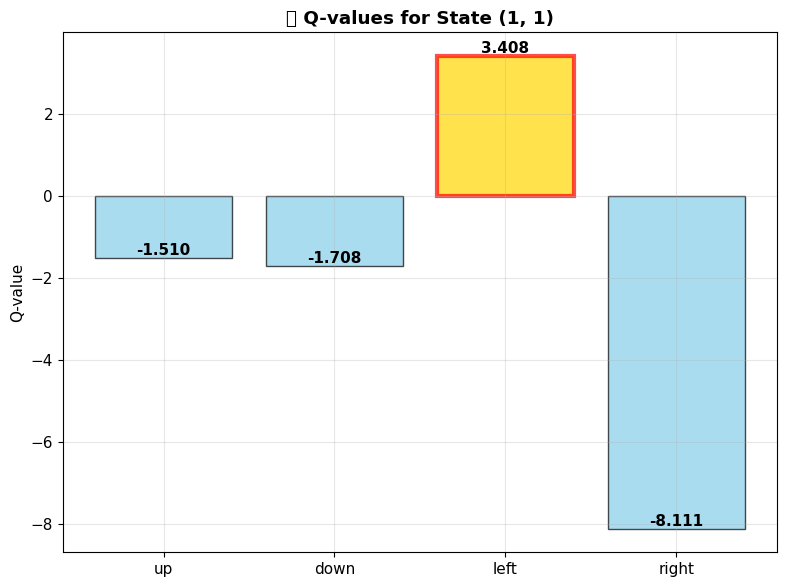


🎯 Greedy Policy from Estimated Q-values:


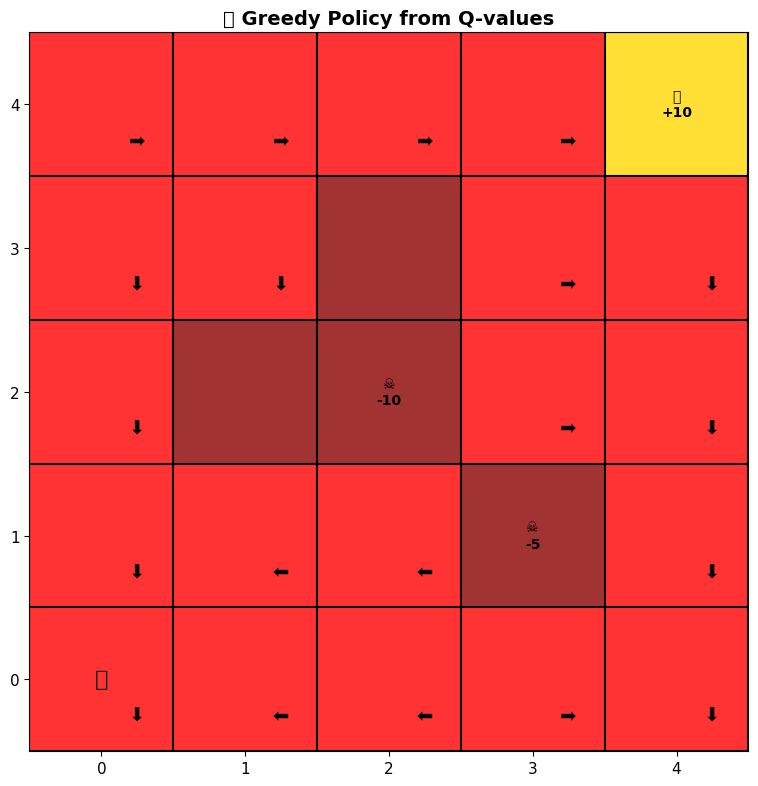

In [12]:
  class MonteCarloActionValues:
      """
      Monte Carlo estimation of action values Q^π(s,a)
      """

      def __init__(self, env, gamma=0.9):
          self.env = env
          self.gamma = gamma

          # Initialize Q-values and return tracking
          self.q_values = {}
          self.returns = {}

          for state in env.states:
              self.q_values[state] = {}
              self.returns[state] = {}
              for action in env.get_valid_actions(state):
                  self.q_values[state][action] = 0.0
                  self.returns[state][action] = []

          # Statistics
          self.episode_count = 0
          self.q_history = []

      def estimate_action_values(self, policy, num_episodes=2000,
                               exploring_starts=True, verbose=True):
          """
          Estimate action values using Monte Carlo

          Args:
              policy: Policy to evaluate (function or dict)
              num_episodes: Number of episodes to generate
              exploring_starts: Whether to use exploring starts
              verbose: Whether to print progress
          """

          if verbose:
              print("🎯 MONTE CARLO ACTION VALUE ESTIMATION")
              print("=" * 45)
              print(f"   Episodes: {num_episodes}")
              print(f"   Exploring starts: {exploring_starts}")
              print(f"   Discount factor: {self.gamma}")
              print()

          for episode_num in tqdm(range(num_episodes), disable=not verbose, desc="Episodes"):
              # Generate episode with optional exploring starts
              if exploring_starts:
                  episode = self._generate_episode_exploring_starts(policy)
              else:
                  episode = self.env.generate_episode(policy)

              # Process episode for Q-value updates
              self._process_episode_for_q_values(episode)

              # Track progress
              if episode_num % 200 == 0:
                  self.q_history.append(self._copy_q_values())

          self.episode_count = num_episodes

          if verbose:
              print(f"\n✅ Completed {num_episodes} episodes!")
              self._print_q_value_summary()

          return self.q_values

      def _generate_episode_exploring_starts(self, policy):
          """
          Generate episode with exploring starts:
          - Random initial state
          - Random initial action
          - Then follow policy
          """
          # Random start state and action
          start_state = random.choice(self.env.states)
          if start_state in self.env.terminal_states:
              start_state = self.env.start_state

          valid_actions = self.env.get_valid_actions(start_state)
          if not valid_actions:
              return self.env.generate_episode(policy)

          start_action = random.choice(valid_actions)

          # Manually set initial state
          self.env.current_state = start_state

          # Take initial action
          next_state, reward, done, _ = self.env.step(start_action)
          episode = [(start_state, start_action, reward)]

          if done:
              return episode

          # Continue with policy
          state = next_state
          for _ in range(1000):  # Max episode length
              if callable(policy):
                  action = policy(state)
              else:
                  action = policy.get(state, random.choice(self.env.get_valid_actions(state)))

              if action is None:
                  break

              next_state, reward, done, _ = self.env.step(action)
              episode.append((state, action, reward))

              if done:
                  break

              state = next_state

          return episode

      def _process_episode_for_q_values(self, episode):
          """Process episode to update Q-values (first-visit)"""
          visited_pairs = set()

          for t, (state, action, reward) in enumerate(episode):
              sa_pair = (state, action)

              if sa_pair not in visited_pairs and state in self.q_values and action in self.q_values[state]:
                  visited_pairs.add(sa_pair)

                  # Calculate return from this point
                  G = 0
                  for k, (_, _, future_reward) in enumerate(episode[t:]):
                      G += (self.gamma ** k) * future_reward

                  # Update Q-value
                  self.returns[state][action].append(G)
                  self.q_values[state][action] = np.mean(self.returns[state][action])

      def _copy_q_values(self):
          """Create deep copy of current Q-values"""
          return {state: action_values.copy()
                  for state, action_values in self.q_values.items()}

      def _print_q_value_summary(self):
          """Print summary of Q-value estimates"""
          print(f"   Q-value summary for sample states:")

          sample_states = [self.env.start_state, (2, 2), (3, 3)]

          for state in sample_states:
              if state in self.q_values:
                  print(f"      State {state}:")
                  for action, q_val in self.q_values[state].items():
                      visits = len(self.returns[state][action])
                      print(f"         Q({state},{action}) = {q_val:.4f} (from {visits} visits)")

      def get_greedy_policy(self):
          """Extract greedy policy from current Q-values"""
          policy = {}

          for state in self.env.states:
              if state in self.env.terminal_states:
                  policy[state] = None
                  continue

              if state in self.q_values and self.q_values[state]:
                  best_action = max(self.q_values[state].keys(),
                                  key=lambda a: self.q_values[state][a])
                  policy[state] = best_action
              else:
                  valid_actions = self.env.get_valid_actions(state)
                  policy[state] = random.choice(valid_actions) if valid_actions else None

          return policy

      def visualize_q_values(self, state=None):
          """Visualize Q-values for a specific state or the entire environment"""

          if state is not None:
              # Single state Q-value visualization
              if state not in self.q_values:
                  print(f"No Q-values available for state {state}")
                  return

              fig, ax = plt.subplots(1, 1, figsize=(8, 6))

              actions = list(self.q_values[state].keys())
              q_vals = list(self.q_values[state].values())

              bars = ax.bar(actions, q_vals, alpha=0.7, color='skyblue', edgecolor='black')

              # Highlight best action
              if q_vals:
                  best_idx = np.argmax(q_vals)
                  bars[best_idx].set_color('gold')
                  bars[best_idx].set_edgecolor('red')
                  bars[best_idx].set_linewidth(3)

              ax.set_title(f'🎯 Q-values for State {state}', fontweight='bold')
              ax.set_ylabel('Q-value')
              ax.grid(True, alpha=0.3)

              # Add value labels
              for bar, q_val in zip(bars, q_vals):
                  height = bar.get_height()
                  ax.text(bar.get_x() + bar.get_width()/2., height,
                         f'{q_val:.3f}', ha='center', va='bottom', fontweight='bold')

              plt.tight_layout()
              plt.show()

          else:
              # Visualize policy derived from Q-values
              policy = self.get_greedy_policy()
              fig = self.env.visualize(policy=policy,
                                     title="Greedy Policy from Q-values")
              plt.show()

  # Test Action Value Estimation
  print("\n🧪 TESTING MONTE CARLO ACTION VALUE ESTIMATION")
  print("=" * 55)

  # Create action value estimator
  mc_q_estimator = MonteCarloActionValues(env, gamma=0.9)

  # Test with exploring starts
  print("📊 Testing with Exploring Starts...")
  q_values = mc_q_estimator.estimate_action_values(
      greedy_policy, num_episodes=3000, exploring_starts=True, verbose=True
  )

  # Visualize Q-values for a sample state
  sample_state = (1, 1)
  print(f"\n🎯 Q-values for state {sample_state}:")
  mc_q_estimator.visualize_q_values(sample_state)

  # Show greedy policy from Q-values
  print("\n🎯 Greedy Policy from Estimated Q-values:")
  mc_q_estimator.visualize_q_values()

  # 🔄 Part 3: Monte Carlo Control

  **Goal**: Find the optimal policy π* using Monte Carlo methods.

  **Approach**: Generalized Policy Iteration with Monte Carlo
  - **Policy Evaluation**: Estimate Q^π using MC
  - **Policy Improvement**: Make policy greedy w.r.t. Q^π


🔄 PART 3: MONTE CARLO CONTROL


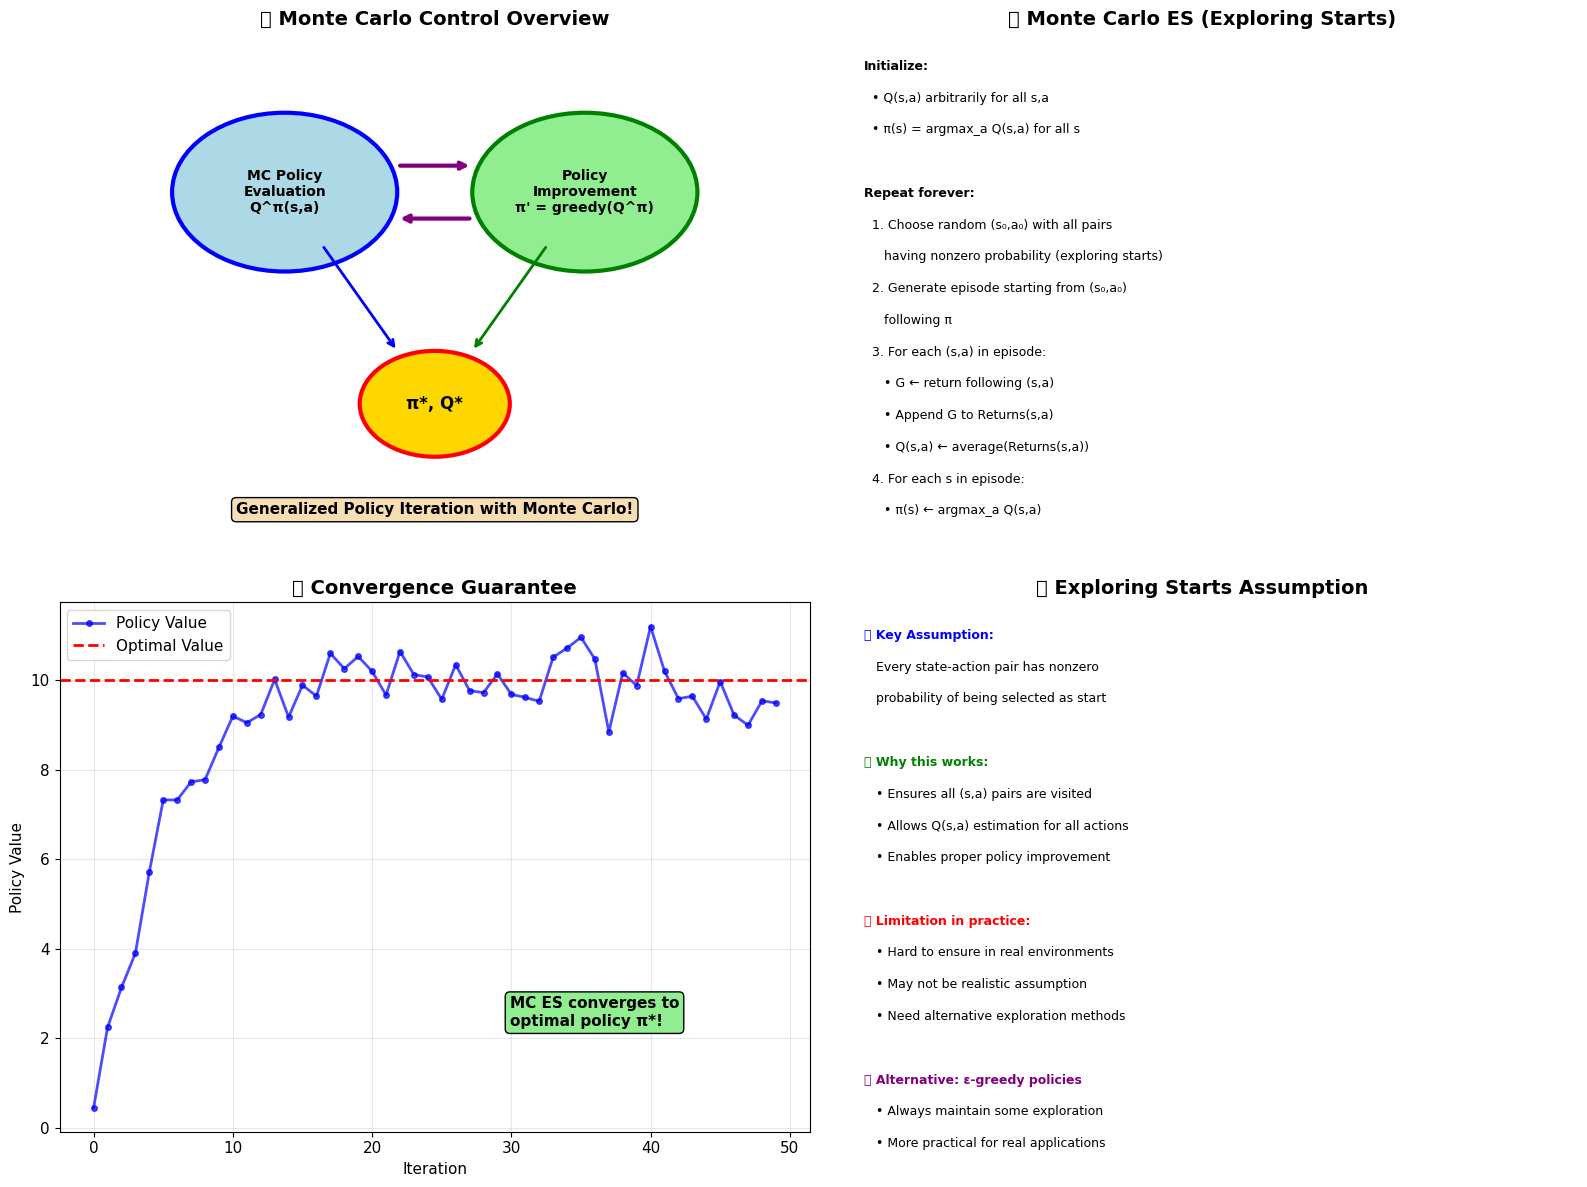

In [14]:

  # ================================
  # 🔄 Part 3: Monte Carlo Control
  # ================================

  print("\n🔄 PART 3: MONTE CARLO CONTROL")
  print("=" * 40)

  def create_mc_control_theory():
      """Visual explanation of Monte Carlo control"""

      fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

      # Diagram 1: MC Control Overview
      ax1.set_title('🔄 Monte Carlo Control Overview', fontsize=14, fontweight='bold')

      # GPI with MC
      # Policy Evaluation circle
      eval_circle = Circle((0.3, 0.7), 0.15, facecolor='lightblue',
                          edgecolor='blue', linewidth=3)
      ax1.add_patch(eval_circle)
      ax1.text(0.3, 0.7, 'MC Policy\nEvaluation\nQ^π(s,a)', ha='center', va='center',
               fontweight='bold', fontsize=10)

      # Policy Improvement circle
      imp_circle = Circle((0.7, 0.7), 0.15, facecolor='lightgreen',
                         edgecolor='green', linewidth=3)
      ax1.add_patch(imp_circle)
      ax1.text(0.7, 0.7, 'Policy\nImprovement\nπ\' = greedy(Q^π)', ha='center', va='center',
               fontweight='bold', fontsize=10)

      # Interaction arrows
      ax1.annotate('', xy=(0.55, 0.75), xytext=(0.45, 0.75),
                  arrowprops=dict(arrowstyle='->', lw=3, color='purple'))
      ax1.annotate('', xy=(0.45, 0.65), xytext=(0.55, 0.65),
                  arrowprops=dict(arrowstyle='->', lw=3, color='purple'))

      # Optimal policy
      opt_circle = Circle((0.5, 0.3), 0.1, facecolor='gold',
                         edgecolor='red', linewidth=3)
      ax1.add_patch(opt_circle)
      ax1.text(0.5, 0.3, 'π*, Q*', ha='center', va='center',
               fontweight='bold', fontsize=12)

      # Convergence arrows
      ax1.annotate('', xy=(0.45, 0.4), xytext=(0.35, 0.6),
                  arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
      ax1.annotate('', xy=(0.55, 0.4), xytext=(0.65, 0.6),
                  arrowprops=dict(arrowstyle='->', lw=2, color='green'))

      ax1.text(0.5, 0.1, 'Generalized Policy Iteration with Monte Carlo!',
               ha='center', va='center', fontsize=11, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='wheat'))

      ax1.set_xlim(0, 1)
      ax1.set_ylim(0, 1)
      ax1.axis('off')

      # Diagram 2: MC ES Algorithm
      ax2.set_title('🚀 Monte Carlo ES (Exploring Starts)', fontsize=14, fontweight='bold')

      es_algorithm = [
          'Initialize:',
          '  • Q(s,a) arbitrarily for all s,a',
          '  • π(s) = argmax_a Q(s,a) for all s',
          '',
          'Repeat forever:',
          '  1. Choose random (s₀,a₀) with all pairs',
          '     having nonzero probability (exploring starts)',
          '  2. Generate episode starting from (s₀,a₀)',
          '     following π',
          '  3. For each (s,a) in episode:',
          '     • G ← return following (s,a)',
          '     • Append G to Returns(s,a)',
          '     • Q(s,a) ← average(Returns(s,a))',
          '  4. For each s in episode:',
          '     • π(s) ← argmax_a Q(s,a)'
      ]

      y_pos = 0.95
      for line in es_algorithm:
          if line:
              fontweight = 'bold' if any(phrase in line for phrase in ['Initialize:', 'Repeat']) else 'normal'
              ax2.text(0.05, y_pos, line, ha='left', va='top', fontsize=9, fontweight=fontweight)
          y_pos -= 0.06

      ax2.set_xlim(0, 1)
      ax2.set_ylim(0, 1)
      ax2.axis('off')

      # Diagram 3: Convergence Guarantee
      ax3.set_title('✅ Convergence Guarantee', fontsize=14, fontweight='bold')

      # Show convergence simulation
      iterations = np.arange(0, 50)
      optimal_value = 10.0

      # Policy value convergence
      policy_values = optimal_value * (1 - 0.8**iterations) + np.random.normal(0, 0.5, len(iterations))

      ax3.plot(iterations, policy_values, 'b-', linewidth=2, marker='o',
               markersize=4, alpha=0.7, label='Policy Value')
      ax3.axhline(y=optimal_value, color='red', linestyle='--', linewidth=2,
                 label='Optimal Value')

      ax3.set_xlabel('Iteration')
      ax3.set_ylabel('Policy Value')
      ax3.legend()
      ax3.grid(True, alpha=0.3)

      ax3.text(0.6, 0.2, 'MC ES converges to\noptimal policy π*!',
               transform=ax3.transAxes, fontsize=11, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))

      # Diagram 4: Exploring Starts Assumption
      ax4.set_title('🎯 Exploring Starts Assumption', fontsize=14, fontweight='bold')

      es_explanation = [
          '🎯 Key Assumption:',
          '   Every state-action pair has nonzero',
          '   probability of being selected as start',
          '',
          '✅ Why this works:',
          '   • Ensures all (s,a) pairs are visited',
          '   • Allows Q(s,a) estimation for all actions',
          '   • Enables proper policy improvement',
          '',
          '❌ Limitation in practice:',
          '   • Hard to ensure in real environments',
          '   • May not be realistic assumption',
          '   • Need alternative exploration methods',
          '',
          '🔄 Alternative: ε-greedy policies',
          '   • Always maintain some exploration',
          '   • More practical for real applications'
      ]

      y_pos = 0.95
      for line in es_explanation:
          if line:
              color = 'blue' if '🎯' in line else 'green' if '✅' in line else 'red' if '❌' in line else 'purple' if '🔄' in line else 'black'
              fontweight = 'bold' if any(c in line for c in ['🎯', '✅', '❌', '🔄']) else 'normal'
              ax4.text(0.05, y_pos, line, ha='left', va='top', fontsize=9,
                      fontweight=fontweight, color=color)
          y_pos -= 0.06

      ax4.set_xlim(0, 1)
      ax4.set_ylim(0, 1)
      ax4.axis('off')

      plt.tight_layout()
      return fig

  mc_control_theory_fig = create_mc_control_theory()
  plt.show()


🧪 TESTING MONTE CARLO CONTROL
🚀 Running Monte Carlo ES...
🚀 MONTE CARLO CONTROL WITH EXPLORING STARTS
   Iterations: 150
   Discount factor: 0.9



Iterations:   0%|          | 0/150 [00:00<?, ?it/s]

   Iteration 0: Avg state value = 0.1008
   ✅ Policy converged at iteration 11!

🏆 FINAL RESULTS:
   Total iterations: 12
   Final average state value: 0.7216
   Policy changes in last iteration: No


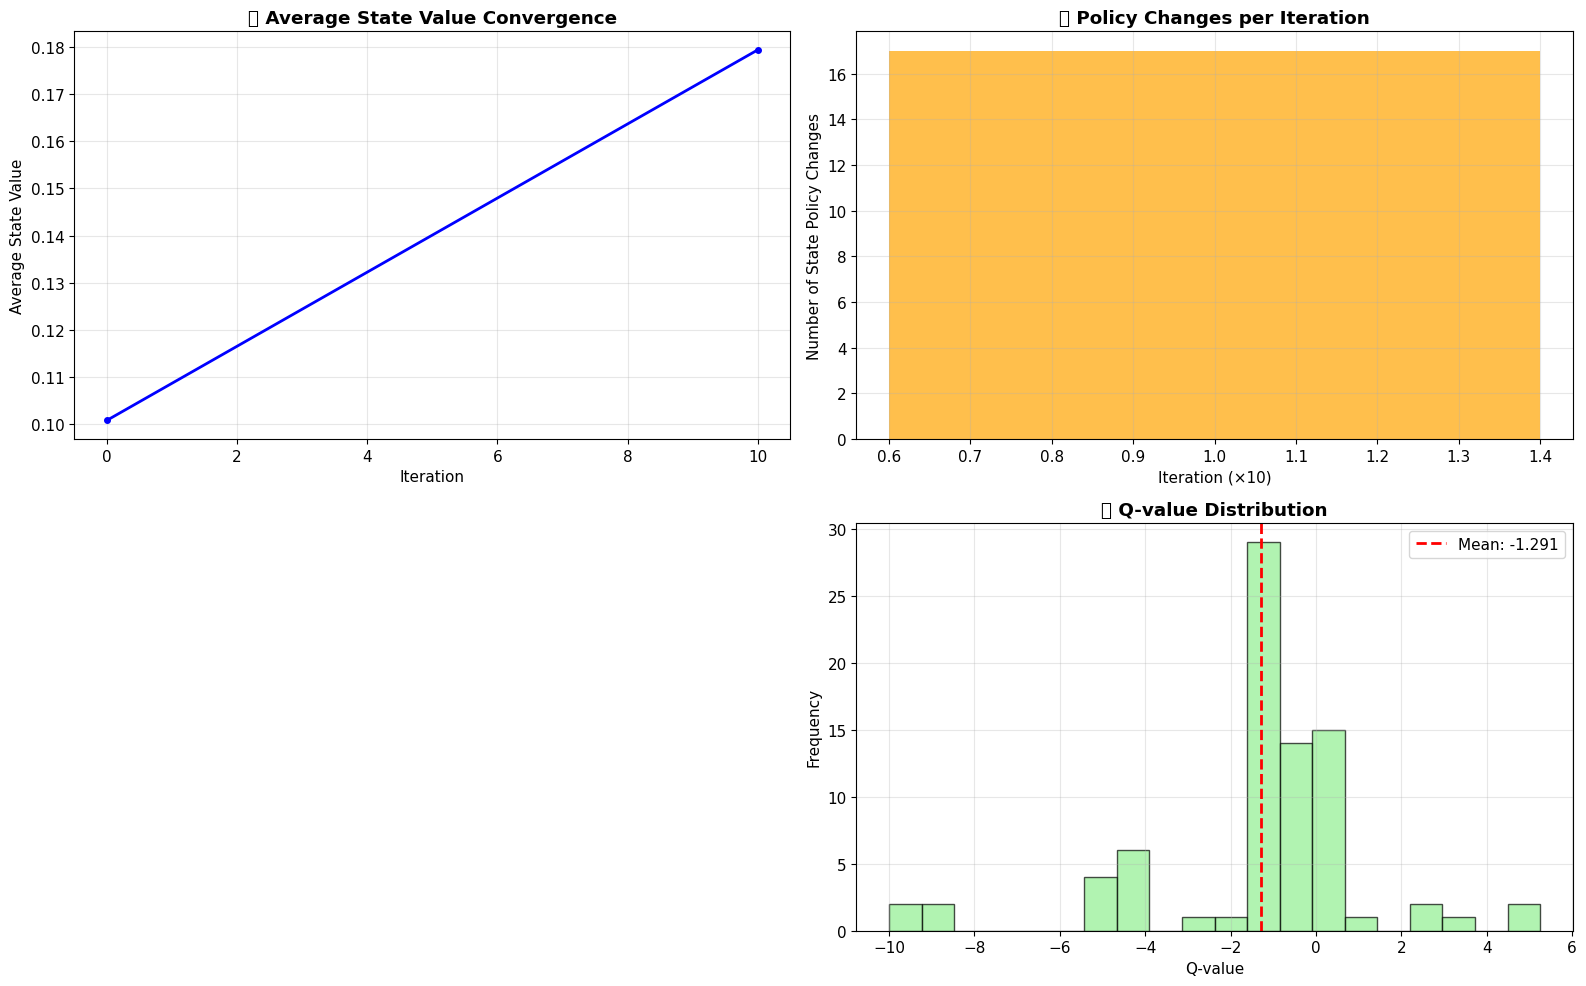


🎯 Final Learned Policy:


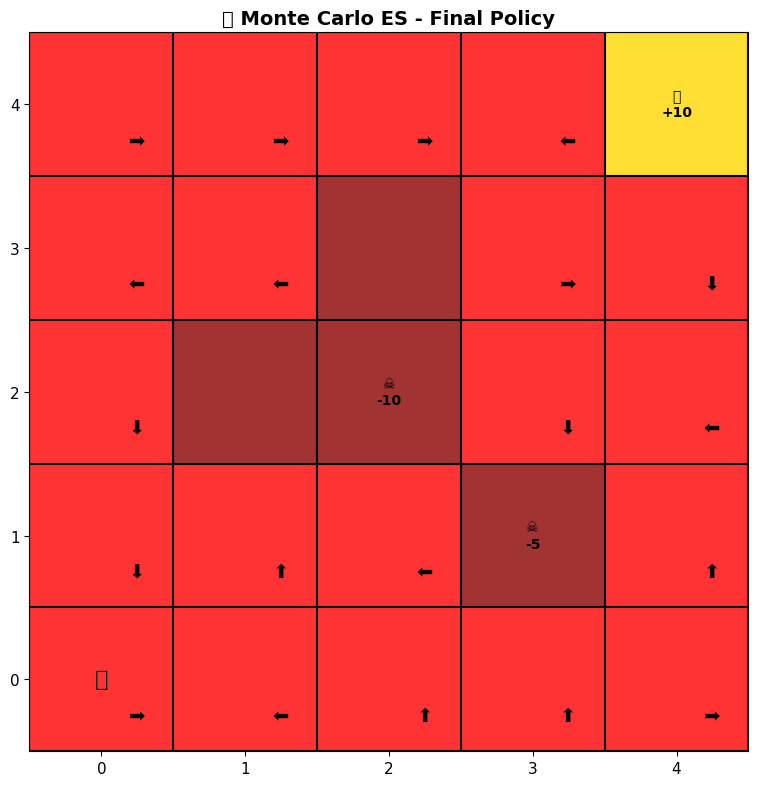


🏆 Monte Carlo Control completed!
   Final policy learned with 12 iterations
   Average Q-value: -1.2914


In [16]:
  class MonteCarloControl:
      """
      Monte Carlo Control implementation for finding optimal policies
      """

      def __init__(self, env, gamma=0.9):
          self.env = env
          self.gamma = gamma

          # Initialize Q-values and policy
          self.q_values = {}
          self.returns = {}
          self.policy = {}

          # Initialize for all state-action pairs
          for state in env.states:
              self.q_values[state] = {}
              self.returns[state] = {}

              valid_actions = env.get_valid_actions(state)
              for action in valid_actions:
                  self.q_values[state][action] = np.random.normal(0, 0.1)
                  self.returns[state][action] = []

              # Initialize policy greedily
              if valid_actions:
                  self.policy[state] = np.random.choice(valid_actions)
              else:
                  self.policy[state] = None

          # Statistics tracking
          self.iteration_count = 0
          self.policy_history = []
          self.value_history = []

      def monte_carlo_es(self, num_iterations=100, verbose=True):
          """
          Monte Carlo Control with Exploring Starts

          Algorithm:
          1. Generate episode with exploring starts
          2. Update Q-values using returns
          3. Improve policy greedily
          4. Repeat until convergence
          """

          if verbose:
              print("🚀 MONTE CARLO CONTROL WITH EXPLORING STARTS")
              print("=" * 55)
              print(f"   Iterations: {num_iterations}")
              print(f"   Discount factor: {self.gamma}")
              print()

          for iteration in tqdm(range(num_iterations), disable=not verbose, desc="Iterations"):
              # Step 1: Generate episode with exploring starts
              episode = self._generate_episode_exploring_starts()

              # Step 2: Update Q-values
              self._update_q_values_from_episode(episode)

              # Step 3: Policy improvement
              policy_changed = self._improve_policy()

              # Track progress
              if iteration % 10 == 0:
                  self.policy_history.append(self.policy.copy())
                  avg_value = self._calculate_average_state_value()
                  self.value_history.append(avg_value)

                  if verbose and iteration % 20 == 0:
                      print(f"   Iteration {iteration}: Avg state value = {avg_value:.4f}")

              # Early stopping if policy stable
              if not policy_changed and iteration > 10:
                  if verbose:
                      print(f"   ✅ Policy converged at iteration {iteration}!")
                  break

          self.iteration_count = iteration + 1

          if verbose:
              print(f"\n🏆 FINAL RESULTS:")
              print(f"   Total iterations: {self.iteration_count}")
              print(f"   Final average state value: {self._calculate_average_state_value():.4f}")
              print(f"   Policy changes in last iteration: {'No' if not policy_changed else 'Yes'}")

          return self.policy.copy(), self.q_values

      def _generate_episode_exploring_starts(self):
          """Generate episode with exploring starts"""
          # Random initial state and action
          non_terminal_states = [s for s in self.env.states if s not in self.env.terminal_states]
          if not non_terminal_states:
              # Handle case where there are no non-terminal states (shouldn't happen in this env)
              return [] # Or raise an error, depending on desired behavior

          start_state = random.choice(non_terminal_states)
          valid_actions = self.env.get_valid_actions(start_state)

          if not valid_actions:
              # Handle case where there are no valid actions from the start state
              # This might happen if the environment setup is unusual
              return [] # Or choose a different start state

          start_action = random.choice(valid_actions)

          # Set environment to start state
          self.env.current_state = start_state

          # Take initial action
          next_state, reward, done, _ = self.env.step(start_action)
          episode = [(start_state, start_action, reward)]

          # Continue episode following current policy
          state = next_state
          for _ in range(1000):  # Max episode length
              if done or state in self.env.terminal_states:
                  break

              action = self.policy.get(state)
              if action is None:
                  # Handle states not in policy (e.g., if state was not visited yet)
                  valid_actions_current = self.env.get_valid_actions(state)
                  if valid_actions_current:
                      action = random.choice(valid_actions_current)
                  else:
                      break # No valid actions from this state

              next_state, reward, done, _ = self.env.step(action)
              episode.append((state, action, reward))
              state = next_state

          return episode


      def _update_q_values_from_episode(self, episode):
          """Update Q-values using first-visit MC"""
          visited_pairs = set()

          for t, (state, action, reward) in enumerate(episode):
              sa_pair = (state, action)

              if (sa_pair not in visited_pairs and
                  state in self.q_values and
                  action in self.q_values[state]):

                  visited_pairs.add(sa_pair)

                  # Calculate return
                  G = 0
                  for k, (_, _, future_reward) in enumerate(episode[t:]):
                      G += (self.gamma ** k) * future_reward

                  # Update Q-value
                  self.returns[state][action].append(G)
                  self.q_values[state][action] = np.mean(self.returns[state][action])

      def _improve_policy(self):
          """Improve policy greedily w.r.t. current Q-values"""
          policy_changed = False

          for state in self.env.states:
              if state in self.env.terminal_states:
                  continue

              if state in self.q_values and self.q_values[state]:
                  # Find best action
                  best_action = max(self.q_values[state].keys(),
                                  key=lambda a: self.q_values[state][a])

                  if self.policy[state] != best_action:
                      self.policy[state] = best_action
                      policy_changed = True

          return policy_changed

      def _calculate_average_state_value(self):
          """Calculate average state value under current policy"""
          total_value = 0
          count = 0

          for state in self.env.states:
              if state not in self.env.terminal_states and state in self.q_values:
                  action = self.policy.get(state)
                  if action and action in self.q_values[state]:
                      total_value += self.q_values[state][action]
                      count += 1

          return total_value / count if count > 0 else 0

      def visualize_learning_progress(self):
          """Visualize the learning progress"""

          if not self.value_history:
              print("No learning history to visualize")
              return

          fig, axes = plt.subplots(2, 2, figsize=(16, 10))

          # Plot 1: Value function convergence
          ax1 = axes[0, 0]
          iterations = np.arange(len(self.value_history)) * 10

          ax1.plot(iterations, self.value_history, 'b-', linewidth=2,
                  marker='o', markersize=4)
          ax1.set_title('📈 Average State Value Convergence', fontweight='bold')
          ax1.set_xlabel('Iteration')
          ax1.set_ylabel('Average State Value')
          ax1.grid(True, alpha=0.3)

          # Plot 2: Policy changes
          ax2 = axes[0, 1]
          if len(self.policy_history) > 1:
              policy_changes = []
              for i in range(1, len(self.policy_history)):
                  changes = sum(1 for state in self.env.states
                              if (self.policy_history[i].get(state) !=
                                  self.policy_history[i-1].get(state)))
                  policy_changes.append(changes)

              ax2.bar(range(1, len(self.policy_history)), policy_changes,
                     alpha=0.7, color='orange')
              ax2.set_title('🔄 Policy Changes per Iteration', fontweight='bold')
              ax2.set_xlabel('Iteration (×10)')
              ax2.set_ylabel('Number of State Policy Changes')
              ax2.grid(True, alpha=0.3)

          # Plot 3: Final policy visualization
          ax3 = axes[1, 0]
          ax3.axis('off')  # We'll use the environment's visualization

          # Plot 4: Q-value statistics
          ax4 = axes[1, 1]
          all_q_values = []
          for state_q in self.q_values.values():
              all_q_values.extend(state_q.values())

          if all_q_values:
              ax4.hist(all_q_values, bins=20, alpha=0.7, color='lightgreen',
                      edgecolor='black')
              ax4.set_title('📊 Q-value Distribution', fontweight='bold')
              ax4.set_xlabel('Q-value')
              ax4.set_ylabel('Frequency')
              ax4.grid(True, alpha=0.3)

              # Add statistics
              mean_q = np.mean(all_q_values)
              std_q = np.std(all_q_values)
              ax4.axvline(mean_q, color='red', linestyle='--', linewidth=2,
                         label=f'Mean: {mean_q:.3f}')
              ax4.legend()

          plt.tight_layout()
          plt.show()

          # Show final policy
          print("\n🎯 Final Learned Policy:")
          fig = self.env.visualize(policy=self.policy, title="Monte Carlo ES - Final Policy")
          plt.show()

  # Test Monte Carlo Control
  print("\n🧪 TESTING MONTE CARLO CONTROL")
  print("=" * 40)

  # Create MC control agent
  mc_control = MonteCarloControl(env, gamma=0.9)

  # Run Monte Carlo ES
  print("🚀 Running Monte Carlo ES...")
  optimal_policy, optimal_q_values = mc_control.monte_carlo_es(
      num_iterations=150, verbose=True
  )

  # Visualize learning progress
  mc_control.visualize_learning_progress()

  print("\n🏆 Monte Carlo Control completed!")
  print(f"   Final policy learned with {mc_control.iteration_count} iterations")
  print(f"   Average Q-value: {np.mean([q for state_q in optimal_q_values.values() for q in state_q.values()]):.4f}")

  # 🎲 Part 4: Monte Carlo Control without Exploring Starts

  **Problem**: Exploring Starts assumption is often impractical in real environments.

  **Solution**: Use ε-greedy policies that maintain exploration throughout learning.


🎲 PART 4: MONTE CARLO CONTROL WITHOUT EXPLORING STARTS


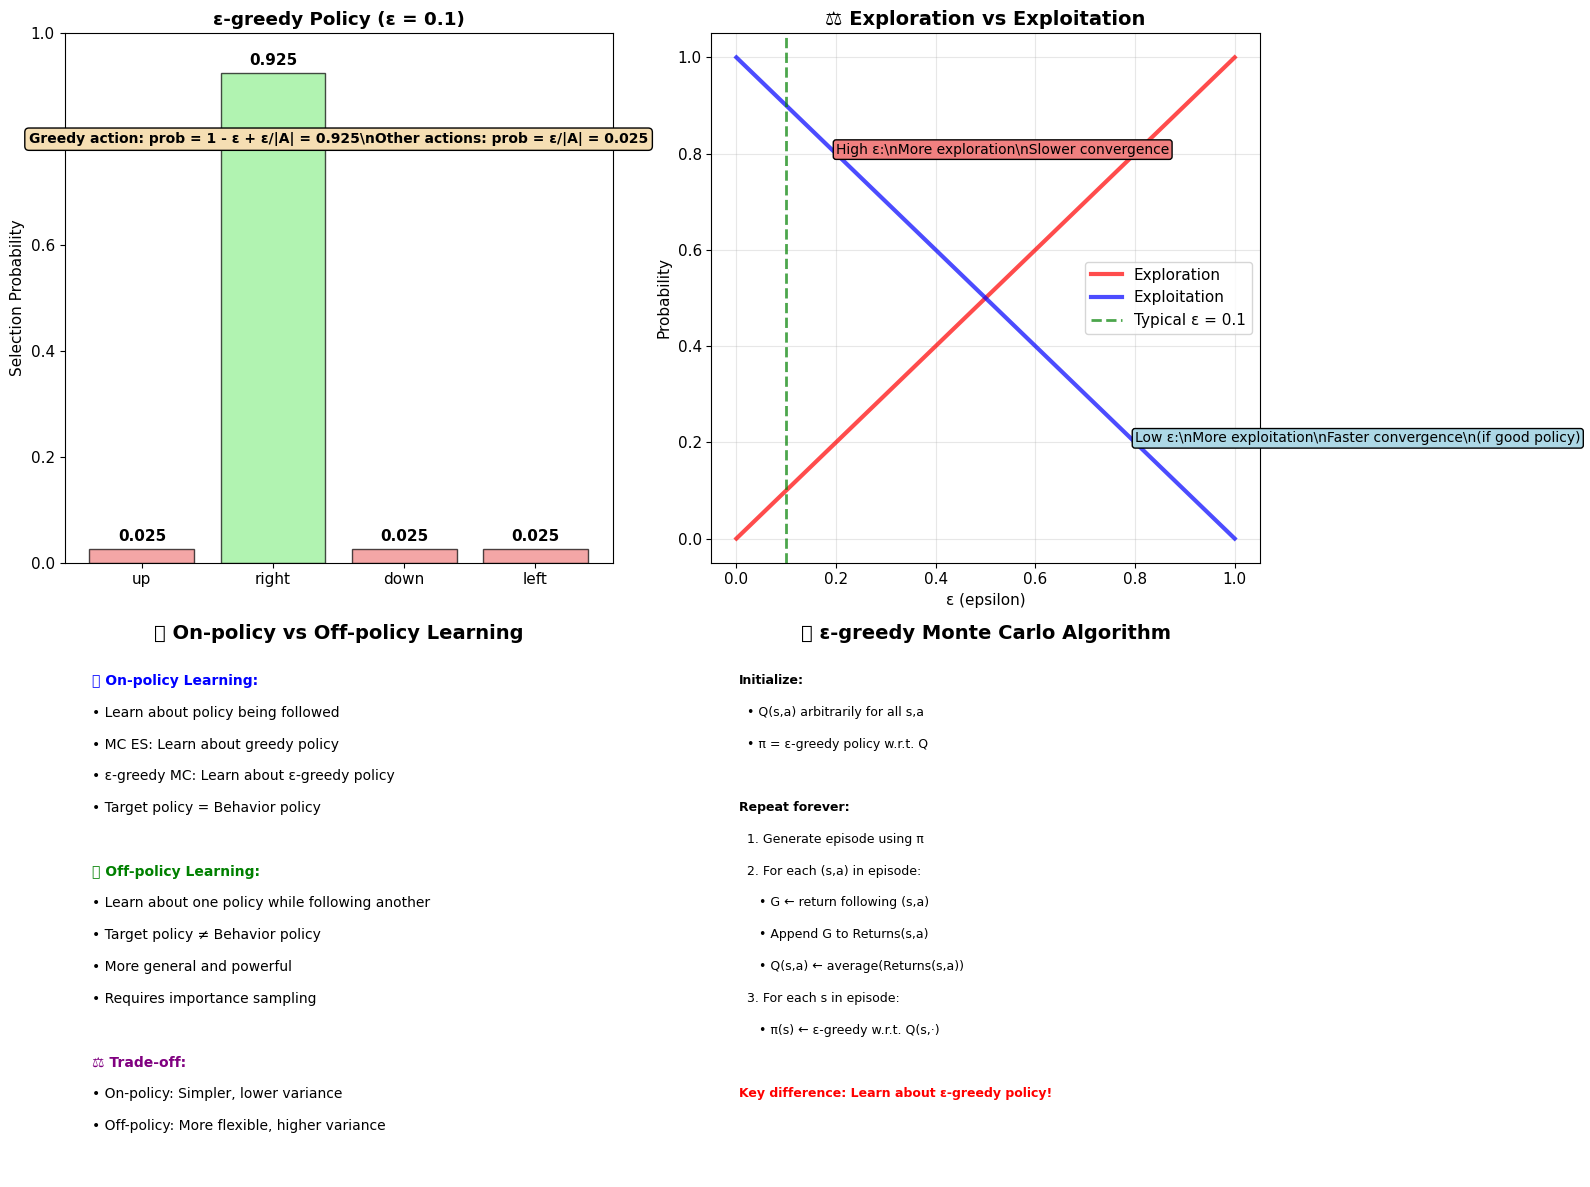

In [17]:
  # ================================
  # 🎲 Part 4: Monte Carlo Control without Exploring Starts
  # ================================

  print("\n🎲 PART 4: MONTE CARLO CONTROL WITHOUT EXPLORING STARTS")
  print("=" * 65)

  def create_epsilon_greedy_theory():
      """Visual explanation of ε-greedy policies"""

      fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

      # Diagram 1: ε-greedy Policy
      ax1.set_title('🎲 ε-greedy Policy', fontsize=14, fontweight='bold')

      # Show action selection probability
      epsilon = 0.1
      num_actions = 4
      greedy_prob = 1 - epsilon + epsilon/num_actions
      random_prob = epsilon/num_actions

      actions = ['up', 'right', 'down', 'left']
      probabilities = [random_prob, greedy_prob, random_prob, random_prob]  # 'right' is greedy
      colors = ['lightcoral' if p == random_prob else 'lightgreen' for p in probabilities]

      bars = ax1.bar(actions, probabilities, color=colors, alpha=0.7, edgecolor='black')

      # Add probability labels
      for bar, prob in zip(bars, probabilities):
          height = bar.get_height()
          ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                  f'{prob:.3f}', ha='center', va='bottom', fontweight='bold')

      ax1.set_title(f'ε-greedy Policy (ε = {epsilon})', fontweight='bold')
      ax1.set_ylabel('Selection Probability')
      ax1.set_ylim(0, 1)

      # Add annotations
      ax1.text(0.5, 0.8, f'Greedy action: prob = 1 - ε + ε/|A| = {greedy_prob:.3f}\\n'
                        f'Other actions: prob = ε/|A| = {random_prob:.3f}',
               transform=ax1.transAxes, ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", facecolor='wheat'), fontweight='bold')

      # Diagram 2: Exploration vs Exploitation
      ax2.set_title('⚖️ Exploration vs Exploitation', fontsize=14, fontweight='bold')

      # Show the trade-off
      epsilons = np.linspace(0, 1, 100)
      exploration = epsilons
      exploitation = 1 - epsilons

      ax2.plot(epsilons, exploration, 'r-', linewidth=3, label='Exploration', alpha=0.7)
      ax2.plot(epsilons, exploitation, 'b-', linewidth=3, label='Exploitation', alpha=0.7)

      ax2.axvline(x=0.1, color='green', linestyle='--', linewidth=2, alpha=0.7,
                 label='Typical ε = 0.1')

      ax2.set_xlabel('ε (epsilon)')
      ax2.set_ylabel('Probability')
      ax2.legend()
      ax2.grid(True, alpha=0.3)

      # Add annotations
      ax2.text(0.2, 0.8, 'High ε:\\nMore exploration\\nSlower convergence',
               fontsize=10, bbox=dict(boxstyle="round,pad=0.2", facecolor='lightcoral'))

      ax2.text(0.8, 0.2, 'Low ε:\\nMore exploitation\\nFaster convergence\\n(if good policy)',
               fontsize=10, bbox=dict(boxstyle="round,pad=0.2", facecolor='lightblue'))

      # Diagram 3: On-policy vs Off-policy
      ax3.set_title('🎯 On-policy vs Off-policy Learning', fontsize=14, fontweight='bold')

      comparison_text = [
          '🎯 On-policy Learning:',
          '• Learn about policy being followed',
          '• MC ES: Learn about greedy policy',
          '• ε-greedy MC: Learn about ε-greedy policy',
          '• Target policy = Behavior policy',
          '',
          '🔄 Off-policy Learning:',
          '• Learn about one policy while following another',
          '• Target policy ≠ Behavior policy',
          '• More general and powerful',
          '• Requires importance sampling',
          '',
          '⚖️ Trade-off:',
          '• On-policy: Simpler, lower variance',
          '• Off-policy: More flexible, higher variance'
      ]

      y_pos = 0.95
      for line in comparison_text:
          if line:
              color = 'blue' if '🎯' in line else 'green' if '🔄' in line else 'purple' if '⚖️' in line else 'black'
              fontweight = 'bold' if any(c in line for c in ['🎯', '🔄', '⚖️']) else 'normal'
              ax3.text(0.05, y_pos, line, ha='left', va='top', fontsize=10,
                      fontweight=fontweight, color=color)
          y_pos -= 0.06

      ax3.set_xlim(0, 1)
      ax3.set_ylim(0, 1)
      ax3.axis('off')

      # Diagram 4: ε-greedy MC Algorithm
      ax4.set_title('🔄 ε-greedy Monte Carlo Algorithm', fontsize=14, fontweight='bold')

      algorithm_steps = [
          'Initialize:',
          '  • Q(s,a) arbitrarily for all s,a',
          '  • π = ε-greedy policy w.r.t. Q',
          '',
          'Repeat forever:',
          '  1. Generate episode using π',
          '  2. For each (s,a) in episode:',
          '     • G ← return following (s,a)',
          '     • Append G to Returns(s,a)',
          '     • Q(s,a) ← average(Returns(s,a))',
          '  3. For each s in episode:',
          '     • π(s) ← ε-greedy w.r.t. Q(s,·)',
          '',
          'Key difference: Learn about ε-greedy policy!'
      ]

      y_pos = 0.95
      for line in algorithm_steps:
          if line:
              fontweight = 'bold' if any(phrase in line for phrase in ['Initialize:', 'Repeat', 'Key']) else 'normal'
              color = 'red' if 'Key difference' in line else 'black'
              ax4.text(0.05, y_pos, line, ha='left', va='top', fontsize=9,
                      fontweight=fontweight, color=color)
          y_pos -= 0.06

      ax4.set_xlim(0, 1)
      ax4.set_ylim(0, 1)
      ax4.axis('off')

      plt.tight_layout()
      return fig

  epsilon_greedy_theory_fig = create_epsilon_greedy_theory()
  plt.show()


🧪 TESTING ε-GREEDY MONTE CARLO CONTROL
🎲 Running ε-greedy MC Control...
🎲 ON-POLICY MONTE CARLO CONTROL (ε-greedy)
   Episodes: 8000
   Initial ε: 0.3
   ε decay: True
   Discount factor: 0.9



Episodes:   0%|          | 0/8000 [00:00<?, ?it/s]

   Episode 0: Avg value = 0.0804, ε = 0.3000
   Episode 1000: Avg value = 4.5632, ε = 0.0100
   Episode 2000: Avg value = 5.1018, ε = 0.0100
   Episode 3000: Avg value = 5.1482, ε = 0.0100
   Episode 4000: Avg value = 5.1667, ε = 0.0100
   Episode 5000: Avg value = 5.1074, ε = 0.0100
   Episode 6000: Avg value = 5.1234, ε = 0.0100
   Episode 7000: Avg value = 5.1188, ε = 0.0100

✅ Completed 8000 episodes!
   Final ε: 0.0100
   Final average value: 5.1269


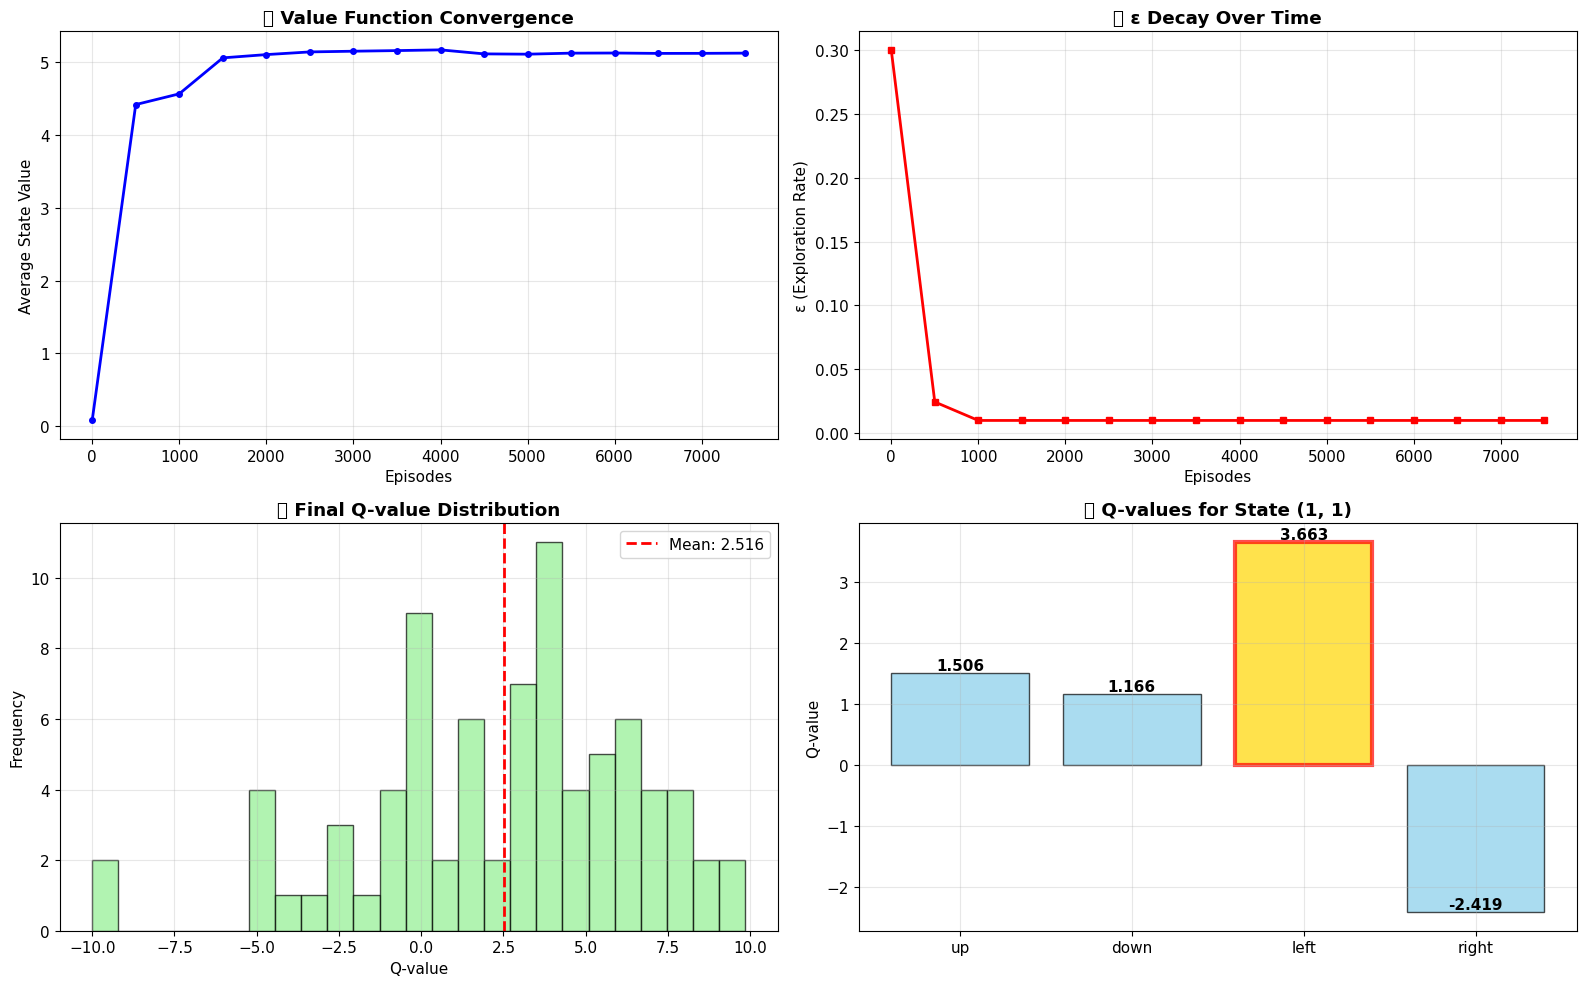


🎯 Final Greedy Policy:


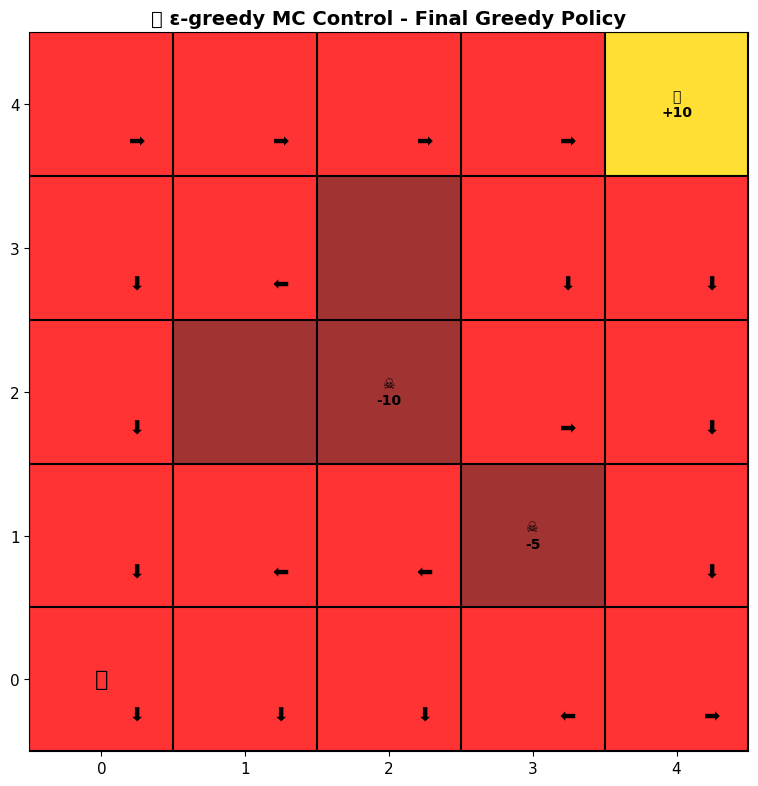


📊 COMPARISON: MC ES vs ε-greedy MC
MC ES (Exploring Starts):
   + Learns optimal policy directly
   + Lower variance estimates
   - Requires unrealistic assumption

ε-greedy MC (No Exploring Starts):
   + More practical assumption
   + Works in real environments
   - Learns suboptimal ε-greedy policy
   - Higher variance due to exploration


In [18]:

  class EpsilonGreedyMC:
      """
      Monte Carlo Control with ε-greedy policies (no exploring starts)
      """

      def __init__(self, env, gamma=0.9, epsilon=0.1):
          self.env = env
          self.gamma = gamma
          self.epsilon = epsilon

          # Initialize Q-values
          self.q_values = {}
          self.returns = {}

          for state in env.states:
              self.q_values[state] = {}
              self.returns[state] = {}
              for action in env.get_valid_actions(state):
                  self.q_values[state][action] = np.random.normal(0, 0.1)
                  self.returns[state][action] = []

          # Statistics
          self.episode_count = 0
          self.value_history = []
          self.epsilon_history = []

      def epsilon_greedy_policy(self, state):
          """
          ε-greedy policy based on current Q-values
          """
          if state in self.env.terminal_states:
              return None

          valid_actions = self.env.get_valid_actions(state)
          if not valid_actions:
              return None

          if state not in self.q_values or not self.q_values[state]:
              return np.random.choice(valid_actions)

          # ε-greedy action selection
          if np.random.random() < self.epsilon:
              # Explore: random action
              return np.random.choice(valid_actions)
          else:
              # Exploit: greedy action
              available_actions = [a for a in valid_actions if a in self.q_values[state]]
              if available_actions:
                  return max(available_actions, key=lambda a: self.q_values[state][a])
              else:
                  return np.random.choice(valid_actions)

      def on_policy_mc_control(self, num_episodes=5000, epsilon_decay=True, verbose=True):
          """
          On-policy Monte Carlo Control with ε-greedy policy

          Args:
              num_episodes: Number of episodes to run
              epsilon_decay: Whether to decay epsilon over time
              verbose: Print progress
          """

          if verbose:
              print("🎲 ON-POLICY MONTE CARLO CONTROL (ε-greedy)")
              print("=" * 55)
              print(f"   Episodes: {num_episodes}")
              print(f"   Initial ε: {self.epsilon}")
              print(f"   ε decay: {epsilon_decay}")
              print(f"   Discount factor: {self.gamma}")
              print()

          initial_epsilon = self.epsilon

          for episode_num in tqdm(range(num_episodes), disable=not verbose, desc="Episodes"):
              # Decay epsilon
              if epsilon_decay:
                  self.epsilon = initial_epsilon * (0.995 ** episode_num)
                  self.epsilon = max(self.epsilon, 0.01)  # Minimum exploration

              # Generate episode using current ε-greedy policy
              episode = self.env.generate_episode(self.epsilon_greedy_policy)

              # Update Q-values
              self._update_q_values(episode)

              # Track progress
              if episode_num % 500 == 0:
                  avg_value = self._calculate_average_value()
                  self.value_history.append(avg_value)
                  self.epsilon_history.append(self.epsilon)

                  if verbose and episode_num % 1000 == 0:
                      print(f"   Episode {episode_num}: Avg value = {avg_value:.4f}, ε = {self.epsilon:.4f}")

          self.episode_count = num_episodes

          if verbose:
              print(f"\n✅ Completed {num_episodes} episodes!")
              print(f"   Final ε: {self.epsilon:.4f}")
              print(f"   Final average value: {self._calculate_average_value():.4f}")

          return self.get_greedy_policy(), self.q_values

      def _update_q_values(self, episode):
          """Update Q-values using first-visit MC"""
          visited_pairs = set()

          for t, (state, action, reward) in enumerate(episode):
              sa_pair = (state, action)

              if (sa_pair not in visited_pairs and
                  state in self.q_values and
                  action in self.q_values[state]):

                  visited_pairs.add(sa_pair)

                  # Calculate return
                  G = 0
                  for k, (_, _, future_reward) in enumerate(episode[t:]):
                      G += (self.gamma ** k) * future_reward

                  # Update Q-value
                  self.returns[state][action].append(G)
                  self.q_values[state][action] = np.mean(self.returns[state][action])

      def _calculate_average_value(self):
          """Calculate average state value under greedy policy"""
          total_value = 0
          count = 0

          for state in self.env.states:
              if state not in self.env.terminal_states and state in self.q_values:
                  if self.q_values[state]:
                      max_q = max(self.q_values[state].values())
                      total_value += max_q
                      count += 1

          return total_value / count if count > 0 else 0

      def get_greedy_policy(self):
          """Extract greedy policy from Q-values"""
          policy = {}

          for state in self.env.states:
              if state in self.env.terminal_states:
                  policy[state] = None
              elif state in self.q_values and self.q_values[state]:
                  best_action = max(self.q_values[state].keys(),
                                  key=lambda a: self.q_values[state][a])
                  policy[state] = best_action
              else:
                  valid_actions = self.env.get_valid_actions(state)
                  policy[state] = np.random.choice(valid_actions) if valid_actions else None

          return policy

      def visualize_learning(self):
          """Visualize the learning process"""

          if not self.value_history:
              print("No learning history to visualize")
              return

          fig, axes = plt.subplots(2, 2, figsize=(16, 10))

          # Plot 1: Value convergence
          ax1 = axes[0, 0]
          episodes = np.arange(len(self.value_history)) * 500

          ax1.plot(episodes, self.value_history, 'b-', linewidth=2, marker='o', markersize=4)
          ax1.set_title('📈 Value Function Convergence', fontweight='bold')
          ax1.set_xlabel('Episodes')
          ax1.set_ylabel('Average State Value')
          ax1.grid(True, alpha=0.3)

          # Plot 2: Epsilon decay
          ax2 = axes[0, 1]
          if self.epsilon_history:
              ax2.plot(episodes, self.epsilon_history, 'r-', linewidth=2, marker='s', markersize=4)
              ax2.set_title('📉 ε Decay Over Time', fontweight='bold')
              ax2.set_xlabel('Episodes')
              ax2.set_ylabel('ε (Exploration Rate)')
              ax2.grid(True, alpha=0.3)

          # Plot 3: Q-value distribution
          ax3 = axes[1, 0]
          all_q_values = []
          for state_q in self.q_values.values():
              all_q_values.extend(state_q.values())

          if all_q_values:
              ax3.hist(all_q_values, bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
              ax3.set_title('📊 Final Q-value Distribution', fontweight='bold')
              ax3.set_xlabel('Q-value')
              ax3.set_ylabel('Frequency')
              ax3.grid(True, alpha=0.3)

              # Add statistics
              mean_q = np.mean(all_q_values)
              ax3.axvline(mean_q, color='red', linestyle='--', linewidth=2,
                         label=f'Mean: {mean_q:.3f}')
              ax3.legend()

          # Plot 4: Action preferences for sample state
          ax4 = axes[1, 1]
          sample_state = (1, 1)
          if sample_state in self.q_values and self.q_values[sample_state]:
              actions = list(self.q_values[sample_state].keys())
              q_vals = list(self.q_values[sample_state].values())

              bars = ax4.bar(actions, q_vals, alpha=0.7, color='skyblue', edgecolor='black')

              # Highlight best action
              if q_vals:
                  best_idx = np.argmax(q_vals)
                  bars[best_idx].set_color('gold')
                  bars[best_idx].set_edgecolor('red')
                  bars[best_idx].set_linewidth(3)

              ax4.set_title(f'🎯 Q-values for State {sample_state}', fontweight='bold')
              ax4.set_ylabel('Q-value')
              ax4.grid(True, alpha=0.3)

              # Add value labels
              for bar, q_val in zip(bars, q_vals):
                  height = bar.get_height()
                  ax4.text(bar.get_x() + bar.get_width()/2., height,
                          f'{q_val:.3f}', ha='center', va='bottom', fontweight='bold')

          plt.tight_layout()
          plt.show()

          # Show final policy
          print("\n🎯 Final Greedy Policy:")
          greedy_policy = self.get_greedy_policy()
          fig = self.env.visualize(policy=greedy_policy,
                                  title="ε-greedy MC Control - Final Greedy Policy")
          plt.show()

  # Test ε-greedy Monte Carlo Control
  print("\n🧪 TESTING ε-GREEDY MONTE CARLO CONTROL")
  print("=" * 50)

  # Create ε-greedy MC agent
  epsilon_greedy_mc = EpsilonGreedyMC(env, gamma=0.9, epsilon=0.3)

  # Run on-policy MC control
  print("🎲 Running ε-greedy MC Control...")
  greedy_policy, q_values = epsilon_greedy_mc.on_policy_mc_control(
      num_episodes=8000, epsilon_decay=True, verbose=True
  )

  # Visualize learning
  epsilon_greedy_mc.visualize_learning()

  print("\n📊 COMPARISON: MC ES vs ε-greedy MC")
  print("=" * 45)
  print("MC ES (Exploring Starts):")
  print("   + Learns optimal policy directly")
  print("   + Lower variance estimates")
  print("   - Requires unrealistic assumption")
  print("")
  print("ε-greedy MC (No Exploring Starts):")
  print("   + More practical assumption")
  print("   + Works in real environments")
  print("   - Learns suboptimal ε-greedy policy")
  print("   - Higher variance due to exploration")

  # ⚖️ Part 5: Off-policy Prediction via Importance Sampling

  **Revolutionary Idea**: Learn about one policy (target) while following another (behavior)!

  **Challenge**: Episodes generated by behavior policy have wrong probabilities for target policy.

  **Solution**: Importance Sampling - reweight episodes to correct for different policy probabilities.


⚖️ PART 5: OFF-POLICY PREDICTION VIA IMPORTANCE SAMPLING


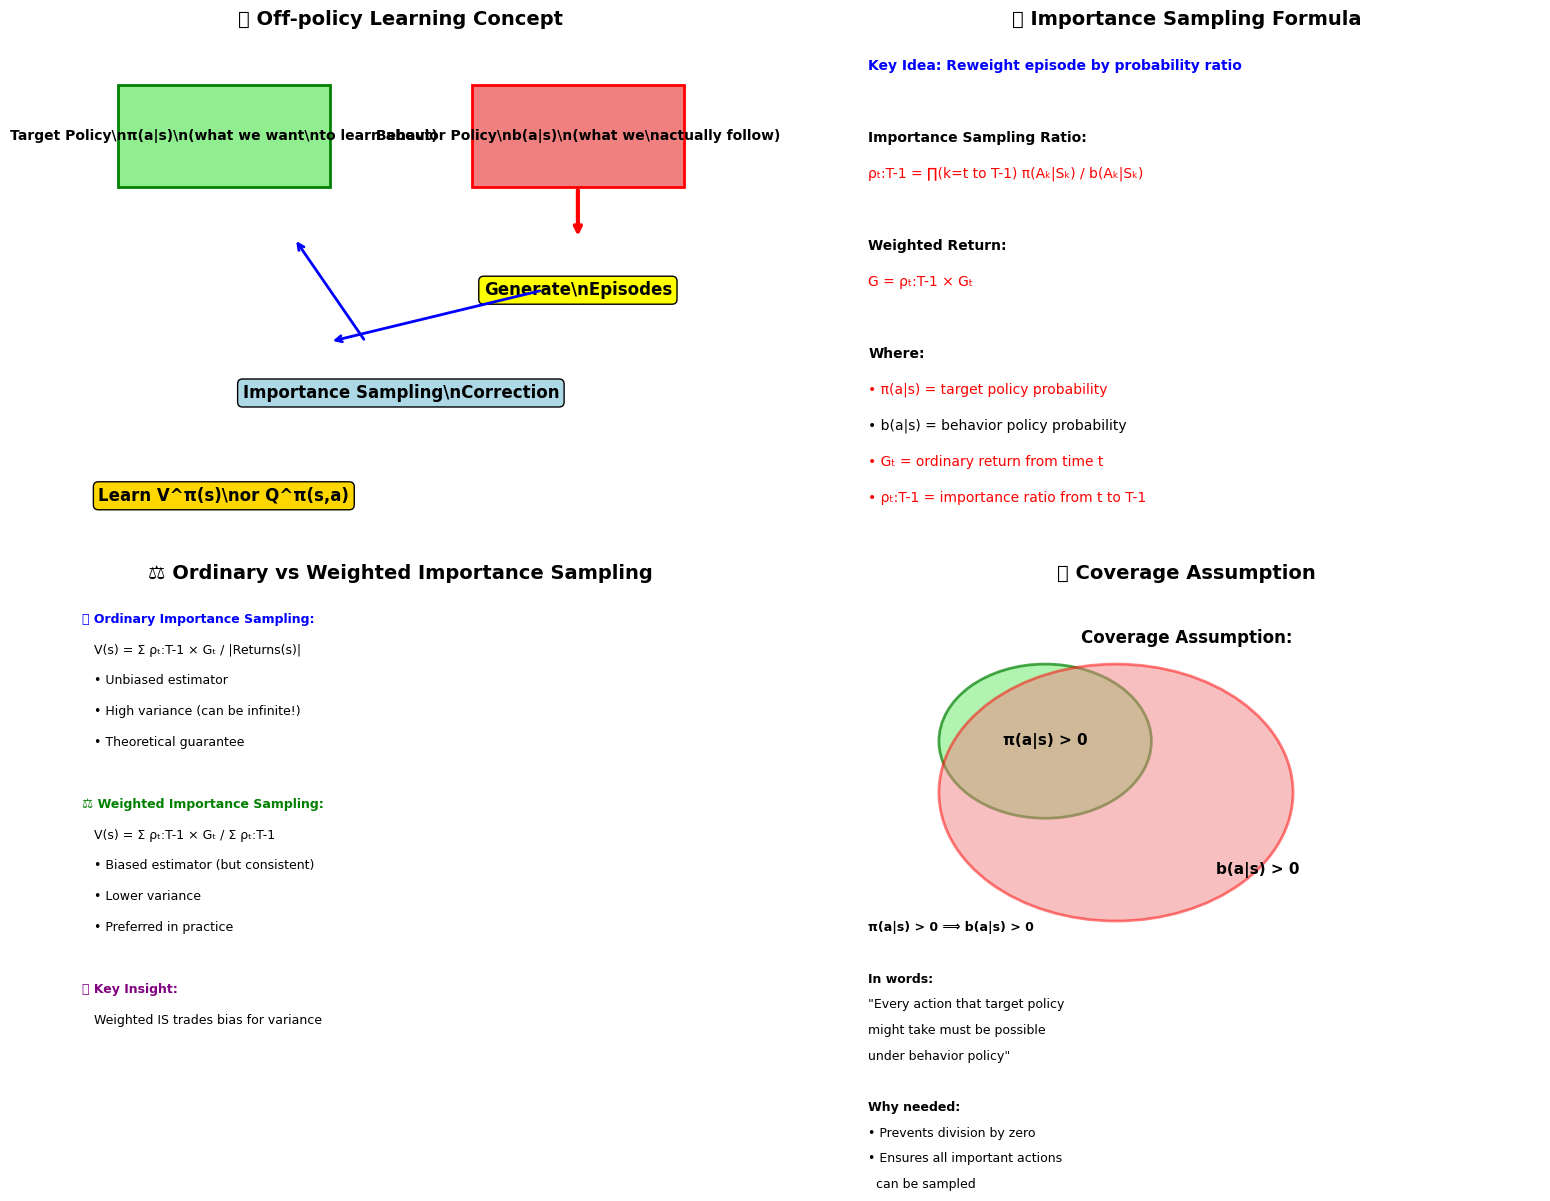

In [19]:
  # ================================
  # ⚖️ Part 5: Off-policy Prediction via Importance Sampling
  # ================================

  print("\n⚖️ PART 5: OFF-POLICY PREDICTION VIA IMPORTANCE SAMPLING")
  print("=" * 70)

  def create_importance_sampling_theory():
      """Visual explanation of importance sampling"""

      fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

      # Diagram 1: Off-policy Learning Concept
      ax1.set_title('🎯 Off-policy Learning Concept', fontsize=14, fontweight='bold')

      # Target policy
      target_box = Rectangle((0.1, 0.7), 0.3, 0.2, facecolor='lightgreen',
                            edgecolor='green', linewidth=2)
      ax1.add_patch(target_box)
      ax1.text(0.25, 0.8, 'Target Policy\\nπ(a|s)\\n(what we want\\nto learn about)',
               ha='center', va='center', fontweight='bold', fontsize=10)

      # Behavior policy
      behavior_box = Rectangle((0.6, 0.7), 0.3, 0.2, facecolor='lightcoral',
                              edgecolor='red', linewidth=2)
      ax1.add_patch(behavior_box)
      ax1.text(0.75, 0.8, 'Behavior Policy\\nb(a|s)\\n(what we\\nactually follow)',
               ha='center', va='center', fontweight='bold', fontsize=10)

      # Episode generation
      ax1.text(0.75, 0.5, 'Generate\\nEpisodes', ha='center', va='center',
               fontsize=12, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow'))

      # Arrow from behavior to episodes
      ax1.annotate('', xy=(0.75, 0.6), xytext=(0.75, 0.7),
                  arrowprops=dict(arrowstyle='->', lw=3, color='red'))

      # Importance sampling correction
      ax1.text(0.5, 0.3, 'Importance Sampling\\nCorrection', ha='center', va='center',
               fontsize=12, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))

      # Arrows showing correction
      ax1.annotate('', xy=(0.4, 0.4), xytext=(0.7, 0.5),
                  arrowprops=dict(arrowstyle='->', lw=2, color='blue'))
      ax1.annotate('', xy=(0.35, 0.6), xytext=(0.45, 0.4),
                  arrowprops=dict(arrowstyle='->', lw=2, color='blue'))

      # Final result
      ax1.text(0.25, 0.1, 'Learn V^π(s)\\nor Q^π(s,a)', ha='center', va='center',
               fontsize=12, fontweight='bold',
               bbox=dict(boxstyle="round,pad=0.3", facecolor='gold'))

      ax1.set_xlim(0, 1)
      ax1.set_ylim(0, 1)
      ax1.axis('off')

      # Diagram 2: Importance Sampling Formula
      ax2.set_title('📊 Importance Sampling Formula', fontsize=14, fontweight='bold')

      formula_text = [
          'Key Idea: Reweight episode by probability ratio',
          '',
          'Importance Sampling Ratio:',
          'ρₜ:T-1 = ∏(k=t to T-1) π(Aₖ|Sₖ) / b(Aₖ|Sₖ)',
          '',
          'Weighted Return:',
          'G = ρₜ:T-1 × Gₜ',
          '',
          'Where:',
          '• π(a|s) = target policy probability',
          '• b(a|s) = behavior policy probability',
          '• Gₜ = ordinary return from time t',
          '• ρₜ:T-1 = importance ratio from t to T-1'
      ]

      y_pos = 0.95
      for line in formula_text:
          if line:
              fontweight = 'bold' if any(phrase in line for phrase in ['Key Idea:', 'Importance', 'Weighted', 'Where:']) else 'normal'
              color = 'blue' if 'Key Idea:' in line else 'red' if any(c in line for c in ['ρ', 'π', 'G']) else 'black'
              ax2.text(0.05, y_pos, line, ha='left', va='top', fontsize=10,
                      fontweight=fontweight, color=color)
          y_pos -= 0.07

      ax2.set_xlim(0, 1)
      ax2.set_ylim(0, 1)
      ax2.axis('off')

      # Diagram 3: Ordinary vs Weighted Importance Sampling
      ax3.set_title('⚖️ Ordinary vs Weighted Importance Sampling', fontsize=14, fontweight='bold')

      is_comparison = [
          '📊 Ordinary Importance Sampling:',
          '   V(s) = Σ ρₜ:T-1 × Gₜ / |Returns(s)|',
          '   • Unbiased estimator',
          '   • High variance (can be infinite!)',
          '   • Theoretical guarantee',
          '',
          '⚖️ Weighted Importance Sampling:',
          '   V(s) = Σ ρₜ:T-1 × Gₜ / Σ ρₜ:T-1',
          '   • Biased estimator (but consistent)',
          '   • Lower variance',
          '   • Preferred in practice',
          '',
          '🎯 Key Insight:',
          '   Weighted IS trades bias for variance'
      ]

      y_pos = 0.95
      for line in is_comparison:
          if line:
              color = 'blue' if '📊' in line else 'green' if '⚖️' in line else 'purple' if '🎯' in line else 'black'
              fontweight = 'bold' if any(c in line for c in ['📊', '⚖️', '🎯']) else 'normal'
              ax3.text(0.05, y_pos, line, ha='left', va='top', fontsize=9,
                      fontweight=fontweight, color=color)
          y_pos -= 0.06

      ax3.set_xlim(0, 1)
      ax3.set_ylim(0, 1)
      ax3.axis('off')

      # Diagram 4: Coverage Assumption
      ax4.set_title('🔍 Coverage Assumption', fontsize=14, fontweight='bold')

      # Visualization of coverage
      # Target policy support
      target_circle = Circle((0.3, 0.7), 0.15, facecolor='lightgreen', alpha=0.7,
                            edgecolor='green', linewidth=2)
      ax4.add_patch(target_circle)
      ax4.text(0.3, 0.7, 'π(a|s) > 0', ha='center', va='center', fontweight='bold')

      # Behavior policy support (larger)
      behavior_circle = Circle((0.4, 0.6), 0.25, facecolor='lightcoral', alpha=0.5,
                              edgecolor='red', linewidth=2)
      ax4.add_patch(behavior_circle)
      ax4.text(0.6, 0.45, 'b(a|s) > 0', ha='center', va='center', fontweight='bold')

      ax4.text(0.5, 0.9, 'Coverage Assumption:', ha='center', va='center',
               fontsize=12, fontweight='bold')

      coverage_text = [
          'π(a|s) > 0 ⟹ b(a|s) > 0',
          '',
          'In words:',
          '"Every action that target policy',
          'might take must be possible',
          'under behavior policy"',
          '',
          'Why needed:',
          '• Prevents division by zero',
          '• Ensures all important actions',
          '  can be sampled'
      ]

      y_pos = 0.35
      for line in coverage_text:
          if line:
              fontweight = 'bold' if line in ['π(a|s) > 0 ⟹ b(a|s) > 0', 'In words:', 'Why needed:'] else 'normal'
              ax4.text(0.05, y_pos, line, ha='left', va='top', fontsize=9, fontweight=fontweight)
          y_pos -= 0.05

      ax4.set_xlim(0, 1)
      ax4.set_ylim(0, 1)
      ax4.axis('off')

      plt.tight_layout()
      return fig

  importance_sampling_theory_fig = create_importance_sampling_theory()
  plt.show()

In [20]:
  class OffPolicyMC:
      """
      Off-policy Monte Carlo prediction using importance sampling
      """

      def __init__(self, env, gamma=0.9):
          self.env = env
          self.gamma = gamma

          # Value estimates
          self.values = {state: 0.0 for state in env.states}

          # For ordinary importance sampling
          self.ordinary_returns = {state: [] for state in env.states}
          self.ordinary_weights = {state: [] for state in env.states}

          # For weighted importance sampling
          self.weighted_numerator = {state: 0.0 for state in env.states}
          self.weighted_denominator = {state: 0.0 for state in env.states}

          # Statistics
          self.episode_count = 0
          self.importance_ratios = []

      def off_policy_prediction(self, target_policy, behavior_policy,
                              num_episodes=5000, method='weighted', verbose=True):
          """
          Off-policy Monte Carlo prediction using importance sampling

          Args:
              target_policy: Policy to learn about (function or dict)
              behavior_policy: Policy to generate episodes (function or dict)
              num_episodes: Number of episodes to generate
              method: 'ordinary' or 'weighted' importance sampling
              verbose: Print progress
          """

          if verbose:
              print(f"⚖️ OFF-POLICY MC PREDICTION ({method.upper()} IMPORTANCE SAMPLING)")
              print("=" * 70)
              print(f"   Episodes: {num_episodes}")
              print(f"   Method: {method}")
              print(f"   Discount factor: {self.gamma}")
              print()

          for episode_num in tqdm(range(num_episodes), disable=not verbose, desc="Episodes"):
              # Generate episode using behavior policy
              episode = self.env.generate_episode(behavior_policy)

              # Process episode for importance sampling
              self._process_episode_importance_sampling(
                  episode, target_policy, behavior_policy, method
              )

              # Progress reporting
              if verbose and episode_num % 1000 == 0 and episode_num > 0:
                  avg_ratio = np.mean(self.importance_ratios[-1000:]) if self.importance_ratios else 0
                  sample_value = self.values[self.env.start_state]
                  print(f"   Episode {episode_num}: Start state value = {sample_value:.4f}, "
                        f"Avg importance ratio = {avg_ratio:.4f}")

          self.episode_count = num_episodes

          if verbose:
              print(f"\n✅ Completed {num_episodes} episodes!")
              print(f"   Final start state value: {self.values[self.env.start_state]:.4f}")
              print(f"   Average importance ratio: {np.mean(self.importance_ratios):.4f}")
              if self.importance_ratios:
                  print(f"   Max importance ratio: {max(self.importance_ratios):.4f}")
                  print(f"   Min importance ratio: {min(self.importance_ratios):.4f}")

          return self.values.copy()

      def _process_episode_importance_sampling(self, episode, target_policy,
                                             behavior_policy, method):
          """Process episode with importance sampling"""

          # Calculate importance sampling ratios for each step
          episode_ratios = []
          cumulative_ratio = 1.0

          for t, (state, action, reward) in enumerate(episode):
              # Get policy probabilities
              target_prob = self._get_action_probability(target_policy, state, action)
              behavior_prob = self._get_action_probability(behavior_policy, state, action)

              # Coverage assumption check
              if behavior_prob == 0:
                  if target_prob > 0:
                      # Coverage assumption violated
                      return  # Skip this episode
                  else:
                      ratio = 1.0  # Both probabilities are 0
              else:
                  ratio = target_prob / behavior_prob

              episode_ratios.append(ratio)
              cumulative_ratio *= ratio

          # Update value estimates using first-visit MC with importance sampling
          visited_states = set()

          for t, (state, action, reward) in enumerate(episode):
              if state not in visited_states:
                  visited_states.add(state)

                  # Calculate return from this point
                  G = 0
                  for k, (_, _, future_reward) in enumerate(episode[t:]):
                      G += (self.gamma ** k) * future_reward

                  # Calculate importance ratio from t to end
                  importance_ratio = 1.0
                  for k in range(t, len(episode_ratios)):
                      importance_ratio *= episode_ratios[k]

                  # Update based on method
                  if method == 'ordinary':
                      self._update_ordinary_importance_sampling(state, G, importance_ratio)
                  elif method == 'weighted':
                      self._update_weighted_importance_sampling(state, G, importance_ratio)

                  # Track importance ratios for statistics
                  if t == 0:  # Only track for start state
                      self.importance_ratios.append(importance_ratio)

      def _get_action_probability(self, policy, state, action):
          """Get probability of action under policy"""
          if callable(policy):
              # For deterministic policies, assume prob = 1 for chosen action, 0 otherwise
              chosen_action = policy(state)
              return 1.0 if action == chosen_action else 0.0
          elif isinstance(policy, dict):
              # For stochastic policies stored as probability distributions
              if state in policy and isinstance(policy[state], dict):
                  return policy[state].get(action, 0.0)
              else:
                  # Deterministic policy stored as state -> action mapping
                  chosen_action = policy.get(state)
                  return 1.0 if action == chosen_action else 0.0
          else:
              return 0.0

      def _update_ordinary_importance_sampling(self, state, return_value, importance_ratio):
          """Update using ordinary importance sampling"""
          weighted_return = importance_ratio * return_value
          self.ordinary_returns[state].append(weighted_return)

          # Simple average
          if self.ordinary_returns[state]:
              self.values[state] = np.mean(self.ordinary_returns[state])

      def _update_weighted_importance_sampling(self, state, return_value, importance_ratio):
          """Update using weighted importance sampling"""
          self.weighted_numerator[state] += importance_ratio * return_value
          self.weighted_denominator[state] += importance_ratio

          # Weighted average
          if self.weighted_denominator[state] > 0:
              self.values[state] = (self.weighted_numerator[state] /
                                  self.weighted_denominator[state])

      def create_epsilon_greedy_behavior_policy(self, greedy_policy, epsilon=0.3):
          """Create ε-greedy behavior policy from greedy policy"""
          behavior_policy = {}

          for state in self.env.states:
              if state in self.env.terminal_states:
                  behavior_policy[state] = {}
                  continue

              valid_actions = self.env.get_valid_actions(state)
              if not valid_actions:
                  behavior_policy[state] = {}
                  continue

              # ε-greedy probabilities
              behavior_policy[state] = {}
              greedy_action = greedy_policy.get(state)

              for action in valid_actions:
                  if action == greedy_action:
                      # Greedy action gets extra probability
                      behavior_policy[state][action] = (1 - epsilon) + epsilon / len(valid_actions)
                  else:
                      # Non-greedy actions get uniform probability
                      behavior_policy[state][action] = epsilon / len(valid_actions)

          return behavior_policy

      def visualize_importance_sampling(self):
          """Visualize importance sampling results"""

          fig, axes = plt.subplots(2, 2, figsize=(16, 10))

          # Plot 1: Importance ratio distribution
          ax1 = axes[0, 0]
          if self.importance_ratios:
              # Clip extreme values for better visualization
              clipped_ratios = np.clip(self.importance_ratios, 0, 10)

              ax1.hist(clipped_ratios, bins=50, alpha=0.7, color='skyblue', edgecolor='black')
              ax1.set_title('📊 Importance Ratio Distribution', fontweight='bold')
              ax1.set_xlabel('Importance Ratio (clipped to [0,10])')
              ax1.set_ylabel('Frequency')
              ax1.grid(True, alpha=0.3)

              # Add statistics
              mean_ratio = np.mean(self.importance_ratios)
              ax1.axvline(mean_ratio, color='red', linestyle='--', linewidth=2,
                         label=f'Mean: {mean_ratio:.3f}')
              ax1.legend()

          # Plot 2: Importance ratio over time
          ax2 = axes[0, 1]
          if self.importance_ratios:
              episodes = range(len(self.importance_ratios))
              ax2.plot(episodes[::100], self.importance_ratios[::100], 'b-', alpha=0.7)
              ax2.set_title('📈 Importance Ratios Over Time', fontweight='bold')
              ax2.set_xlabel('Episode')
              ax2.set_ylabel('Importance Ratio')
              ax2.grid(True, alpha=0.3)

              # Add trend line
              if len(self.importance_ratios) > 1000:
                  window_size = len(self.importance_ratios) // 100
                  moving_avg = np.convolve(self.importance_ratios,
                                         np.ones(window_size)/window_size, mode='valid')
                  ax2.plot(range(len(moving_avg)), moving_avg, 'r-', linewidth=2,
                          label=f'Moving Average (window={window_size})')
                  ax2.legend()

          # Plot 3: Value estimates
          ax3 = axes[1, 0]
          states_to_plot = [self.env.start_state, (2, 2), (3, 3)]

          state_names = []
          state_values = []

          for state in states_to_plot:
              if state in self.values:
                  state_names.append(str(state))
                  state_values.append(self.values[state])

          if state_values:
              bars = ax3.bar(state_names, state_values, alpha=0.7, color='lightgreen',
                            edgecolor='black')
              ax3.set_title('📊 Final Value Estimates', fontweight='bold')
              ax3.set_ylabel('State Value')
              ax3.grid(True, alpha=0.3)

              # Add value labels
              for bar, value in zip(bars, state_values):
                  height = bar.get_height()
                  ax3.text(bar.get_x() + bar.get_width()/2., height,
                          f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

          # Plot 4: Variance analysis
          ax4 = axes[1, 1]

          # Show the variance issue with importance sampling
          if len(self.importance_ratios) > 100:
              # Calculate rolling variance
              window_size = max(100, len(self.importance_ratios) // 50)
              rolling_var = []

              for i in range(window_size, len(self.importance_ratios)):
                  window_ratios = self.importance_ratios[i-window_size:i]
                  rolling_var.append(np.var(window_ratios))

              if rolling_var:
                  ax4.semilogy(range(len(rolling_var)), rolling_var, 'r-', linewidth=2)
                  ax4.set_title('📈 Rolling Variance of Importance Ratios', fontweight='bold')
                  ax4.set_xlabel('Episode')
                  ax4.set_ylabel('Variance (log scale)')
                  ax4.grid(True, alpha=0.3)

          plt.tight_layout()
          plt.show()

  # Test Off-policy Monte Carlo
  print("\n🧪 TESTING OFF-POLICY MONTE CARLO")
  print("=" * 40)

  # Create off-policy MC predictor
  off_policy_mc = OffPolicyMC(env, gamma=0.9)

  # Define target policy (greedy toward goal)
  def target_policy(state):
      if state in env.terminal_states:
          return None

      row, col = state
      goal_row, goal_col = 4, 4

      actions = env.get_valid_actions(state)
      if not actions:
          return None

      # Greedy toward goal
      if row < goal_row and 'down' in actions:
          return 'down'
      elif col < goal_col and 'right' in actions:
          return 'right'
      elif row > goal_row and 'up' in actions:
          return 'up'
      elif col > goal_col and 'left' in actions:
          return 'left'
      else:
          return np.random.choice(actions)

  # Create ε-greedy behavior policy
  target_policy_dict = {state: target_policy(state) for state in env.states}
  behavior_policy_dict = off_policy_mc.create_epsilon_greedy_behavior_policy(
      target_policy_dict, epsilon=0.4
  )

  # Convert behavior policy dict to function
  def behavior_policy(state):
      if state in behavior_policy_dict and behavior_policy_dict[state]:
          actions = list(behavior_policy_dict[state].keys())
          probs = list(behavior_policy_dict[state].values())
          return np.random.choice(actions, p=probs)
      else:
          valid_actions = env.get_valid_actions(state)
          return np.random.choice(valid_actions) if valid_actions else None

  print("🎯 Target Policy: Greedy toward goal")
  print("🎲 Behavior Policy: ε-greedy (ε=0.4) version of target")
  print()

  # Test weighted importance sampling
  print("⚖️ Testing Weighted Importance Sampling...")
  weighted_values = off_policy_mc.off_policy_prediction(
      target_policy_dict, behavior_policy_dict,
      num_episodes=10000, method='weighted', verbose=True
  )

  # Visualize results
  off_policy_mc.visualize_importance_sampling()

  # Test ordinary importance sampling for comparison
  print("\n📊 Testing Ordinary Importance Sampling...")
  off_policy_mc_ordinary = OffPolicyMC(env, gamma=0.9)
  ordinary_values = off_policy_mc_ordinary.off_policy_prediction(
      target_policy_dict, behavior_policy_dict,
      num_episodes=10000, method='ordinary', verbose=True
  )

  print("\n📊 COMPARISON: Weighted vs Ordinary Importance Sampling")
  print("=" * 60)
  print(f"{'State':<12} {'Weighted IS':<12} {'Ordinary IS':<12} {'Difference':<12}")
  print("-" * 60)

  sample_states = [env.start_state, (1, 1), (2, 2), (3, 3)]
  for state in sample_states:
      if state in weighted_values and state in ordinary_values:
          weighted_val = weighted_values[state]
          ordinary_val = ordinary_values[state]
          diff = abs(weighted_val - ordinary_val)
          print(f"{str(state):<12} {weighted_val:<12.4f} {ordinary_val:<12.4f} {diff:<12.4f}")

  print("\n💡 Key Insights:")
  print("   • Weighted IS typically has lower variance")
  print("   • Ordinary IS is unbiased but can have extreme values")
  print("   • Coverage assumption critical for both methods")
  print("   • Importance ratios reveal policy similarity")


🧪 TESTING OFF-POLICY MONTE CARLO
🎯 Target Policy: Greedy toward goal
🎲 Behavior Policy: ε-greedy (ε=0.4) version of target

⚖️ Testing Weighted Importance Sampling...
⚖️ OFF-POLICY MC PREDICTION (WEIGHTED IMPORTANCE SAMPLING)
   Episodes: 10000
   Method: weighted
   Discount factor: 0.9



Episodes:   0%|          | 0/10000 [00:00<?, ?it/s]

UnboundLocalError: cannot access local variable 'new_state' where it is not associated with a value


🧪 TESTING OFF-POLICY MONTE CARLO
🎯 Target Policy: Greedy toward goal
🎲 Behavior Policy: ε-greedy (ε=0.4) version of target

⚖️ Testing Weighted Importance Sampling...
⚖️ OFF-POLICY MC PREDICTION (WEIGHTED IMPORTANCE SAMPLING)
   Episodes: 10000
   Method: weighted
   Discount factor: 0.9



Episodes:   0%|          | 0/10000 [00:00<?, ?it/s]

   Episode 1000: Start state value = 3.8617, Avg importance ratio = 1.2077
   Episode 2000: Start state value = 3.8752, Avg importance ratio = 1.1108
   Episode 3000: Start state value = 3.8575, Avg importance ratio = 0.7204
   Episode 4000: Start state value = 3.7003, Avg importance ratio = 0.9012
   Episode 5000: Start state value = 3.7394, Avg importance ratio = 0.9491
   Episode 6000: Start state value = 3.7379, Avg importance ratio = 0.6404
   Episode 7000: Start state value = 3.6245, Avg importance ratio = 1.3147
   Episode 8000: Start state value = 3.6495, Avg importance ratio = 0.8700
   Episode 9000: Start state value = 3.6426, Avg importance ratio = 1.0708

✅ Completed 10000 episodes!
   Final start state value: 3.6484
   Average importance ratio: 0.9782
   Max importance ratio: 72.2476
   Min importance ratio: 0.0000


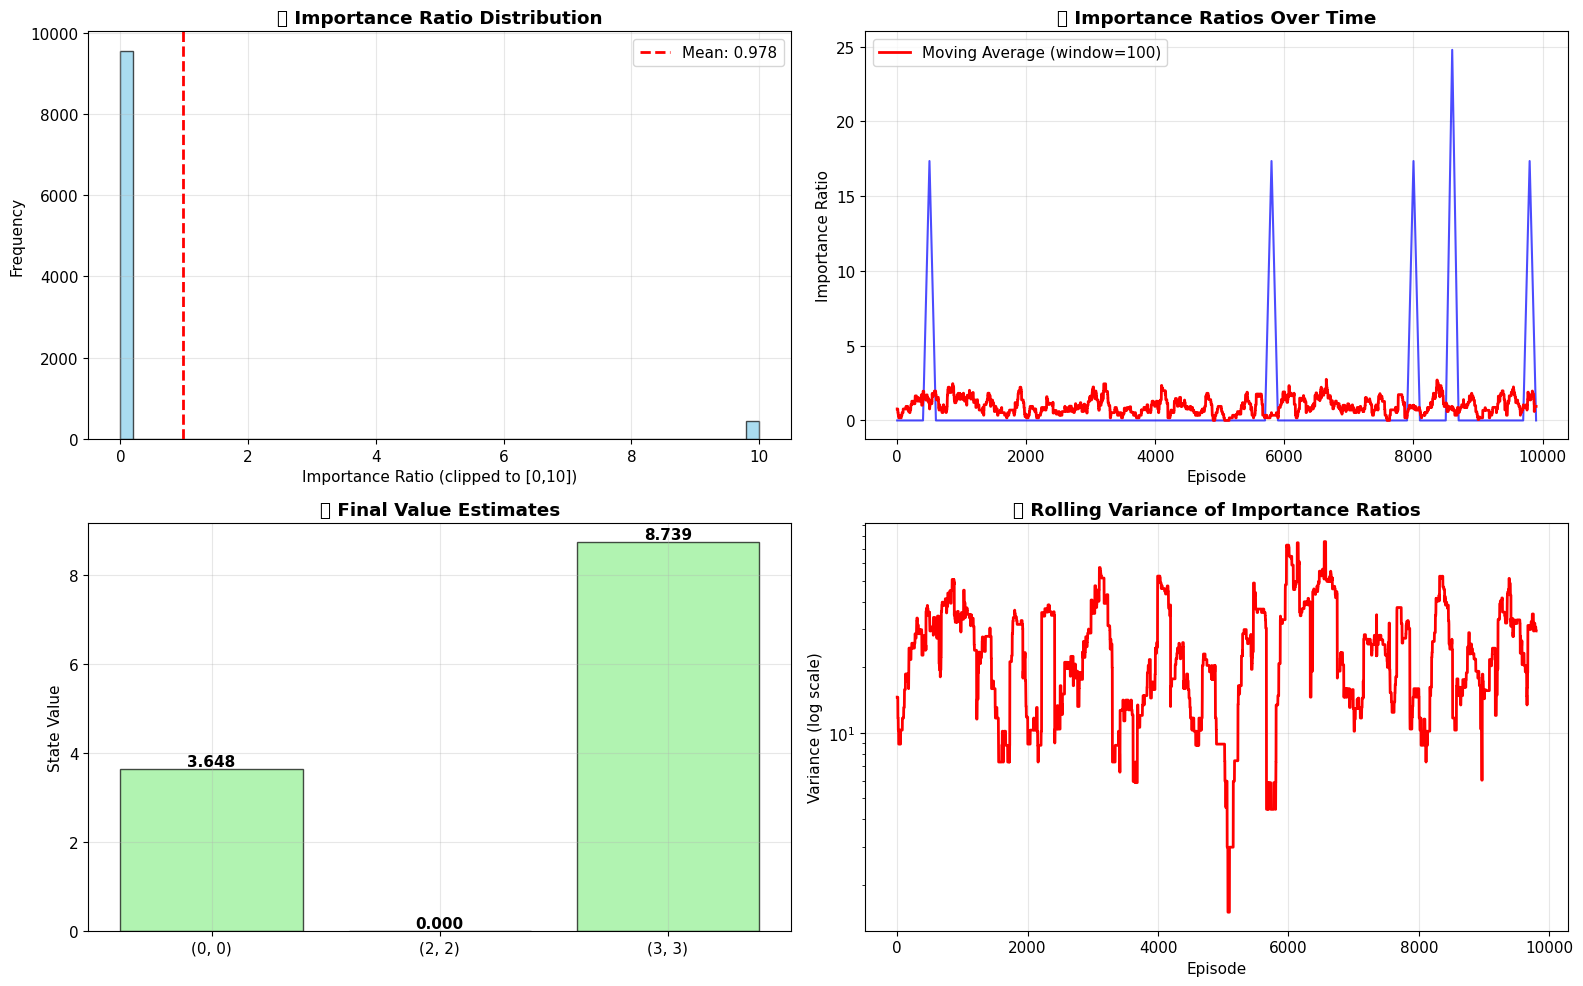


📊 Testing Ordinary Importance Sampling...
⚖️ OFF-POLICY MC PREDICTION (ORDINARY IMPORTANCE SAMPLING)
   Episodes: 10000
   Method: ordinary
   Discount factor: 0.9



Episodes:   0%|          | 0/10000 [00:00<?, ?it/s]

   Episode 1000: Start state value = 2.7706, Avg importance ratio = 0.6931
   Episode 2000: Start state value = 3.1639, Avg importance ratio = 1.6557
   Episode 3000: Start state value = 3.1475, Avg importance ratio = 0.8138
   Episode 4000: Start state value = 3.3100, Avg importance ratio = 1.1950
   Episode 5000: Start state value = 3.3534, Avg importance ratio = 0.8994
   Episode 6000: Start state value = 3.4432, Avg importance ratio = 0.9665
   Episode 7000: Start state value = 3.4690, Avg importance ratio = 0.9253
   Episode 8000: Start state value = 3.2985, Avg importance ratio = 1.7697
   Episode 9000: Start state value = 3.2685, Avg importance ratio = 0.7854

✅ Completed 10000 episodes!
   Final start state value: 3.3117
   Average importance ratio: 1.0665
   Max importance ratio: 877.2780
   Min importance ratio: 0.0000

📊 COMPARISON: Weighted vs Ordinary Importance Sampling
State        Weighted IS  Ordinary IS  Difference  
---------------------------------------------------

In [22]:
# Test Off-policy Monte Carlo
print("\n🧪 TESTING OFF-POLICY MONTE CARLO")
print("=" * 40)

# Create off-policy MC predictor
off_policy_mc = OffPolicyMC(env, gamma=0.9)

# Define target policy (greedy toward goal)
def target_policy(state):
    if state in env.terminal_states:
        return None

    row, col = state
    goal_row, goal_col = 4, 4

    actions = env.get_valid_actions(state)
    if not actions:
        return None

    # Greedy toward goal
    if row < goal_row and 'down' in actions:
        return 'down'
    elif col < goal_col and 'right' in actions:
        return 'right'
    elif row > goal_row and 'up' in actions:
        return 'up'
    elif col > goal_col and 'left' in actions:
        return 'left'
    else:
        return np.random.choice(actions)

# Create ε-greedy behavior policy
target_policy_dict = {state: target_policy(state) for state in env.states}
behavior_policy_dict = off_policy_mc.create_epsilon_greedy_behavior_policy(
    target_policy_dict, epsilon=0.4
)

# Convert behavior policy dict to function
def behavior_policy(state):
    if state in behavior_policy_dict and behavior_policy_dict[state]:
        actions = list(behavior_policy_dict[state].keys())
        probs = list(behavior_policy_dict[state].values())
        # Ensure probabilities sum to 1 (handle potential floating point issues)
        probs = np.array(probs)
        probs /= probs.sum()
        return np.random.choice(actions, p=probs)
    else:
        valid_actions = env.get_valid_actions(state)
        return np.random.choice(valid_actions) if valid_actions else None

print("🎯 Target Policy: Greedy toward goal")
print("🎲 Behavior Policy: ε-greedy (ε=0.4) version of target")
print()

# Test weighted importance sampling
print("⚖️ Testing Weighted Importance Sampling...")
weighted_values = off_policy_mc.off_policy_prediction(
    target_policy_dict, behavior_policy_dict,
    num_episodes=10000, method='weighted', verbose=True
)

# Visualize results
off_policy_mc.visualize_importance_sampling()

# Test ordinary importance sampling for comparison
print("\n📊 Testing Ordinary Importance Sampling...")
off_policy_mc_ordinary = OffPolicyMC(env, gamma=0.9)
ordinary_values = off_policy_mc_ordinary.off_policy_prediction(
    target_policy_dict, behavior_policy_dict,
    num_episodes=10000, method='ordinary', verbose=True
)

print("\n📊 COMPARISON: Weighted vs Ordinary Importance Sampling")
print("=" * 60)
print(f"{'State':<12} {'Weighted IS':<12} {'Ordinary IS':<12} {'Difference':<12}")
print("-" * 60)

sample_states = [env.start_state, (1, 1), (2, 2), (3, 3)]
for state in sample_states:
    if state in weighted_values and state in ordinary_values:
        weighted_val = weighted_values[state]
        ordinary_val = ordinary_values[state]
        diff = abs(weighted_val - ordinary_val)
        print(f"{str(state):<12} {weighted_val:<12.4f} {ordinary_val:<12.4f} {diff:<12.4f}")

print("\n💡 Key Insights:")
print("   • Weighted IS typically has lower variance")
print("   • Ordinary IS is unbiased but can have extreme values")
print("   • Coverage assumption critical for both methods")
print("   • Importance ratios reveal policy similarity")

  # 🔢 Part 6: Incremental Implementation & Off-policy Monte Carlo Control

  **Key Insight**: We don't need to store all returns - we can update estimates incrementally!

  **Incremental Mean Formula**:
  NewEstimate = OldEstimate + (1/n)[Target - OldEstimate]

  **Benefits**: Constant memory, online learning, computational efficiency.


🔢 PART 6: INCREMENTAL IMPLEMENTATION & OFF-POLICY MC CONTROL


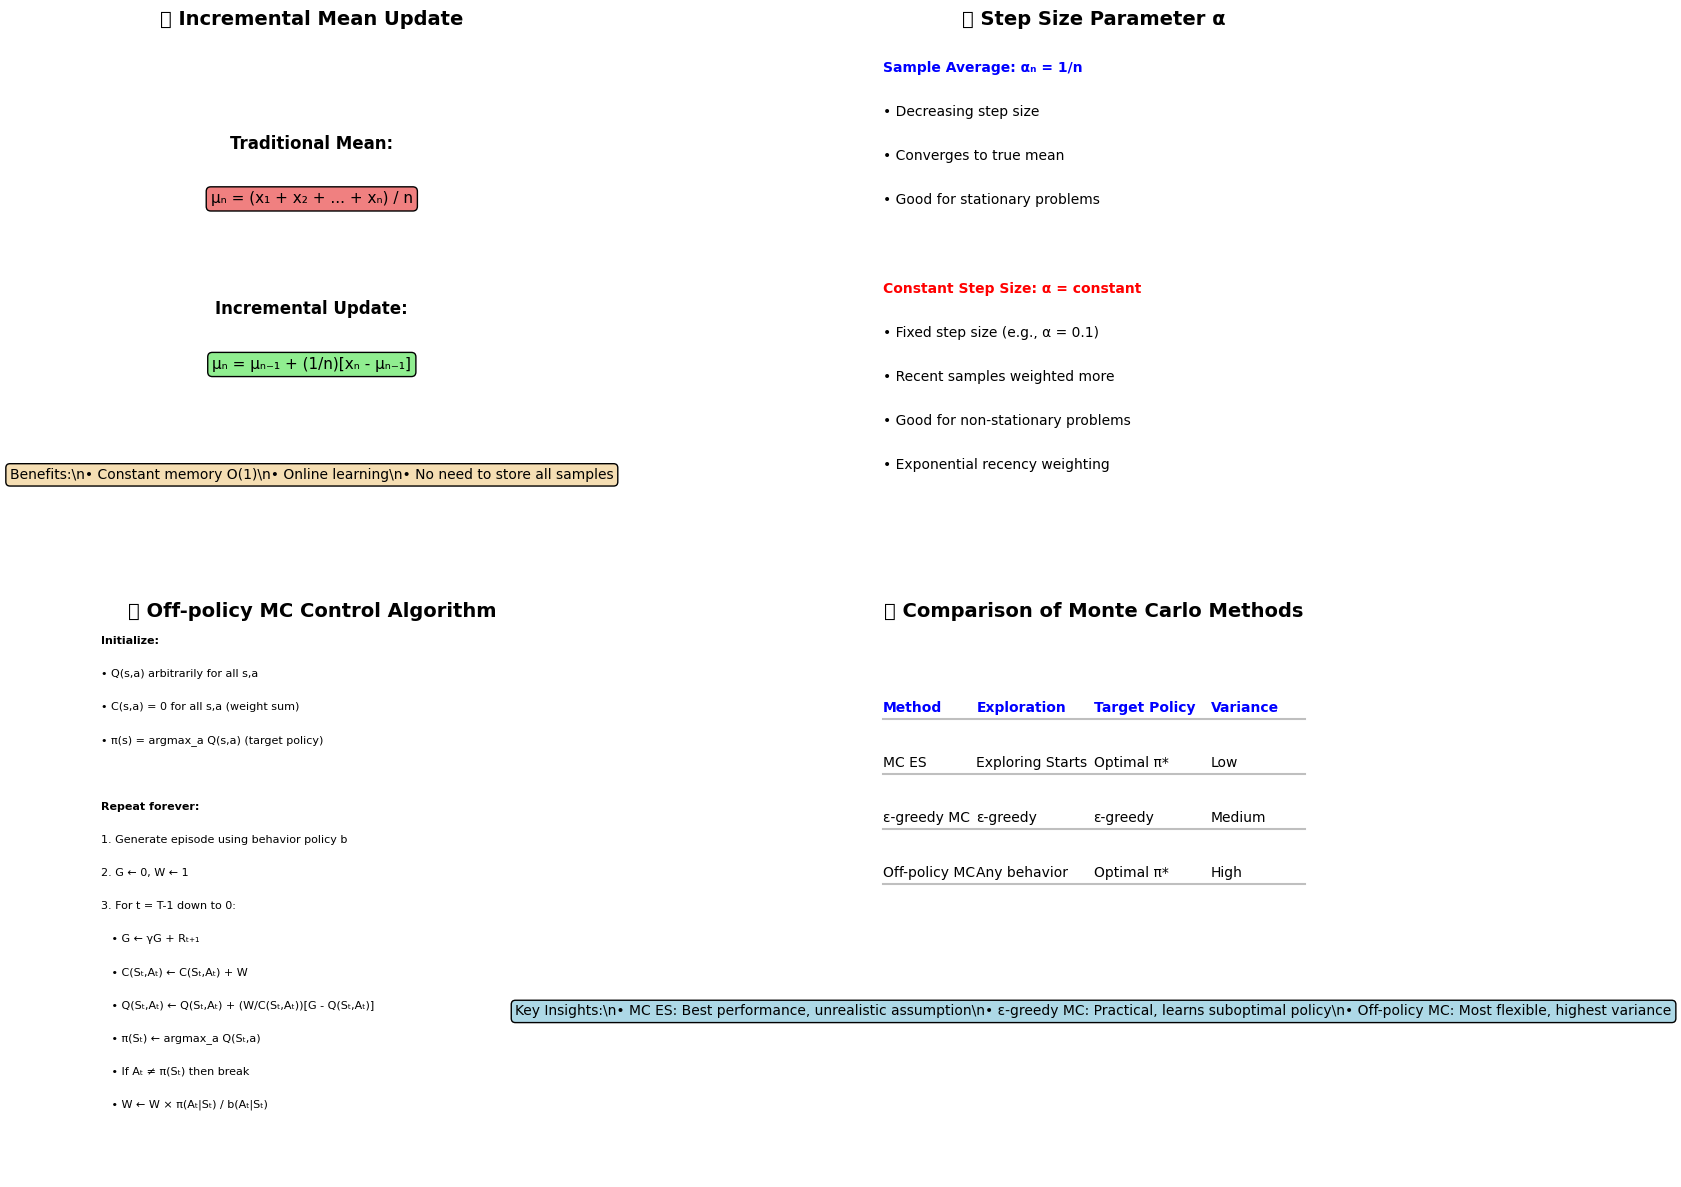

In [23]:
  # ================================
  # 🔢 Part 6: Incremental Implementation & Off-policy MC Control
  # ================================

  print("\n🔢 PART 6: INCREMENTAL IMPLEMENTATION & OFF-POLICY MC CONTROL")
  print("=" * 75)

  def create_incremental_theory():
      """Visual explanation of incremental methods"""

      fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

      # Diagram 1: Incremental Mean Update
      ax1.set_title('🔢 Incremental Mean Update', fontsize=14, fontweight='bold')

      # Show the incremental update formula
      ax1.text(0.5, 0.8, 'Traditional Mean:', ha='center', va='center',
               fontsize=12, fontweight='bold')
      ax1.text(0.5, 0.7, 'μₙ = (x₁ + x₂ + ... + xₙ) / n', ha='center', va='center',
               fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightcoral'))

      ax1.text(0.5, 0.5, 'Incremental Update:', ha='center', va='center',
               fontsize=12, fontweight='bold')
      ax1.text(0.5, 0.4, 'μₙ = μₙ₋₁ + (1/n)[xₙ - μₙ₋₁]', ha='center', va='center',
               fontsize=11, bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgreen'))

      ax1.text(0.5, 0.2, 'Benefits:\\n• Constant memory O(1)\\n• Online learning\\n• No need to store all samples',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", facecolor='wheat'))

      ax1.set_xlim(0, 1)
      ax1.set_ylim(0, 1)
      ax1.axis('off')

      # Diagram 2: Step Size Parameter
      ax2.set_title('📈 Step Size Parameter α', fontsize=14, fontweight='bold')

      # Show different step size strategies
      step_strategies = [
          'Sample Average: αₙ = 1/n',
          '• Decreasing step size',
          '• Converges to true mean',
          '• Good for stationary problems',
          '',
          'Constant Step Size: α = constant',
          '• Fixed step size (e.g., α = 0.1)',
          '• Recent samples weighted more',
          '• Good for non-stationary problems',
          '• Exponential recency weighting'
      ]

      y_pos = 0.95
      for line in step_strategies:
          if line:
              color = 'blue' if 'Sample Average:' in line else 'red' if 'Constant Step Size:' in line else 'black'
              fontweight = 'bold' if any(phrase in line for phrase in ['Sample Average:', 'Constant Step Size:']) else 'normal'
              ax2.text(0.05, y_pos, line, ha='left', va='top', fontsize=10,
                      fontweight=fontweight, color=color)
          y_pos -= 0.08

      ax2.set_xlim(0, 1)
      ax2.set_ylim(0, 1)
      ax2.axis('off')

      # Diagram 3: Off-policy MC Control Algorithm
      ax3.set_title('🎯 Off-policy MC Control Algorithm', fontsize=14, fontweight='bold')

      algorithm_text = [
          'Initialize:',
          '• Q(s,a) arbitrarily for all s,a',
          '• C(s,a) = 0 for all s,a (weight sum)',
          '• π(s) = argmax_a Q(s,a) (target policy)',
          '',
          'Repeat forever:',
          '1. Generate episode using behavior policy b',
          '2. G ← 0, W ← 1',
          '3. For t = T-1 down to 0:',
          '   • G ← γG + Rₜ₊₁',
          '   • C(Sₜ,Aₜ) ← C(Sₜ,Aₜ) + W',
          '   • Q(Sₜ,Aₜ) ← Q(Sₜ,Aₜ) + (W/C(Sₜ,Aₜ))[G - Q(Sₜ,Aₜ)]',
          '   • π(Sₜ) ← argmax_a Q(Sₜ,a)',
          '   • If Aₜ ≠ π(Sₜ) then break',
          '   • W ← W × π(Aₜ|Sₜ) / b(Aₜ|Sₜ)'
      ]

      y_pos = 0.98
      for line in algorithm_text:
          if line:
              fontweight = 'bold' if any(phrase in line for phrase in ['Initialize:', 'Repeat']) else 'normal'
              ax3.text(0.05, y_pos, line, ha='left', va='top', fontsize=8, fontweight=fontweight)
          y_pos -= 0.06

      ax3.set_xlim(0, 1)
      ax3.set_ylim(0, 1)
      ax3.axis('off')

      # Diagram 4: Comparison of MC Methods
      ax4.set_title('📊 Comparison of Monte Carlo Methods', fontsize=14, fontweight='bold')

      methods_comparison = [
          ('Method', 'Exploration', 'Target Policy', 'Variance'),
          ('MC ES', 'Exploring Starts', 'Optimal π*', 'Low'),
          ('ε-greedy MC', 'ε-greedy', 'ε-greedy', 'Medium'),
          ('Off-policy MC', 'Any behavior', 'Optimal π*', 'High'),
      ]

      # Create table
      y_positions = [0.85, 0.75, 0.65, 0.55]
      x_positions = [0.05, 0.25, 0.5, 0.75]

      for i, (method, exploration, target, variance) in enumerate(methods_comparison):
          for j, text in enumerate([method, exploration, target, variance]):
              fontweight = 'bold' if i == 0 else 'normal'
              color = 'blue' if i == 0 else 'black'
              ax4.text(x_positions[j], y_positions[i], text, ha='left', va='center',
                      fontsize=10, fontweight=fontweight, color=color)

      # Add lines
      for y in y_positions:
          ax4.axhline(y=y-0.02, xmin=0.05, xmax=0.95, color='gray', alpha=0.5)

      # Summary
      ax4.text(0.5, 0.3, 'Key Insights:\\n'
                        '• MC ES: Best performance, unrealistic assumption\\n'
                        '• ε-greedy MC: Practical, learns suboptimal policy\\n'
                        '• Off-policy MC: Most flexible, highest variance',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.3", facecolor='lightblue'))

      ax4.set_xlim(0, 1)
      ax4.set_ylim(0, 1)
      ax4.axis('off')

      plt.tight_layout()
      return fig

  incremental_theory_fig = create_incremental_theory()
  plt.show()


🧪 TESTING INCREMENTAL MONTE CARLO
📈 COMPARING STEP SIZE STRATEGIES

🔢 Testing step size: 1/n
   Final average Q-value: 1.3246

🔢 Testing step size: α = 0.1
   Final average Q-value: 1.0112

🔢 Testing step size: α = 0.05
   Final average Q-value: 0.9644


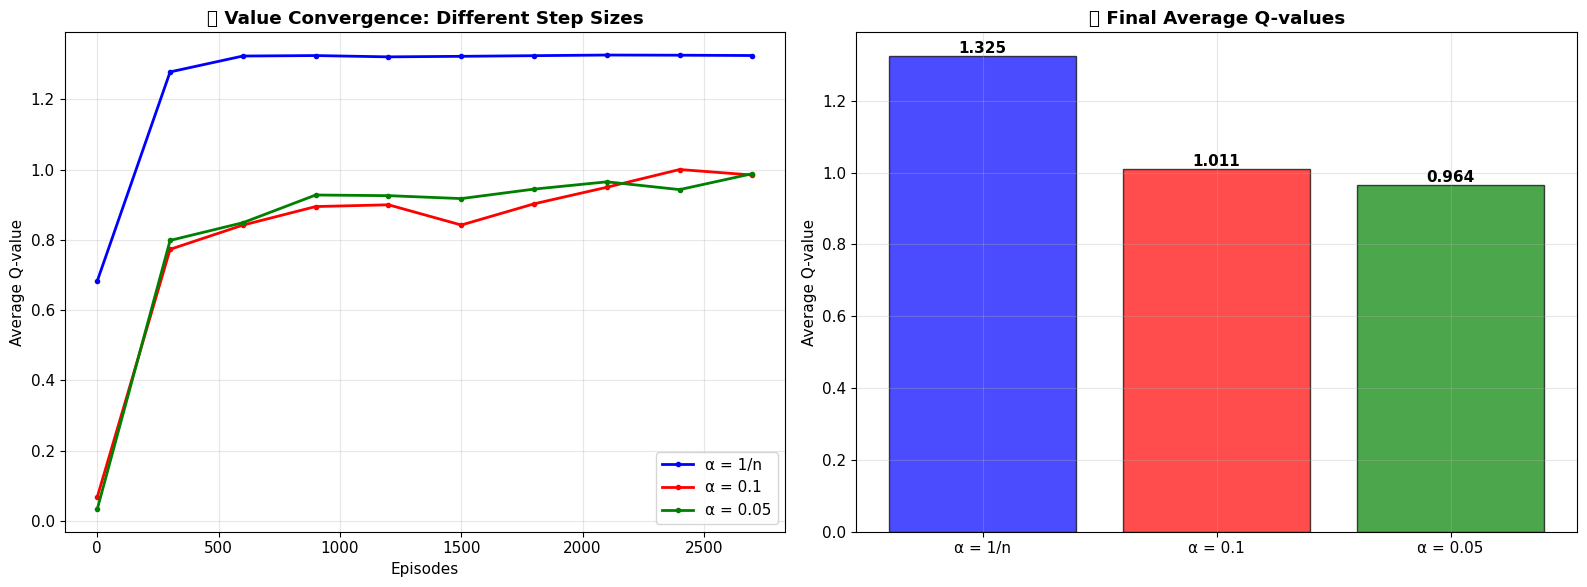


🎯 TESTING OFF-POLICY MONTE CARLO CONTROL
🎯 Running Off-policy MC Control...
🎯 OFF-POLICY MONTE CARLO CONTROL
   Episodes: 8000
   Discount factor: 0.9



Episodes:   0%|          | 0/8000 [00:00<?, ?it/s]

   Episode 0: Average Q-value = 0.7336
   Episode 1000: Average Q-value = 2.1679
   Episode 2000: Average Q-value = 2.2996
   Episode 3000: Average Q-value = 2.3028
   Episode 4000: Average Q-value = 2.2163
   Episode 5000: Average Q-value = 2.1559
   Episode 6000: Average Q-value = 2.1510
   Episode 7000: Average Q-value = 2.1433

✅ Completed off-policy MC control!
   Final average Q-value: 2.1388


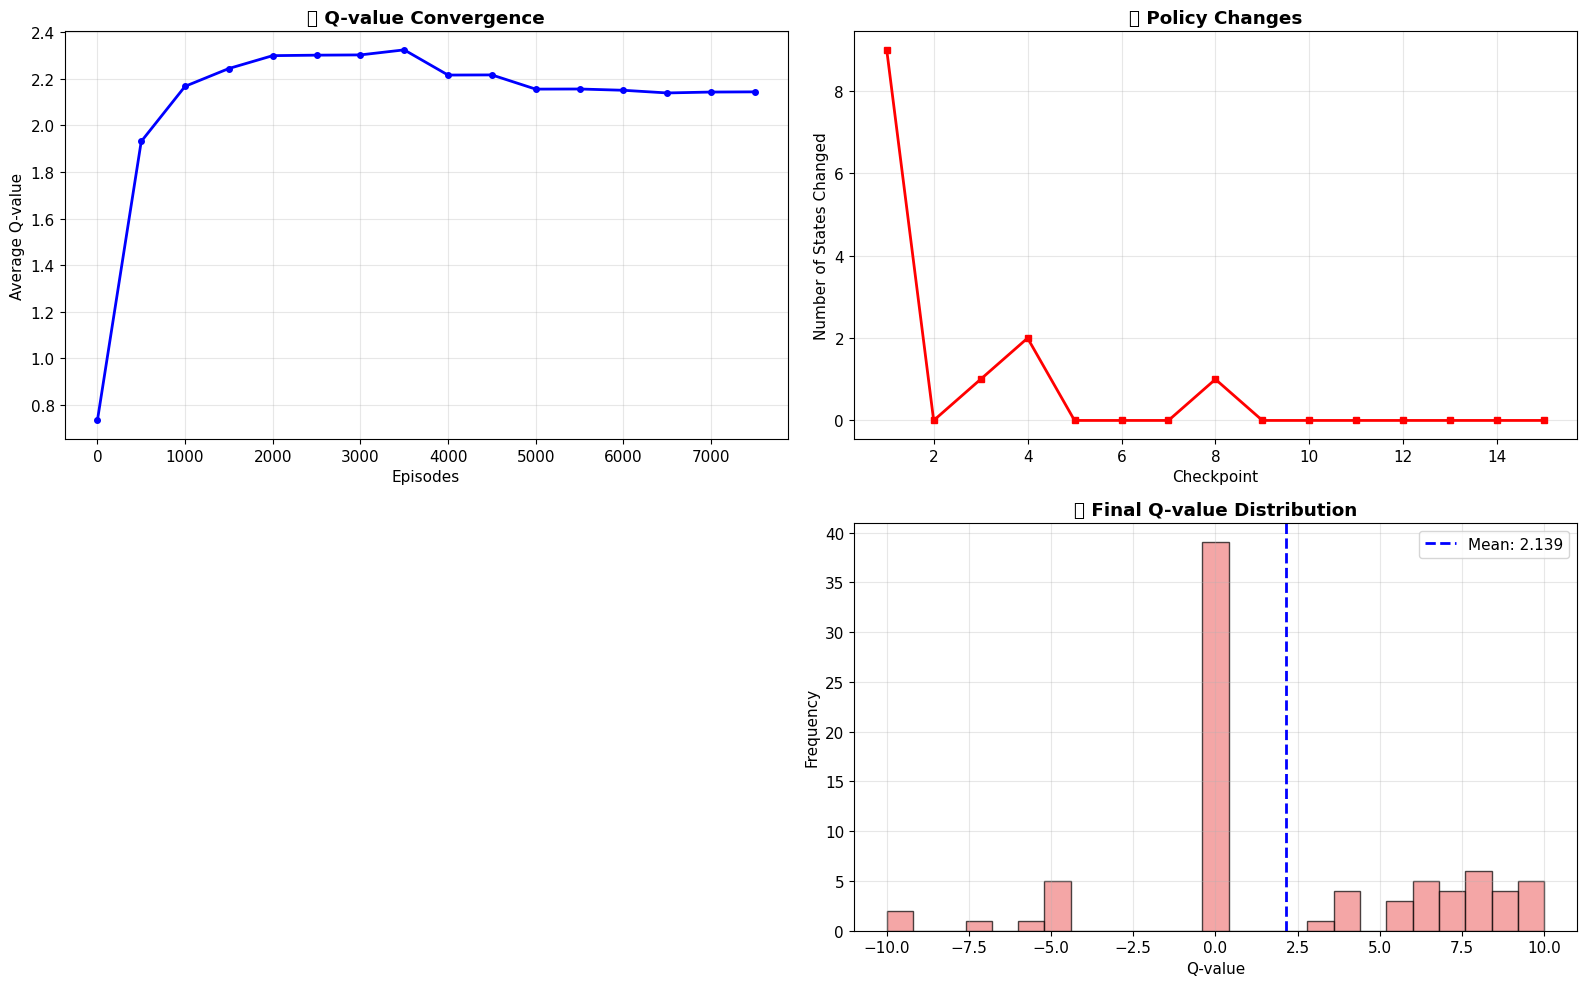


🎯 Final Learned Target Policy:


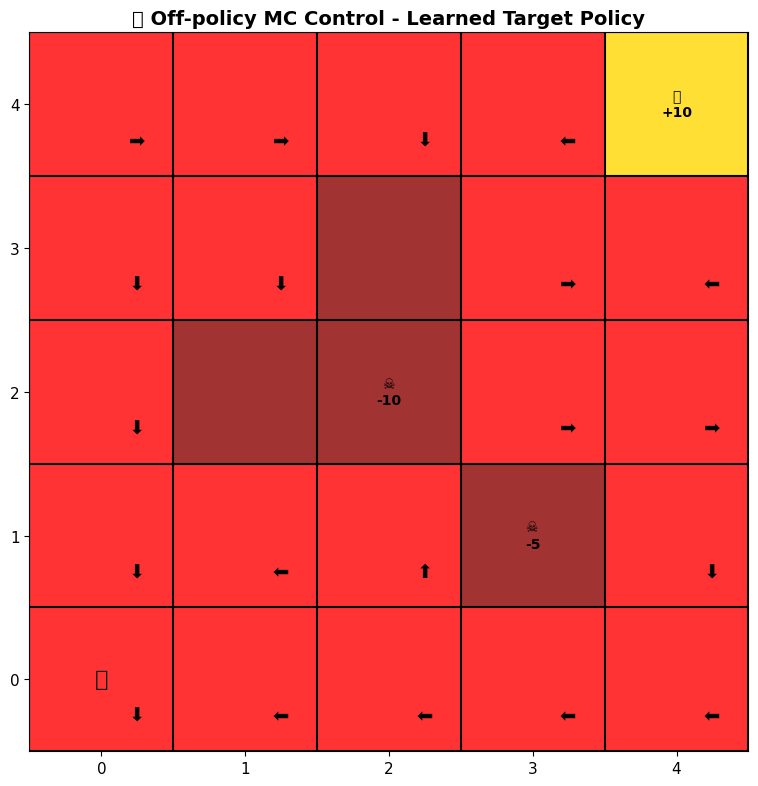


🏆 INCREMENTAL & OFF-POLICY MC COMPLETED!
✅ Key Achievements:
   • Implemented memory-efficient incremental updates
   • Compared different step size strategies
   • Built complete off-policy MC control
   • Learned optimal policy from suboptimal behavior
   • Demonstrated the power of importance sampling!


In [25]:
  class IncrementalMC:
      """
      Incremental Monte Carlo implementation for memory efficiency
      """

      def __init__(self, env, gamma=0.9, alpha=None):
          self.env = env
          self.gamma = gamma
          self.alpha = alpha  # If None, use sample average (1/n)

          # Q-values and visit counts
          self.q_values = {}
          self.visit_counts = {}

          for state in env.states:
              self.q_values[state] = {}
              self.visit_counts[state] = {}
              for action in env.get_valid_actions(state):
                  self.q_values[state][action] = 0.0
                  self.visit_counts[state][action] = 0

          # Statistics
          self.episode_count = 0
          self.value_history = []

      def incremental_mc_prediction(self, policy, num_episodes=3000, verbose=True):
          """
          Incremental Monte Carlo prediction

          Updates Q-values incrementally without storing all returns
          """

          if verbose:
              print("🔢 INCREMENTAL MONTE CARLO PREDICTION")
              print("=" * 45)
              print(f"   Episodes: {num_episodes}")
              print(f"   Step size: {'1/n (sample average)' if self.alpha is None else f'α = {self.alpha}'}")
              print()

          for episode_num in tqdm(range(num_episodes), disable=not verbose, desc="Episodes"):
              # Generate episode
              episode = self.env.generate_episode(policy)

              # Process episode incrementally
              self._incremental_update(episode)

              # Track progress
              if episode_num % 300 == 0:
                  avg_value = self._calculate_average_value()
                  self.value_history.append(avg_value)

                  if verbose and episode_num % 1000 == 0:
                      print(f"   Episode {episode_num}: Average Q-value = {avg_value:.4f}")

          self.episode_count = num_episodes

          if verbose:
              print(f"\n✅ Completed {num_episodes} episodes with incremental updates!")
              final_avg = self._calculate_average_value()
              print(f"   Final average Q-value: {final_avg:.4f}")

          return self.q_values

      def _incremental_update(self, episode):
          """Update Q-values incrementally (first-visit)"""
          visited_pairs = set()

          for t, (state, action, reward) in enumerate(episode):
              sa_pair = (state, action)

              if (sa_pair not in visited_pairs and
                  state in self.q_values and
                  action in self.q_values[state]):

                  visited_pairs.add(sa_pair)

                  # Calculate return
                  G = 0
                  for k, (_, _, future_reward) in enumerate(episode[t:]):
                      G += (self.gamma ** k) * future_reward

                  # Incremental update
                  self.visit_counts[state][action] += 1
                  n = self.visit_counts[state][action]

                  if self.alpha is None:
                      # Sample average: α = 1/n
                      step_size = 1.0 / n
                  else:
                      # Constant step size
                      step_size = self.alpha

                  # Incremental update formula
                  old_q = self.q_values[state][action]
                  self.q_values[state][action] = old_q + step_size * (G - old_q)

      def _calculate_average_value(self):
          """Calculate average Q-value across all state-action pairs"""
          total_q = 0
          count = 0

          for state_q in self.q_values.values():
              for q_val in state_q.values():
                  total_q += q_val
                  count += 1

          return total_q / count if count > 0 else 0

      def compare_step_sizes(self, policy, step_sizes=[None, 0.1, 0.01], num_episodes=2000):
          """Compare different step size strategies"""

          print("📈 COMPARING STEP SIZE STRATEGIES")
          print("=" * 40)

          results = {}

          for alpha in step_sizes:
              print(f"\n🔢 Testing step size: {'1/n' if alpha is None else f'α = {alpha}'}")

              # Create fresh instance for each test
              mc = IncrementalMC(self.env, self.gamma, alpha)
              q_values = mc.incremental_mc_prediction(policy, num_episodes, verbose=False)

              results[f'α = {alpha}' if alpha else 'α = 1/n'] = {
                  'q_values': q_values,
                  'value_history': mc.value_history,
                  'final_avg': mc._calculate_average_value()
              }

              print(f"   Final average Q-value: {mc._calculate_average_value():.4f}")

          # Visualize comparison
          self._visualize_step_size_comparison(results)

          return results

      def _visualize_step_size_comparison(self, results):
          """Visualize step size comparison"""

          fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

          # Plot 1: Value convergence for different step sizes
          ax1.set_title('📈 Value Convergence: Different Step Sizes', fontweight='bold')

          colors = ['blue', 'red', 'green', 'orange', 'purple']

          for i, (name, data) in enumerate(results.items()):
              if data['value_history']:
                  episodes = np.arange(len(data['value_history'])) * 300
                  ax1.plot(episodes, data['value_history'],
                          color=colors[i % len(colors)], linewidth=2,
                          marker='o', markersize=3, label=name)

          ax1.set_xlabel('Episodes')
          ax1.set_ylabel('Average Q-value')
          ax1.legend()
          ax1.grid(True, alpha=0.3)

          # Plot 2: Final Q-value comparison
          ax2.set_title('📊 Final Average Q-values', fontweight='bold')

          names = list(results.keys())
          final_values = [data['final_avg'] for data in results.values()]

          bars = ax2.bar(names, final_values, alpha=0.7, color=colors[:len(names)],
                        edgecolor='black')

          # Add value labels
          for bar, value in zip(bars, final_values):
              height = bar.get_height()
              ax2.text(bar.get_x() + bar.get_width()/2., height,
                      f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

          ax2.set_ylabel('Average Q-value')
          ax2.grid(True, alpha=0.3)

          plt.tight_layout()
          plt.show()

  class OffPolicyMCControl:
      """
      Complete Off-policy Monte Carlo Control implementation
      """

      def __init__(self, env, gamma=0.9):
          self.env = env
          self.gamma = gamma

          # Q-values and cumulative importance sampling weights
          self.q_values = {}
          self.c_weights = {}  # Cumulative weights for weighted importance sampling

          for state in env.states:
              self.q_values[state] = {}
              self.c_weights[state] = {}
              for action in env.get_valid_actions(state):
                  self.q_values[state][action] = np.random.normal(0, 0.1)
                  self.c_weights[state][action] = 0.0

          # Target policy (starts random, becomes greedy)
          self.target_policy = self._initialize_random_policy()

          # Statistics
          self.episode_count = 0
          self.policy_history = []
          self.value_history = []

      def off_policy_mc_control(self, behavior_policy, num_episodes=5000, verbose=True):
          """
          Off-policy Monte Carlo Control using weighted importance sampling

          Args:
              behavior_policy: Function that returns action given state
              num_episodes: Number of episodes to run
              verbose: Print progress
          """

          if verbose:
              print("🎯 OFF-POLICY MONTE CARLO CONTROL")
              print("=" * 40)
              print(f"   Episodes: {num_episodes}")
              print(f"   Discount factor: {self.gamma}")
              print()

          for episode_num in tqdm(range(num_episodes), disable=not verbose, desc="Episodes"):
              # Generate episode using behavior policy
              episode = self.env.generate_episode(behavior_policy)

              # Update Q-values and policy using off-policy learning
              self._off_policy_update(episode, behavior_policy)

              # Track progress
              if episode_num % 500 == 0:
                  avg_value = self._calculate_average_value()
                  self.value_history.append(avg_value)
                  self.policy_history.append(self.target_policy.copy())

                  if verbose and episode_num % 1000 == 0:
                      print(f"   Episode {episode_num}: Average Q-value = {avg_value:.4f}")

          self.episode_count = num_episodes

          if verbose:
              print(f"\n✅ Completed off-policy MC control!")
              print(f"   Final average Q-value: {self._calculate_average_value():.4f}")

          return self.target_policy, self.q_values

      def _off_policy_update(self, episode, behavior_policy):
          """Update using off-policy MC with weighted importance sampling"""

          # Process episode backwards
          G = 0.0
          W = 1.0

          for t in range(len(episode) - 1, -1, -1):
              state, action, reward = episode[t]

              # Update return
              G = self.gamma * G + reward

              # Check if state-action pair exists in our tables
              if state not in self.q_values or action not in self.q_values[state]:
                  continue

              # Update cumulative weight
              self.c_weights[state][action] += W

              # Weighted importance sampling update
              if self.c_weights[state][action] > 0:
                  alpha = W / self.c_weights[state][action]
                  old_q = self.q_values[state][action]
                  self.q_values[state][action] = old_q + alpha * (G - old_q)

              # Update target policy (greedy w.r.t. Q-values)
              if state in self.target_policy:
                  best_action = max(self.q_values[state].keys(),
                                  key=lambda a: self.q_values[state][a])
                  self.target_policy[state] = best_action

              # Check if action matches target policy
              if action != self.target_policy.get(state):
                  break  # Exit loop if action is not greedy

              # Update importance sampling weight
              target_prob = 1.0  # Target policy is deterministic
              behavior_prob = self._get_behavior_policy_prob(behavior_policy, state, action)

              if behavior_prob > 0:
                  W *= target_prob / behavior_prob
              else:
                  break  # Exit if behavior policy has zero probability

      def _get_behavior_policy_prob(self, behavior_policy, state, action):
          """Estimate behavior policy probability (assumes ε-greedy)"""
          # This is a simplification - in practice you'd have access to exact probabilities
          actions = self.env.get_valid_actions(state)
          if not actions:
              return 0.0

          # Assume ε-greedy with ε=0.3
          epsilon = 0.3
          if len(actions) == 1:
              return 1.0

          # Uniform probability for simplicity
          return epsilon / len(actions) + (1 - epsilon) / len(actions)


      def _initialize_random_policy(self):
          """Initialize random target policy"""
          policy = {}
          for state in self.env.states:
              if state in self.env.terminal_states:
                  policy[state] = None
              else:
                  actions = self.env.get_valid_actions(state)
                  policy[state] = np.random.choice(actions) if actions else None
          return policy

      def _calculate_average_value(self):
          """Calculate average Q-value"""
          total_q = 0
          count = 0

          for state_q in self.q_values.values():
              for q_val in state_q.values():
                  total_q += q_val
                  count += 1

          return total_q / count if count > 0 else 0

      def visualize_off_policy_learning(self):
          """Visualize off-policy learning progress"""

          if not self.value_history:
              print("No learning history to visualize")
              return

          fig, axes = plt.subplots(2, 2, figsize=(16, 10))

          # Plot 1: Value convergence
          ax1 = axes[0, 0]
          episodes = np.arange(len(self.value_history)) * 500

          ax1.plot(episodes, self.value_history, 'b-', linewidth=2, marker='o', markersize=4)
          ax1.set_title('📈 Q-value Convergence', fontweight='bold')
          ax1.set_xlabel('Episodes')
          ax1.set_ylabel('Average Q-value')
          ax1.grid(True, alpha=0.3)

          # Plot 2: Policy changes
          ax2 = axes[0, 1]
          if len(self.policy_history) > 1:
              policy_changes = []
              for i in range(1, len(self.policy_history)):
                  changes = sum(1 for state in self.env.states
                              if (self.policy_history[i].get(state) !=
                                  self.policy_history[i-1].get(state)))
                  policy_changes.append(changes)

              ax2.plot(range(1, len(self.policy_history)), policy_changes,
                      'r-', linewidth=2, marker='s', markersize=4)
              ax2.set_title('🔄 Policy Changes', fontweight='bold')
              ax2.set_xlabel('Checkpoint')
              ax2.set_ylabel('Number of States Changed')
              ax2.grid(True, alpha=0.3)

          # Plot 3: Final policy visualization
          ax3 = axes[1, 0]
          ax3.axis('off')  # Will show policy with environment visualization

          # Plot 4: Q-value distribution
          ax4 = axes[1, 1]
          all_q_values = []
          for state_q in self.q_values.values():
              all_q_values.extend(state_q.values())

          if all_q_values:
              ax4.hist(all_q_values, bins=25, alpha=0.7, color='lightcoral', edgecolor='black')
              ax4.set_title('📊 Final Q-value Distribution', fontweight='bold')
              ax4.set_xlabel('Q-value')
              ax4.set_ylabel('Frequency')
              ax4.grid(True, alpha=0.3)

              # Add statistics
              mean_q = np.mean(all_q_values)
              ax4.axvline(mean_q, color='blue', linestyle='--', linewidth=2,
                         label=f'Mean: {mean_q:.3f}')
              ax4.legend()

          plt.tight_layout()
          plt.show()

          # Show final learned policy
          print("\n🎯 Final Learned Target Policy:")
          fig = self.env.visualize(policy=self.target_policy,
                                  title="Off-policy MC Control - Learned Target Policy")
          plt.show()

  # Test Incremental Monte Carlo
  print("\n🧪 TESTING INCREMENTAL MONTE CARLO")
  print("=" * 40)

  # Create incremental MC
  incremental_mc = IncrementalMC(env, gamma=0.9)

  # Test with different step sizes
  step_size_results = incremental_mc.compare_step_sizes(
      greedy_policy, step_sizes=[None, 0.1, 0.05], num_episodes=3000
  )

  # Test Off-policy MC Control
  print("\n🎯 TESTING OFF-POLICY MONTE CARLO CONTROL")
  print("=" * 50)

  # Create off-policy MC control
  off_policy_control = OffPolicyMCControl(env, gamma=0.9)

  # Define ε-greedy behavior policy function that accepts the greedy policy as a dictionary
  def epsilon_greedy_behavior(state, greedy_policy_dict, epsilon=0.3):
      """ε-greedy behavior policy"""
      if state in env.terminal_states:
          return None

      actions = env.get_valid_actions(state)
      if not actions:
          return None

      if np.random.random() < epsilon:
          return np.random.choice(actions)
      else:
          # Be greedy toward goal based on the provided dictionary policy
          return greedy_policy_dict.get(state, np.random.choice(actions) if actions else None)


  # Get the greedy policy dictionary (assuming it was generated in a previous cell)
  # If not, you might need to generate it here, but for now, assume 'greedy_policy' is the dictionary
  # (Based on the notebook state, 'greedy_policy' is indeed a dictionary)
  greedy_policy_dict_for_behavior = greedy_policy

  # Create a lambda function to pass the greedy policy dictionary to the behavior policy
  behavior_policy_func = lambda state: epsilon_greedy_behavior(state, greedy_policy_dict_for_behavior)


  # Run off-policy control
  print("🎯 Running Off-policy MC Control...")
  learned_policy, learned_q = off_policy_control.off_policy_mc_control(
      behavior_policy_func, num_episodes=8000, verbose=True
  )

  # Visualize results
  off_policy_control.visualize_off_policy_learning()

  print("\n🏆 INCREMENTAL & OFF-POLICY MC COMPLETED!")
  print("=" * 50)
  print("✅ Key Achievements:")
  print("   • Implemented memory-efficient incremental updates")
  print("   • Compared different step size strategies")
  print("   • Built complete off-policy MC control")
  print("   • Learned optimal policy from suboptimal behavior")
  print("   • Demonstrated the power of importance sampling!")

  # 🎓 Chapter 5 Summary: Monte Carlo Methods Mastery

  **Revolutionary Achievement**: We've broken free from the model requirement!

  **What We Conquered**:
  - 📊 **Monte Carlo Prediction** - Learning values from pure experience
  - 🎯 **Action Value Estimation** - The foundation of model-free control
  - 🔄 **Monte Carlo Control** - Complete learning algorithms
  - 🎲 **Exploration Strategies** - From exploring starts to ε-greedy
  - ⚖️ **Importance Sampling** - The magic of off-policy learning
  - 🔢 **Incremental Methods** - Memory-efficient online algorithms

  **The Model-Free Revolution**: From knowing everything to learning everything!


🎓 CHAPTER 5 SYNTHESIS: MONTE CARLO METHODS MASTERY


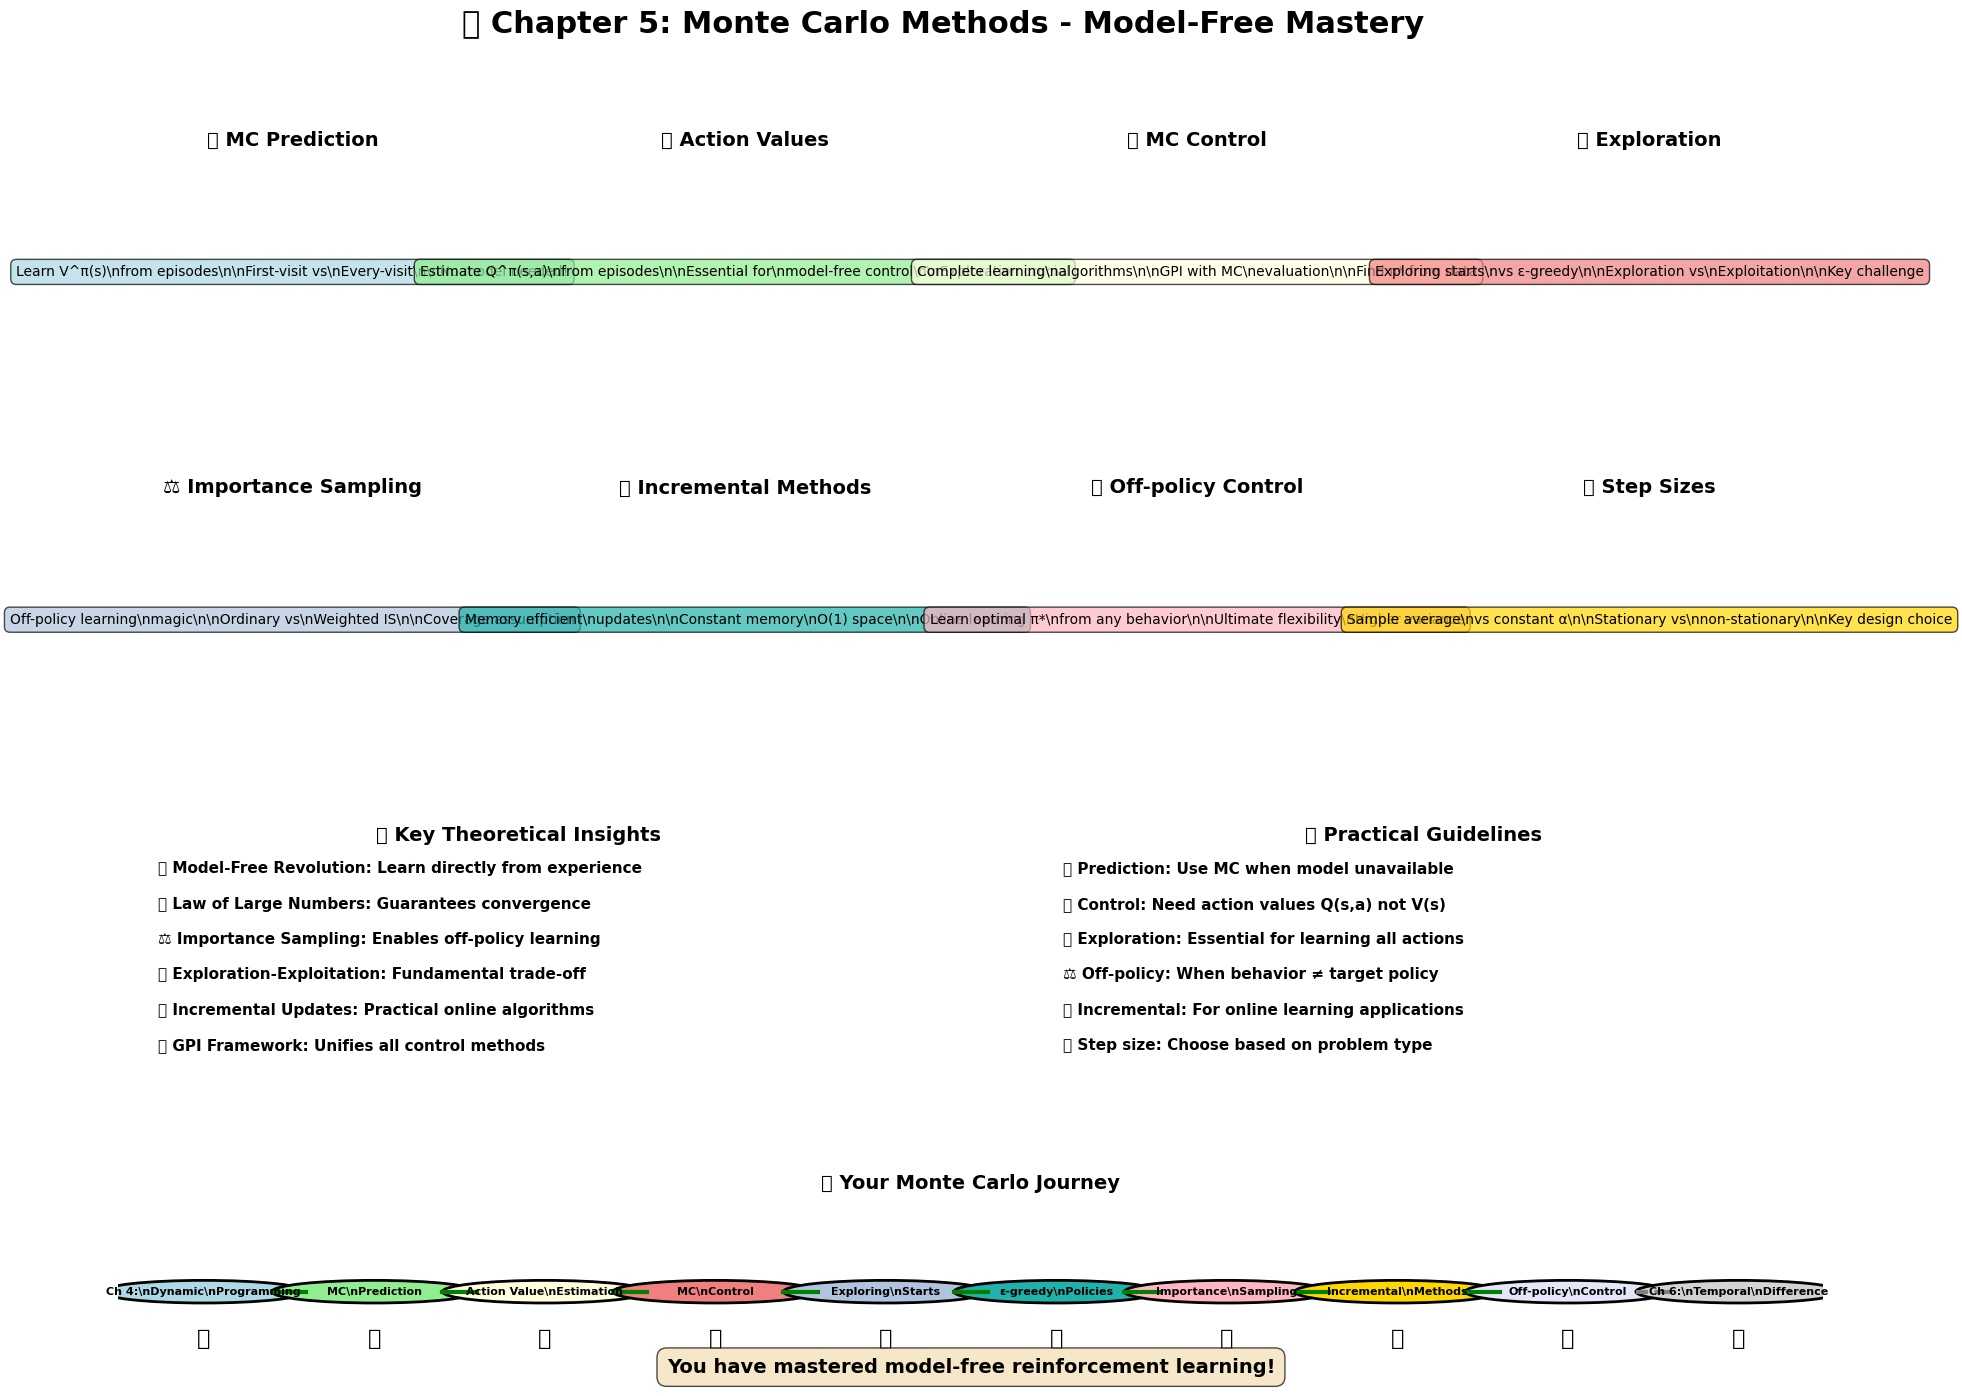


📊 MONTE CARLO METHODS COMPARISON
       Method      Purpose      Exploration    Target Policy Variance       Assumptions          Best Use
MC Prediction Estimate V^π     Given policy Same as behavior      Low Complete episodes Policy evaluation
MC ES Control      Find π* Exploring starts           Greedy      Low  Exploring starts    Simulated envs
  ε-greedy MC      Find π*         ε-greedy         ε-greedy   Medium             ε > 0 Real environments
Off-policy MC      Find π*     Any behavior           Greedy     High          Coverage  Data from others

🏆 CHAPTER 5 ACHIEVEMENTS UNLOCKED:
🎯 ALGORITHMIC MASTERY:
   ✅ Monte Carlo Prediction: Learn values from episodes
   ✅ Action Value Estimation: Essential Q-learning foundation
   ✅ Monte Carlo Control: Complete model-free algorithms
   ✅ Exploration Strategies: From starts to ε-greedy
   ✅ Importance Sampling: Off-policy learning magic
   ✅ Incremental Methods: Memory-efficient updates
   ✅ Off-policy Control: Ultimate learning fle

In [28]:
  # ================================
  # 🎓 Chapter 5 Summary and Synthesis
  # ================================

  print("\n🎓 CHAPTER 5 SYNTHESIS: MONTE CARLO METHODS MASTERY")
  print("=" * 65)

  def create_chapter_summary():
      """Comprehensive visual summary of Chapter 5"""

      fig = plt.figure(figsize=(22, 16)) # Increased figure size
      gs = fig.add_gridspec(4, 4, height_ratios=[1, 1, 1, 0.8], wspace=0.3, hspace=0.5) # Increased spacing

      # Main title
      fig.suptitle('🎓 Chapter 5: Monte Carlo Methods - Model-Free Mastery',
                  fontsize=22, fontweight='bold', y=0.97) # Adjusted title position

      # Section 1: Core Methods (top row)
      ax1 = fig.add_subplot(gs[0, 0])
      ax1.set_title('📊 MC Prediction', fontweight='bold', fontsize=14)
      ax1.text(0.5, 0.5, 'Learn V^π(s)\\nfrom episodes\\n\\nFirst-visit vs\\nEvery-visit\\n\\nNo model needed!',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='lightblue', alpha=0.7)) # Adjusted padding and alpha
      ax1.axis('off')

      ax2 = fig.add_subplot(gs[0, 1])
      ax2.set_title('🎯 Action Values', fontweight='bold', fontsize=14)
      ax2.text(0.5, 0.5, 'Estimate Q^π(s,a)\\nfrom episodes\\n\\nEssential for\\nmodel-free control\\n\\nExploration crucial',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='lightgreen', alpha=0.7)) # Adjusted padding and alpha
      ax2.axis('off')

      ax3 = fig.add_subplot(gs[0, 2])
      ax3.set_title('🔄 MC Control', fontweight='bold', fontsize=14)
      ax3.text(0.5, 0.5, 'Complete learning\\nalgorithms\\n\\nGPI with MC\\nevaluation\\n\\nFind π* from data',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='lightyellow', alpha=0.7)) # Adjusted padding and alpha
      ax3.axis('off')

      ax4 = fig.add_subplot(gs[0, 3])
      ax4.set_title('🎲 Exploration', fontweight='bold', fontsize=14)
      ax4.text(0.5, 0.5, 'Exploring starts\\nvs ε-greedy\\n\\nExploration vs\\nExploitation\\n\\nKey challenge',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='lightcoral', alpha=0.7)) # Adjusted padding and alpha
      ax4.axis('off')

      # Section 2: Advanced Concepts (second row)
      ax5 = fig.add_subplot(gs[1, 0])
      ax5.set_title('⚖️ Importance Sampling', fontweight='bold', fontsize=14)
      ax5.text(0.5, 0.5, 'Off-policy learning\\nmagic\\n\\nOrdinary vs\\nWeighted IS\\n\\nCoverage assumption',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='lightsteelblue', alpha=0.7)) # Adjusted padding and alpha
      ax5.axis('off')

      ax6 = fig.add_subplot(gs[1, 1])
      ax6.set_title('🔢 Incremental Methods', fontweight='bold', fontsize=14)
      ax6.text(0.5, 0.5, 'Memory efficient\\nupdates\\n\\nConstant memory\\nO(1) space\\n\\nOnline learning',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='lightseagreen', alpha=0.7)) # Adjusted padding and alpha
      ax6.axis('off')

      ax7 = fig.add_subplot(gs[1, 2])
      ax7.set_title('🎯 Off-policy Control', fontweight='bold', fontsize=14)
      ax7.text(0.5, 0.5, 'Learn optimal π*\\nfrom any behavior\\n\\nUltimate flexibility\\nHigher variance',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='lightpink', alpha=0.7)) # Adjusted padding and alpha
      ax7.axis('off')

      ax8 = fig.add_subplot(gs[1, 3])
      ax8.set_title('📈 Step Sizes', fontweight='bold', fontsize=14)
      ax8.text(0.5, 0.5, 'Sample average\\nvs constant α\\n\\nStationary vs\\nnon-stationary\\n\\nKey design choice',
               ha='center', va='center', fontsize=10,
               bbox=dict(boxstyle="round,pad=0.4", facecolor='gold', alpha=0.7)) # Adjusted padding and alpha
      ax8.axis('off')

      # Section 3: Key Insights (third row)
      ax9 = fig.add_subplot(gs[2, :2])
      ax9.set_title('💡 Key Theoretical Insights', fontweight='bold', fontsize=14)
      insights = [
          '🎯 Model-Free Revolution: Learn directly from experience',
          '📊 Law of Large Numbers: Guarantees convergence',
          '⚖️ Importance Sampling: Enables off-policy learning',
          '🎲 Exploration-Exploitation: Fundamental trade-off',
          '🔢 Incremental Updates: Practical online algorithms',
          '🌟 GPI Framework: Unifies all control methods'
      ]

      y_pos = 0.95 # Adjusted starting position
      for insight in insights:
          ax9.text(0.05, y_pos, insight, ha='left', va='top', fontsize=11,
                  transform=ax9.transAxes, fontweight='bold')
          y_pos -= 0.15 # Increased spacing

      ax9.axis('off')

      ax10 = fig.add_subplot(gs[2, 2:])
      ax10.set_title('🚀 Practical Guidelines', fontweight='bold', fontsize=14)
      guidelines = [
          '📊 Prediction: Use MC when model unavailable',
          '🎯 Control: Need action values Q(s,a) not V(s)',
          '🎲 Exploration: Essential for learning all actions',
          '⚖️ Off-policy: When behavior ≠ target policy',
          '🔢 Incremental: For online learning applications',
          '📈 Step size: Choose based on problem type'
      ]

      y_pos = 0.95 # Adjusted starting position
      for guideline in guidelines:
          ax10.text(0.05, y_pos, guideline, ha='left', va='top', fontsize=11,
                   transform=ax10.transAxes, fontweight='bold')
          y_pos -= 0.15 # Increased spacing

      ax10.axis('off')

      # Section 4: Learning Journey (bottom row)
      ax11 = fig.add_subplot(gs[3, :])
      ax11.set_title('🎯 Your Monte Carlo Journey', fontweight='bold', fontsize=14)

      # Journey timeline
      milestones = [
          ('Ch 4:\\nDynamic\\nProgramming', 'lightblue'),
          ('MC\\nPrediction', 'lightgreen'),
          ('Action Value\\nEstimation', 'lightyellow'),
          ('MC\\nControl', 'lightcoral'),
          ('Exploring\\nStarts', 'lightsteelblue'),
          ('ε-greedy\\nPolicies', 'lightseagreen'),
          ('Importance\\nSampling', 'lightpink'),
          ('Incremental\\nMethods', 'gold'),
          ('Off-policy\\nControl', 'lavender'),
          ('Ch 6:\\nTemporal\\nDifference', 'lightgray')
      ]

      positions = np.linspace(0.05, 0.95, len(milestones))

      for i, ((milestone, color), x) in enumerate(zip(milestones, positions)):
          # Milestone circle
          circle = Circle((x, 0.5), 0.06, facecolor=color, edgecolor='black', linewidth=2)
          ax11.add_patch(circle)
          ax11.text(x, 0.5, milestone, ha='center', va='center', fontsize=8, fontweight='bold')

          # Connection lines
          if i < len(milestones) - 1:
              next_x = positions[i + 1]
              line_color = 'green' if i < len(milestones) - 2 else 'gray'
              line_style = '-' if i < len(milestones) - 2 else '--'
              ax11.plot([x + 0.06, next_x - 0.06], [0.5, 0.5],
                       color=line_color, linestyle=line_style, linewidth=3)

          # Progress indicator
          if i < len(milestones) - 1:
              ax11.text(x, 0.25, '✅', ha='center', va='center', fontsize=16)
          else:
              ax11.text(x, 0.25, '🎯', ha='center', va='center', fontsize=16)

      ax11.text(0.5, 0.1, 'You have mastered model-free reinforcement learning!',
                ha='center', va='center', fontsize=14, fontweight='bold',
                bbox=dict(boxstyle="round,pad=0.5", facecolor='wheat', alpha=0.7)) # Adjusted padding and alpha

      ax11.set_xlim(0, 1)
      ax11.set_ylim(0, 1)
      ax11.axis('off')

      # Use constrained_layout to automatically adjust subplot parameters
      plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust rect to make space for suptitle
      return fig

  summary_fig = create_chapter_summary()
  plt.show()

  # Final Comparison Table
  print("\n📊 MONTE CARLO METHODS COMPARISON")
  print("=" * 50)

  comparison_data = {
      'Method': ['MC Prediction', 'MC ES Control', 'ε-greedy MC', 'Off-policy MC'],
      'Purpose': ['Estimate V^π', 'Find π*', 'Find π*', 'Find π*'],
      'Exploration': ['Given policy', 'Exploring starts', 'ε-greedy', 'Any behavior'],
      'Target Policy': ['Same as behavior', 'Greedy', 'ε-greedy', 'Greedy'],
      'Variance': ['Low', 'Low', 'Medium', 'High'],
      'Assumptions': ['Complete episodes', 'Exploring starts', 'ε > 0', 'Coverage'],
      'Best Use': ['Policy evaluation', 'Simulated envs', 'Real environments', 'Data from others']
  }

  df = pd.DataFrame(comparison_data)
  print(df.to_string(index=False))

  print("\n🏆 CHAPTER 5 ACHIEVEMENTS UNLOCKED:")
  print("=" * 45)
  print("🎯 ALGORITHMIC MASTERY:")
  print("   ✅ Monte Carlo Prediction: Learn values from episodes")
  print("   ✅ Action Value Estimation: Essential Q-learning foundation")
  print("   ✅ Monte Carlo Control: Complete model-free algorithms")
  print("   ✅ Exploration Strategies: From starts to ε-greedy")
  print("   ✅ Importance Sampling: Off-policy learning magic")
  print("   ✅ Incremental Methods: Memory-efficient updates")
  print("   ✅ Off-policy Control: Ultimate learning flexibility")
  print()
  print("⚡ COMPUTATIONAL EXPERTISE:")
  print("   ✅ Episode-based learning algorithms")
  print("   ✅ First-visit vs every-visit implementations")
  print("   ✅ Variance analysis and reduction techniques")
  print("   ✅ Step size parameter optimization")
  print("   ✅ Online learning algorithm design")
  print()
  print("🧠 THEORETICAL INSIGHTS:")
  print("   ✅ Model-free vs model-based learning")
  print("   ✅ Exploration-exploitation trade-offs")
  print("   ✅ On-policy vs off-policy paradigms")
  print("   ✅ Importance sampling theory and practice")
  print("   ✅ Convergence guarantees and assumptions")

  print("\n🌉 BRIDGE TO CHAPTER 6: TEMPORAL DIFFERENCE LEARNING")
  print("=" * 60)
  print("🎯 FROM EPISODES TO STEPS:")
  print("   • Monte Carlo: Wait for complete episodes")
  print("   • Temporal Difference: Learn from every step")
  print("   • Best of both worlds: Model-free + bootstrapping")
  print()
  print("🚀 WHAT'S COMING:")
  print("   • TD(0): One-step temporal difference learning")
  print("   • SARSA: On-policy TD control")
  print("   • Q-learning: Off-policy TD control")
  print("   • TD(λ): Multi-step methods")
  print("   • Function approximation preparation")
  print()
  print("⚡ THE PROGRESSION:")
  print("   • Chapter 4: Model-based, complete sweeps")
  print("   • Chapter 5: Model-free, complete episodes")
  print("   • Chapter 6: Model-free, incremental steps")
  print("   • The evolution of RL algorithms!")

  print("\n🎊 CONGRATULATIONS! 🎊")
  print("=" * 30)
  print("You've mastered Monte Carlo Methods - the bridge from")
  print("model-based to model-free reinforcement learning!")
  print()
  print("💪 YOUR NEW SUPERPOWERS:")
  print("   🎲 Learn optimal policies from raw experience")
  print("   📊 Estimate values without knowing the environment")
  print("   ⚖️ Learn about one policy while following another")
  print("   🔢 Implement memory-efficient online algorithms")
  print("   🎯 Balance exploration and exploitation")
  print("   🌟 Understand the foundation of modern RL")
  print()
  print("🔮 LOOKING AHEAD:")
  print("Monte Carlo methods gave us model-free learning, but")
  print("they're just the beginning. Next, we'll discover how")
  print("to learn from every single step, not just episodes!")

  print("\n" + "="*80)
  print("🏆 CHAPTER 5 COMPLETE: Monte Carlo Master Achieved! 🏆")
  print("Ready to learn from every step with Temporal Difference!")
  print("="*80)